In [1]:
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction import text
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from random import *
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

In [3]:
#Carga del dataset
dataset = pd.read_csv('dataset.csv')
m, n = dataset.shape
print('Number of training examples = ', m)
print('Number of features = ', n - 1)
print(dataset.sample(5))

Number of training examples =  200000
Number of features =  1
                                                     text  humor
90349   Divorce gift card: mexican law firm markets ne...  False
98880   More like president pajama *obama jumps into p...   True
33575   President obama's budget: five small steps for...  False
167084  Donald trump says his supporters should 'hit b...  False
109774  California lt. governor gavin newsom should ru...  False


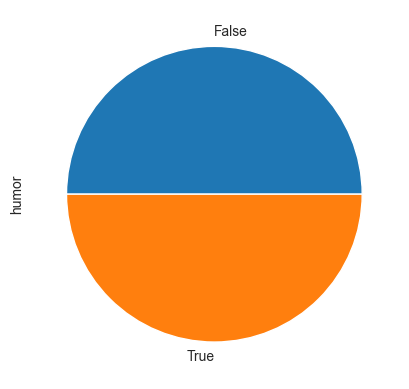

In [20]:
#Representación gráfica de la proporción de cada clase
dataset['humor'].value_counts().plot.pie();

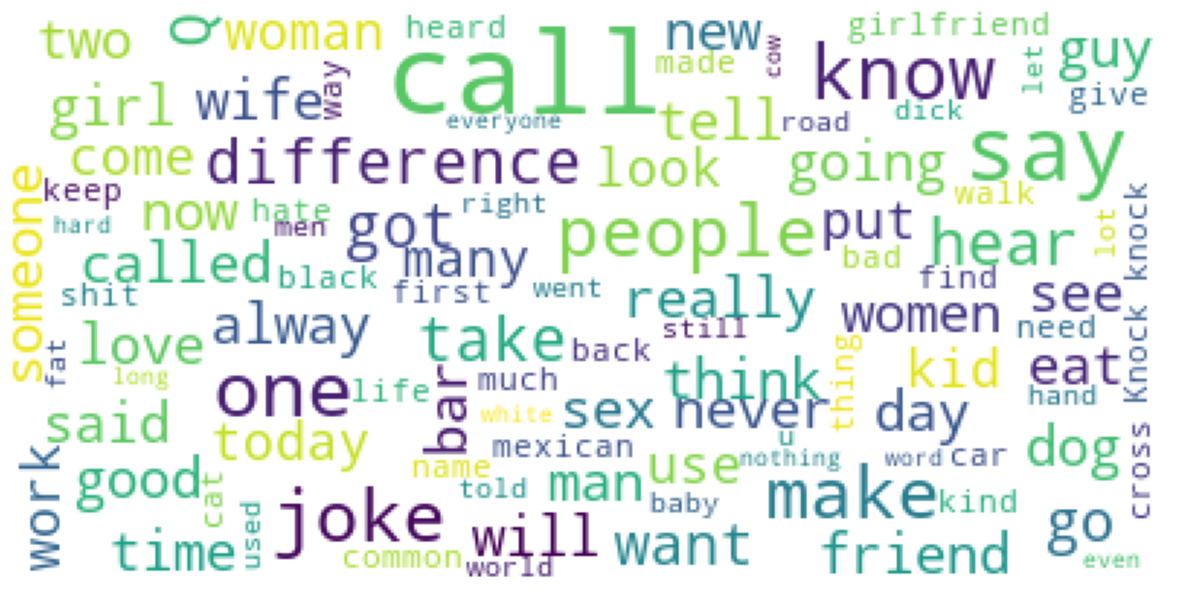

In [21]:
#Las palabras más frecuentes en los textos humorísticos
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

humor_text = dataset[dataset['humor'] == True]
humor_text

texts = ' '.join(humor_text['text'])
stopwords = STOPWORDS

wordcloud = WordCloud(background_color='white',
                      stopwords=stopwords,
                      max_words=100,
                      max_font_size=40,
                      random_state=42).generate(texts)

plt.figure(figsize = (15, 12), facecolor = None)
plt.axis('off')
plt.imshow(wordcloud);

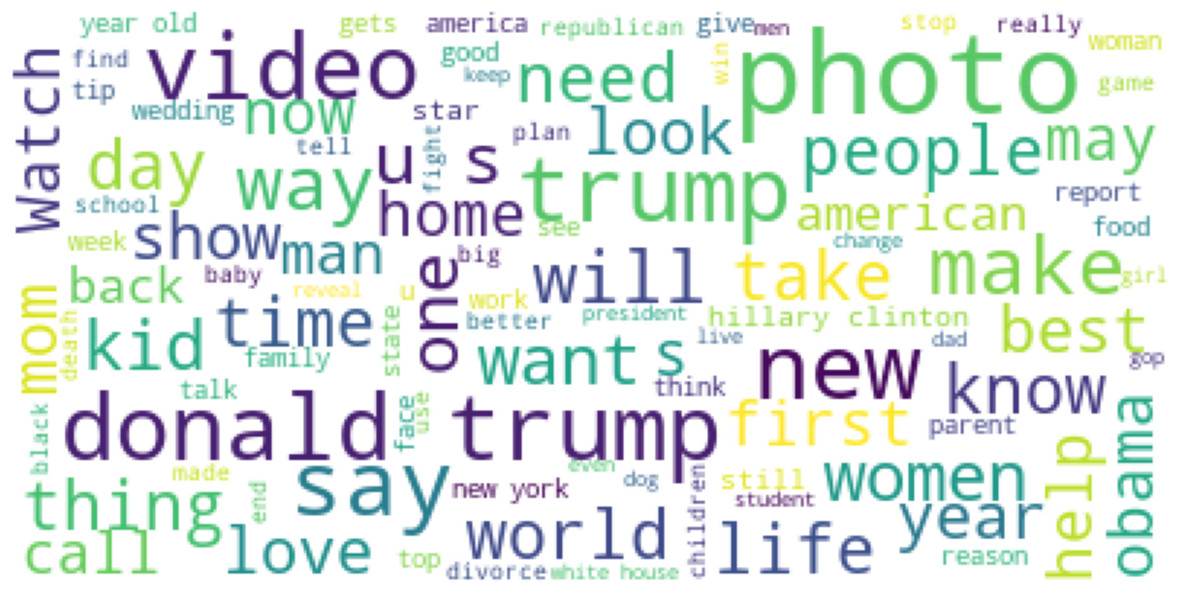

In [22]:
#Las palabras más frecuentes en los textos no humorísticos
serious_text = dataset[dataset['humor'] == False]

texts = ' '.join(serious_text['text'])
stopwords = STOPWORDS

wordcloud = WordCloud(background_color='white',
                      stopwords=stopwords,
                      max_words=100,
                      max_font_size=40,
                      random_state=42).generate(texts)

plt.figure(figsize = (15, 12), facecolor = None)
plt.axis('off')
plt.imshow(wordcloud);

In [6]:
def reducctionPCA(instances, numAtributes):
    '''Método para reducir número de atributos mediante PCA
    Parámetros:
    -instances: estrucutra de datos que contiene las instancias junto a sus atributos
    -numAtributes: el número de atributos deseado'''


    pca = PCA(n_components=numAtributes)
    pca.fit(instances)
    instances = pca.transform(instances)

    return instances

In [7]:
def tfidf(dataframe):
    '''Método utlizado para convertir un atributo en formato texto, a números
    Parámetros:
    -dataframe: estrucutra de datos que contiene las instancia junto a sus atributos
    -columnName: nombre de columna del dataframe que se desea transformar'''

    vectorizer = TfidfVectorizer()
    lemma = WordNetLemmatizer()
    sw = [lemma.lemmatize(w) for w in text.ENGLISH_STOP_WORDS]

    vectors = []
    for r in dataframe['text']:
        txt = word_tokenize(r.lower())
        newtxt = ""
        for w in txt:
            if w not in sw:
                l = lemma.lemmatize(w)
                newtxt += l+" "

        vectors.append(newtxt)

    vectors = vectorizer.fit_transform(vectors)
    vectors= vectors.toarray()
    vectors=pd.DataFrame(vectors)

    return vectors

In [8]:
def assignLabels(data):
    '''Método asignar las etiquetas despuès de aplicar tfidf
    Parámetros:
    -data: estrucutra de datos que contiene los atributos'''
    data['humor']=False
    for index, row in data.iterrows():
        if index < len(data)/2:
            data['humor'].iloc[index]=False
        else:
            data['humor'].iloc[index]=True

    return data

In [9]:
def testAndTrain(data):
    '''Método para dividir los datos en test y train
    Parámetros:
    -data: estrucutra de datos que contiene los atributos'''
    from sklearn.model_selection import train_test_split
    x_train , x_test , y_train , y_test = train_test_split(data.drop(labels='humor', axis=1) , data['humor'],test_size = 0.2 , random_state = 57)
    return x_train , x_test , y_train , y_test

In [93]:
#Carga de datos para las representaciones gráfica de los datos
serious_text = dataset[dataset['humor'] == False].sample(100)
humor_text = dataset[dataset['humor'] == True].sample(100)

dataframe= pd.concat([serious_text, humor_text])

dataframe

text  humor
2054    Chris brown's new song to include gay-friendly...  False
75292   6 tips to help live a balanced life with menta...  False
150866  Everything we know about love, we learned from...  False
178931  Emotional commercial reminds us what christmas...  False
177353  Uber paid 20-year-old florida man $100,000 to ...  False
...                                                   ...    ...
16999   Q: what do you get if you cross tina turner wi...   True
119873  What was the most reliable and helpful vehicle...   True
149367  I before e except when you run a feisty heist ...   True
81143   Gender is like a dead jew. before we know it, ...   True
2646    What do u call a stereotypical vietnamese comm...   True

[200 rows x 2 columns]

In [94]:
#Proceso de aplicación de tfidf y PCA
df_tfidf = tfidf(dataframe)
instances = reducctionPCA(df_tfidf, 10)
instances = pd.DataFrame(instances)

print(instances)

            0         1         2         3         4         5         6  \
0   -0.045327  0.024952  0.038706  0.039240  0.039977  0.058563  0.032383   
1   -0.042919  0.106930 -0.039958 -0.049128 -0.067142 -0.007064  0.027409   
2   -0.029743 -0.189331 -0.231875  0.208835 -0.001388 -0.020606 -0.273446   
3   -0.029953  0.005731  0.000609 -0.013605 -0.026906  0.011578  0.003156   
4   -0.037717  0.034110  0.193016  0.024204  0.052288  0.127085 -0.067176   
..        ...       ...       ...       ...       ...       ...       ...   
195  0.016639 -0.022433 -0.012667 -0.037537  0.016331 -0.071368  0.016989   
196  0.167580 -0.117136  0.091992  0.171976 -0.070962  0.088334 -0.058516   
197 -0.034281 -0.007609 -0.034227  0.002027 -0.026431  0.013212 -0.050195   
198 -0.059214 -0.148908 -0.264485  0.171753  0.071846 -0.142311 -0.252745   
199 -0.023247  0.005833  0.001311 -0.008311 -0.018894  0.010448  0.001351   

            7         8         9  
0   -0.017696  0.041918 -0.124933  
1  

C:\Users\julia\AppData\Local\Temp\ipykernel_11164\2688960289.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_11164\2688960289.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


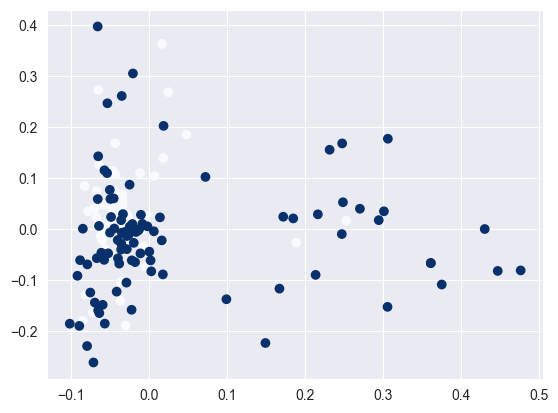

In [101]:
#Gráfica 2D que representa las instancias
instances = assignLabels(instances)
sc = plt.scatter(instances[0],instances[1], cmap=plt.cm.get_cmap('Blues', 10),c=instances['humor'])

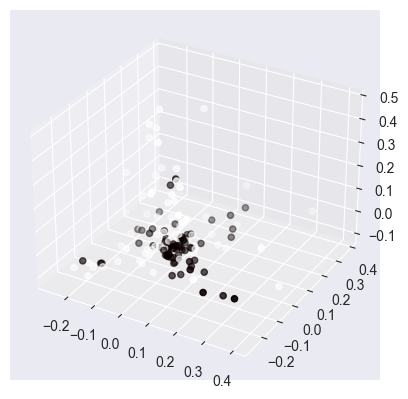

In [98]:
#Gráfica 3D que representa las instancias
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = instances[0]
xline = instances[1]
yline = instances[2]
ax.scatter3D(xline, yline, zline,c=instances['humor'] ,cmap='hot');

Baseline

In [59]:
#Preparaciòn de las instancias para el baseline
serious_text = dataset[dataset['humor'] == False].sample(150)
humor_text = dataset[dataset['humor'] == True].sample(150)

dataframe= pd.concat([serious_text, humor_text])

#Aplicación de tfidf
df_tfidf = tfidf(dataframe)

#Asignación aleatoria de un atributo
instances = df_tfidf[randint(0,len(df_tfidf))]
instances = pd.DataFrame(instances)
instances = assignLabels(instances)

print(instances)

     237  humor
0    0.0  False
1    0.0  False
2    0.0  False
3    0.0  False
4    0.0  False
..   ...    ...
295  0.0   True
296  0.0   True
297  0.0   True
298  0.0   True
299  0.0   True

[300 rows x 2 columns]


C:\Users\julia\AppData\Local\Temp\ipykernel_11164\2688960289.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_11164\2688960289.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


In [60]:
#Aplicación del modelo de clasificación
from sklearn.linear_model import Perceptron
x_train , x_test , y_train , y_test = testAndTrain(instances)

p = Perceptron(random_state=42)
p.fit(x_train, y_train)
preds = p.predict(x_test)

              precision    recall  f1-score   support

       False       1.00      0.00      0.00        33
        True       0.45      1.00      0.62        27

    accuracy                           0.45        60
   macro avg       0.72      0.50      0.31        60
weighted avg       0.75      0.45      0.28        60



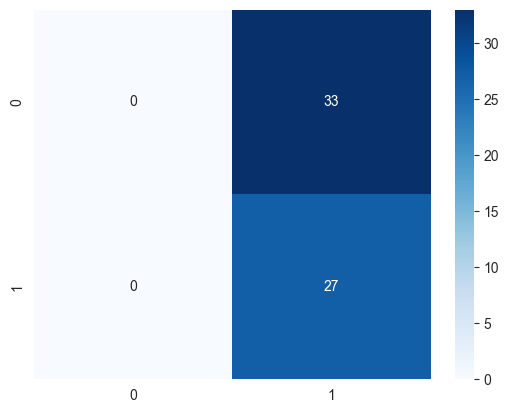

In [102]:
#Matriz de confusión y mètricas de baseline
cm = confusion_matrix(y_test, preds)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
# Mapa de calor a partir de la matriz de confusion
print(classification_report(y_test,preds,zero_division=1))

Experimento 1-Perceptrón simple

------------------------------------------------------------------------------------------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 750
maxIter: 100
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.72      0.73      0.72       154
        True       0.71      0.69      0.70       146

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.71      0.71      0.71       300



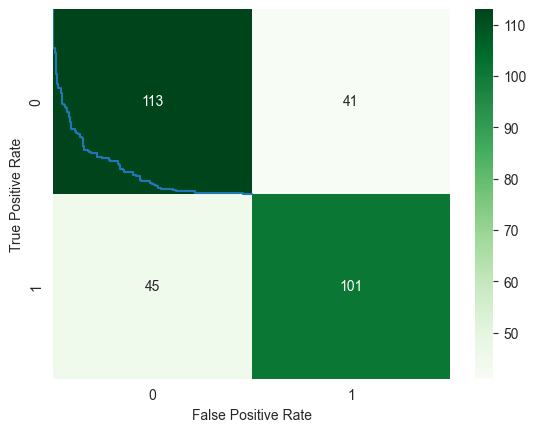

*****************************************************************************************************************************
Num atr: 100
size: 750
maxIter: 100
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.88      0.19      0.31       154
        True       0.53      0.97      0.69       146

    accuracy                           0.57       300
   macro avg       0.71      0.58      0.50       300
weighted avg       0.71      0.57      0.49       300



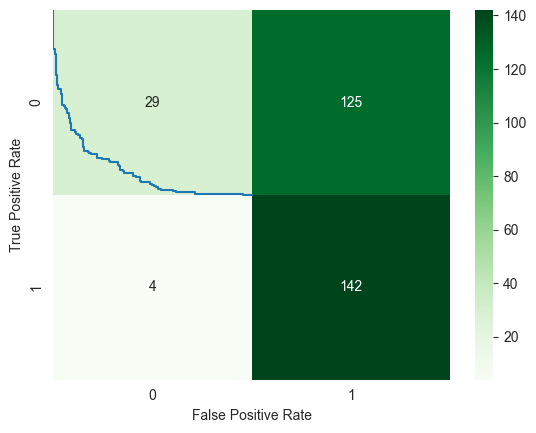

*****************************************************************************************************************************
Num atr: 200
size: 750
maxIter: 100
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.77      0.74      0.75       154
        True       0.74      0.77      0.75       146

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



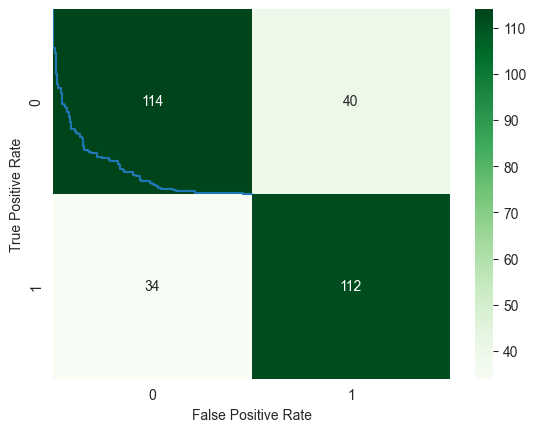

*****************************************************************************************************************************
Num atr: 250
size: 750
maxIter: 100
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.76      0.70      0.73       154
        True       0.71      0.77      0.74       146

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.74      0.73      0.73       300



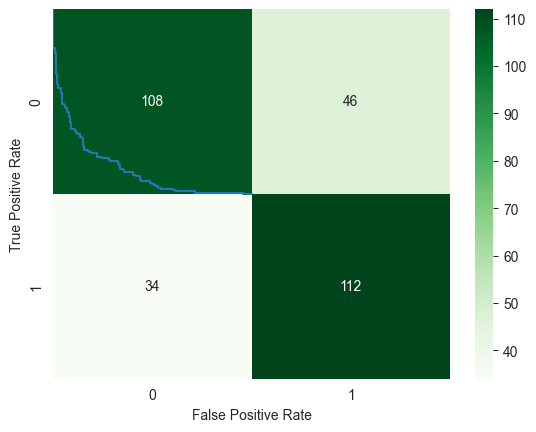

*****************************************************************************************************************************
Num atr: 300
size: 750
maxIter: 100
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.65      0.90      0.76       154
        True       0.83      0.49      0.62       146

    accuracy                           0.70       300
   macro avg       0.74      0.70      0.69       300
weighted avg       0.74      0.70      0.69       300



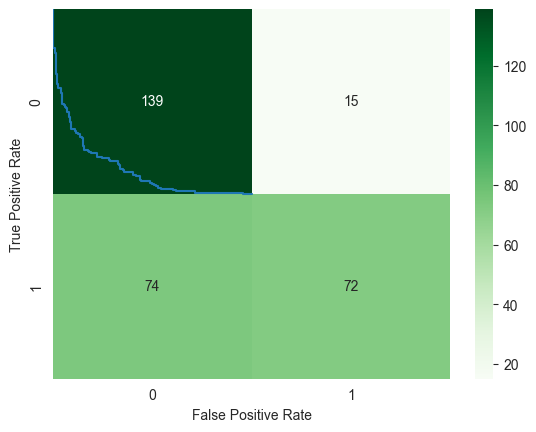

*****************************************************************************************************************************
Num atr: 350
size: 750
maxIter: 100
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.76      0.75      0.75       154
        True       0.74      0.75      0.75       146

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



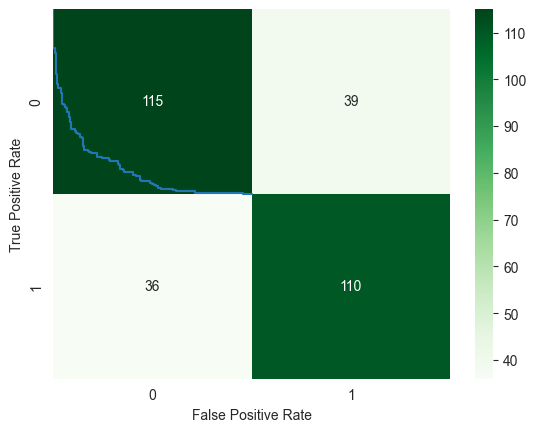

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 750
maxIter: 250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       1.00      0.13      0.23       154
        True       0.52      1.00      0.69       146

    accuracy                           0.55       300
   macro avg       0.76      0.56      0.46       300
weighted avg       0.77      0.55      0.45       300



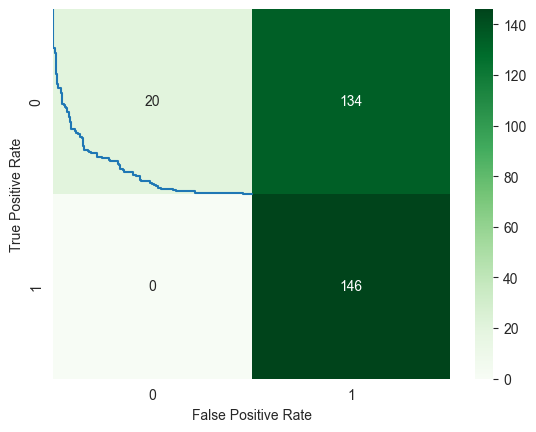

*****************************************************************************************************************************
Num atr: 100
size: 750
maxIter: 250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.74      0.79      0.76       154
        True       0.76      0.71      0.73       146

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



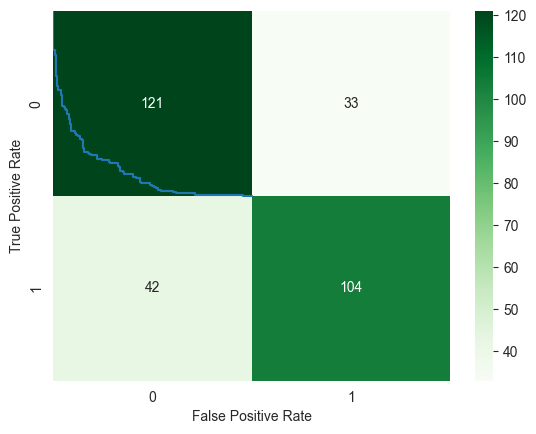

*****************************************************************************************************************************
Num atr: 200
size: 750
maxIter: 250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.61      0.95      0.74       154
        True       0.88      0.36      0.51       146

    accuracy                           0.66       300
   macro avg       0.75      0.66      0.63       300
weighted avg       0.74      0.66      0.63       300



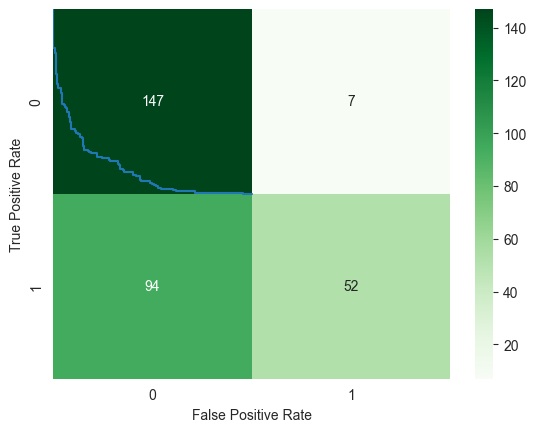

*****************************************************************************************************************************
Num atr: 250
size: 750
maxIter: 250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.75      0.77      0.76       154
        True       0.75      0.73      0.74       146

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



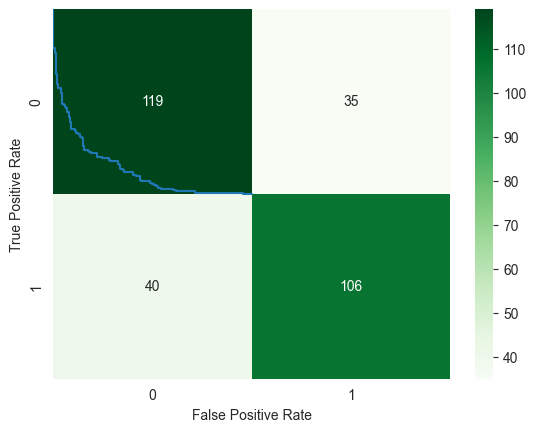

*****************************************************************************************************************************
Num atr: 300
size: 750
maxIter: 250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.75      0.74      0.75       154
        True       0.73      0.75      0.74       146

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



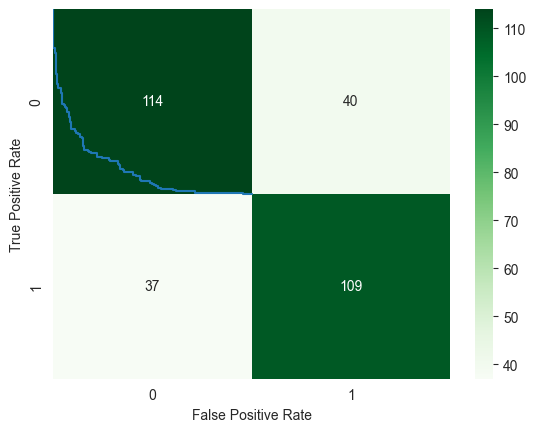

*****************************************************************************************************************************
Num atr: 350
size: 750
maxIter: 250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.74      0.68      0.71       154
        True       0.69      0.75      0.72       146

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



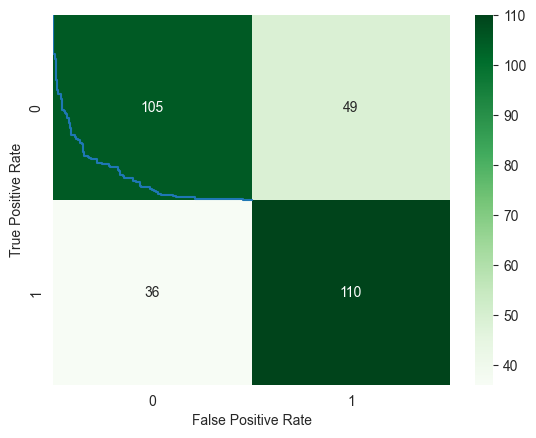

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 750
maxIter: 500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.71      0.79      0.75       154
        True       0.75      0.66      0.70       146

    accuracy                           0.73       300
   macro avg       0.73      0.72      0.72       300
weighted avg       0.73      0.73      0.73       300



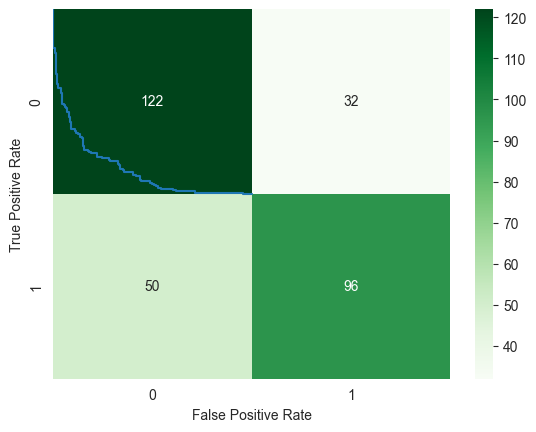

*****************************************************************************************************************************
Num atr: 100
size: 750
maxIter: 500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.74      0.79      0.77       154
        True       0.76      0.71      0.74       146

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



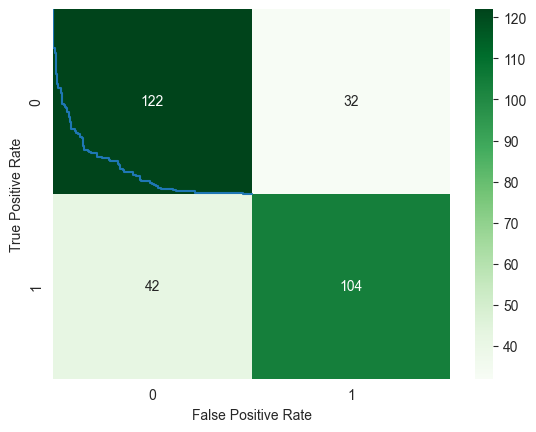

*****************************************************************************************************************************
Num atr: 200
size: 750
maxIter: 500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.73      0.77      0.75       154
        True       0.75      0.71      0.73       146

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



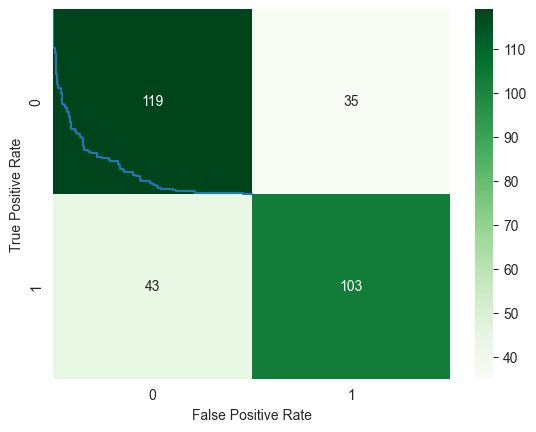

*****************************************************************************************************************************
Num atr: 250
size: 750
maxIter: 500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.77      0.77      0.77       154
        True       0.76      0.76      0.76       146

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



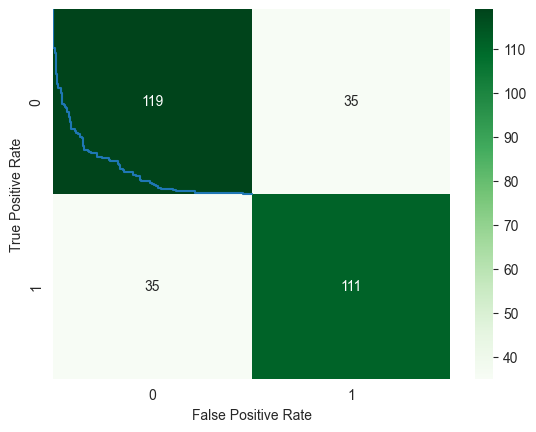

*****************************************************************************************************************************
Num atr: 300
size: 750
maxIter: 500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.75      0.75      0.75       154
        True       0.74      0.74      0.74       146

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



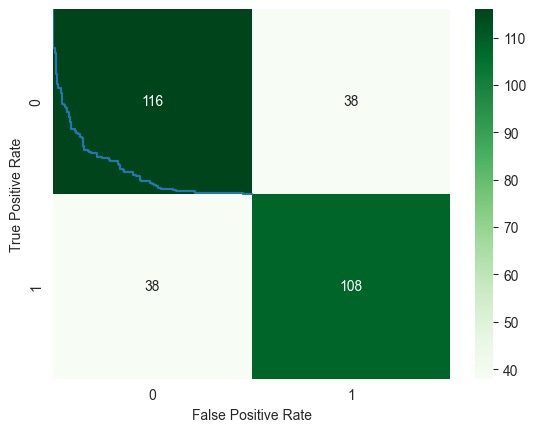

*****************************************************************************************************************************
Num atr: 350
size: 750
maxIter: 500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.78      0.77      0.77       154
        True       0.76      0.77      0.77       146

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



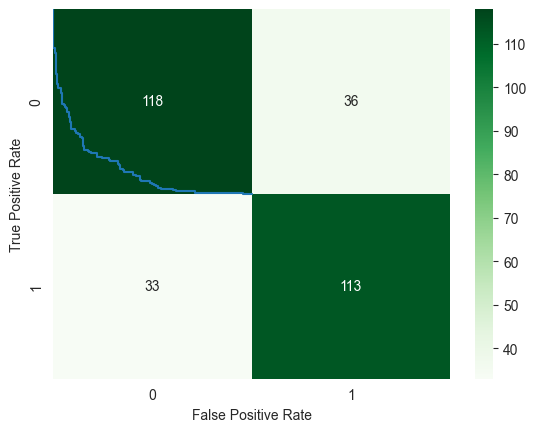

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 750
maxIter: 1000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.70      0.80      0.75       154
        True       0.75      0.64      0.69       146

    accuracy                           0.72       300
   macro avg       0.73      0.72      0.72       300
weighted avg       0.73      0.72      0.72       300



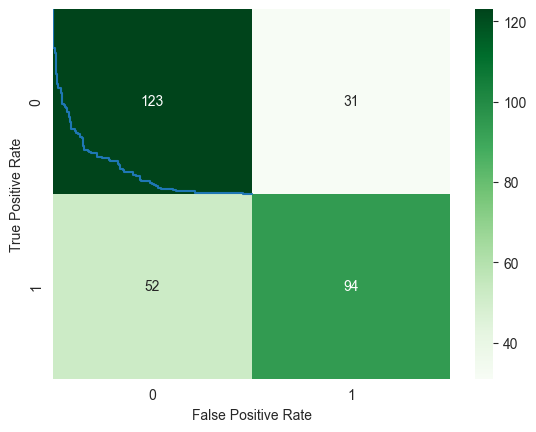

*****************************************************************************************************************************
Num atr: 100
size: 750
maxIter: 1000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.70      0.75      0.72       154
        True       0.71      0.66      0.68       146

    accuracy                           0.70       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.70      0.70      0.70       300



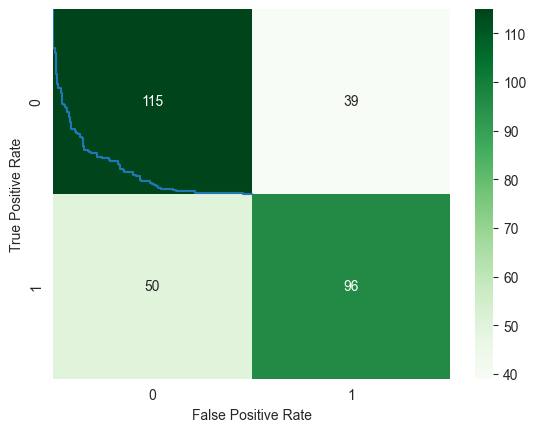

*****************************************************************************************************************************
Num atr: 200
size: 750
maxIter: 1000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.71      0.75      0.73       154
        True       0.72      0.68      0.70       146

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



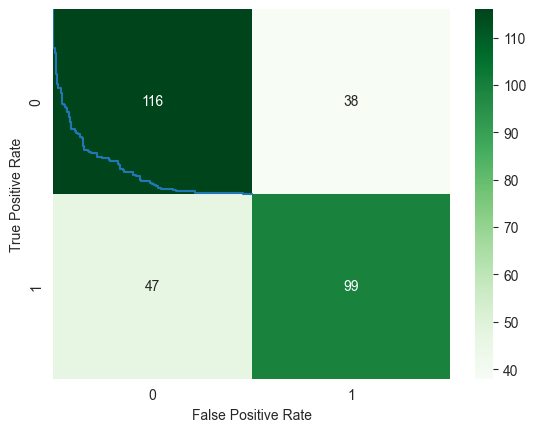

*****************************************************************************************************************************
Num atr: 250
size: 750
maxIter: 1000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.74      0.77      0.76       154
        True       0.75      0.72      0.73       146

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300



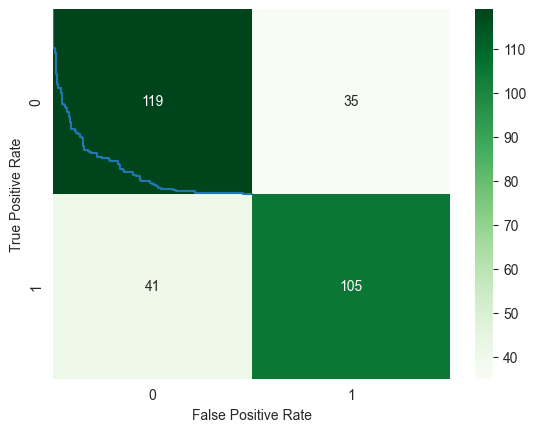

*****************************************************************************************************************************
Num atr: 300
size: 750
maxIter: 1000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.71      0.73      0.72       154
        True       0.71      0.68      0.69       146

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.71      0.71      0.71       300



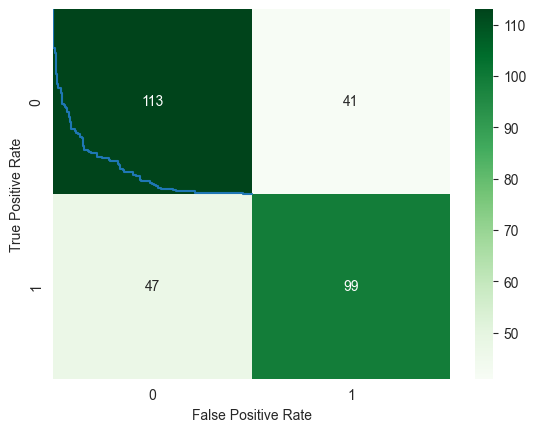

*****************************************************************************************************************************
Num atr: 350
size: 750
maxIter: 1000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.69      0.72      0.70       154
        True       0.69      0.66      0.67       146

    accuracy                           0.69       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.69      0.69      0.69       300



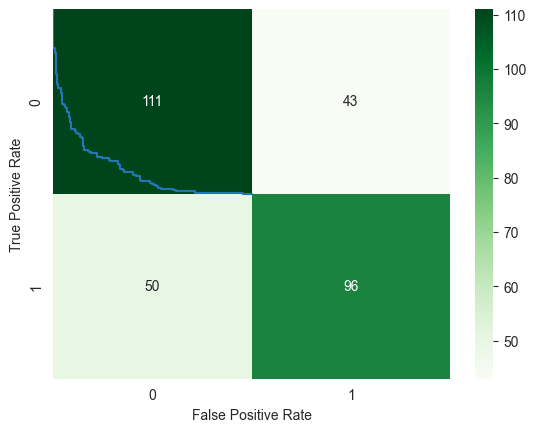

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 750
maxIter: 1250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.85      0.15      0.25       154
        True       0.52      0.97      0.68       146

    accuracy                           0.55       300
   macro avg       0.69      0.56      0.47       300
weighted avg       0.69      0.55      0.46       300



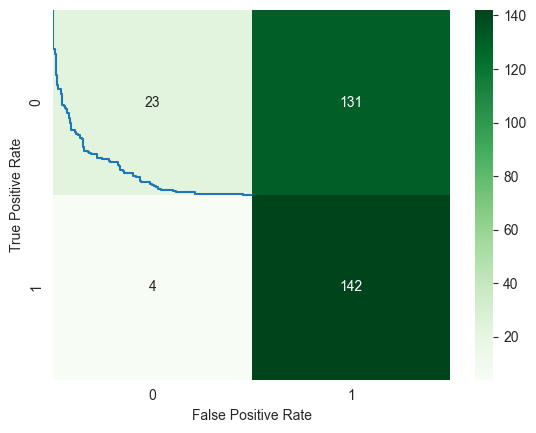

*****************************************************************************************************************************
Num atr: 100
size: 750
maxIter: 1250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.72      0.75      0.73       154
        True       0.72      0.70      0.71       146

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



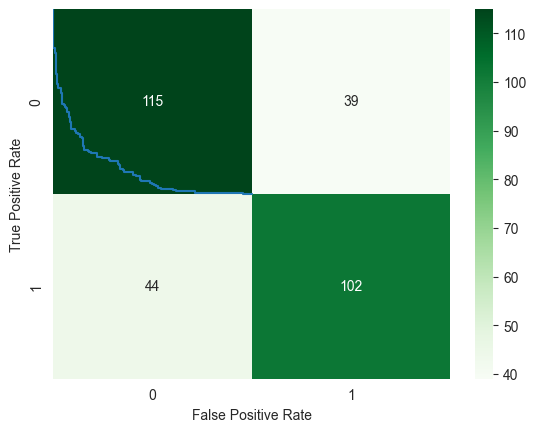

*****************************************************************************************************************************
Num atr: 200
size: 750
maxIter: 1250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.76      0.76      0.76       154
        True       0.75      0.75      0.75       146

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



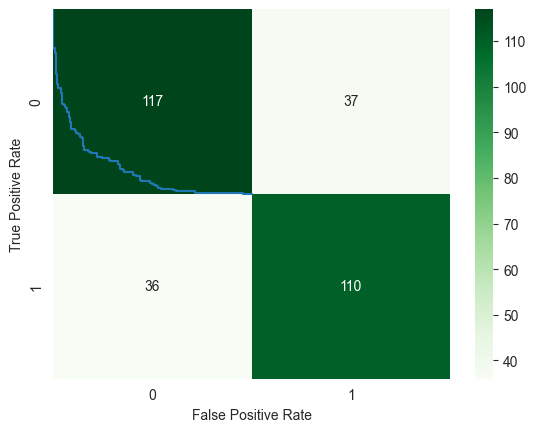

*****************************************************************************************************************************
Num atr: 250
size: 750
maxIter: 1250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.76      0.77      0.77       154
        True       0.76      0.74      0.75       146

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



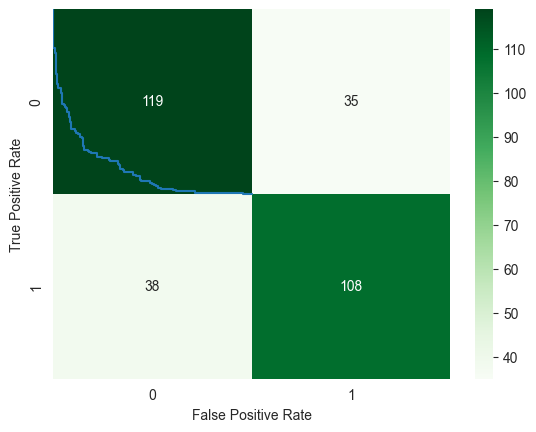

*****************************************************************************************************************************
Num atr: 300
size: 750
maxIter: 1250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.74      0.75      0.74       154
        True       0.73      0.73      0.73       146

    accuracy                           0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



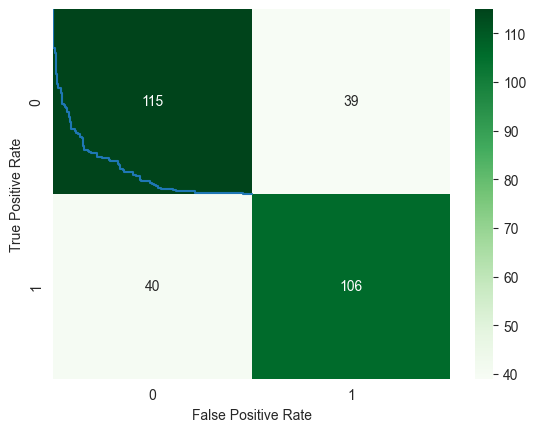

*****************************************************************************************************************************
Num atr: 350
size: 750
maxIter: 1250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.78      0.79      0.78       154
        True       0.77      0.76      0.77       146

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



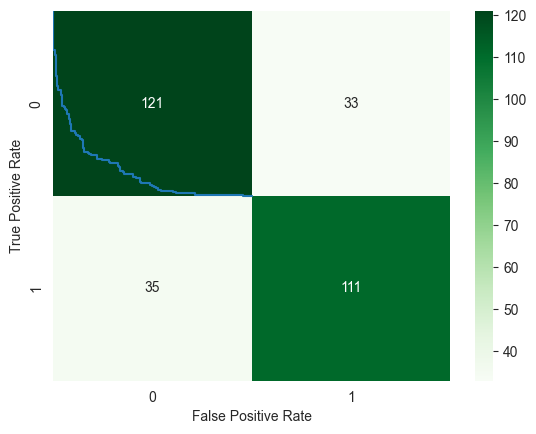

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 750
maxIter: 1500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.67      0.79      0.73       154
        True       0.73      0.60      0.66       146

    accuracy                           0.70       300
   macro avg       0.70      0.69      0.69       300
weighted avg       0.70      0.70      0.69       300



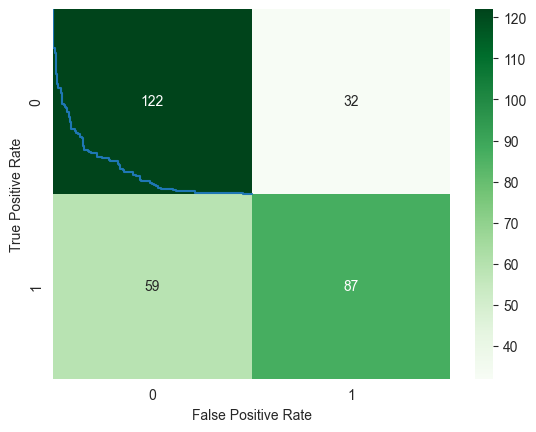

*****************************************************************************************************************************
Num atr: 100
size: 750
maxIter: 1500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.70      0.76      0.73       154
        True       0.72      0.66      0.69       146

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.71      0.71      0.71       300



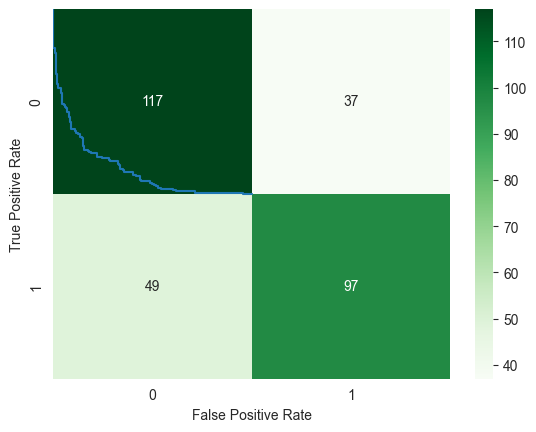

*****************************************************************************************************************************
Num atr: 200
size: 750
maxIter: 1500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.60      0.95      0.73       154
        True       0.87      0.32      0.47       146

    accuracy                           0.65       300
   macro avg       0.73      0.64      0.60       300
weighted avg       0.73      0.65      0.61       300



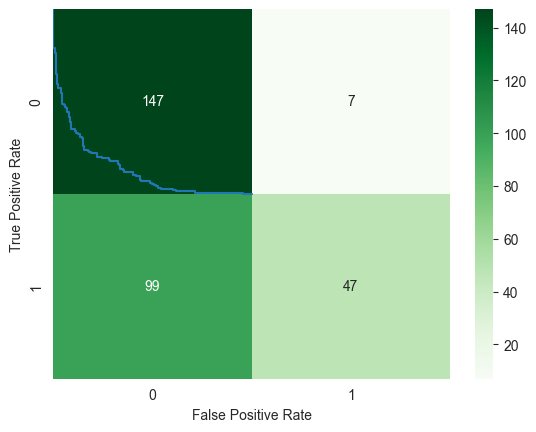

*****************************************************************************************************************************
Num atr: 250
size: 750
maxIter: 1500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.61      0.96      0.75       154
        True       0.90      0.36      0.51       146

    accuracy                           0.67       300
   macro avg       0.75      0.66      0.63       300
weighted avg       0.75      0.67      0.63       300



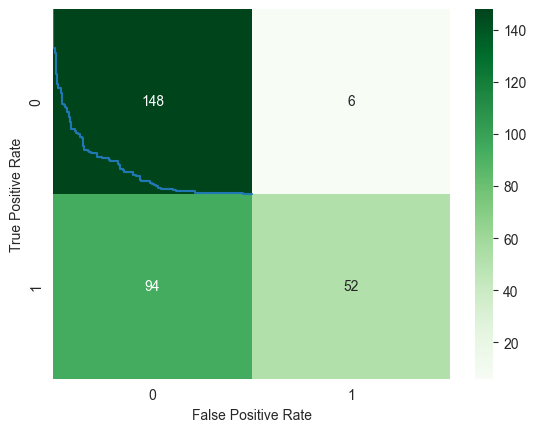

*****************************************************************************************************************************
Num atr: 300
size: 750
maxIter: 1500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.72      0.73      0.73       154
        True       0.72      0.71      0.71       146

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



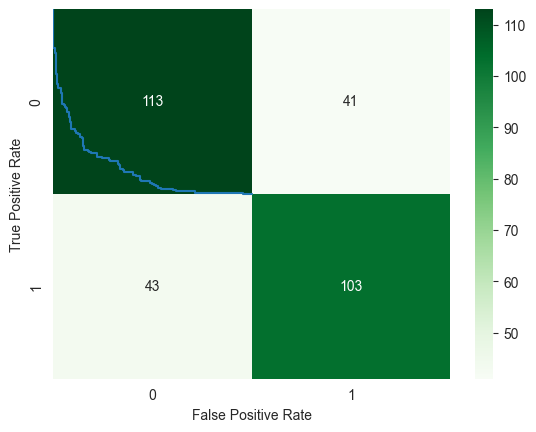

*****************************************************************************************************************************
Num atr: 350
size: 750
maxIter: 1500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.62      0.93      0.74       154
        True       0.84      0.40      0.54       146

    accuracy                           0.67       300
   macro avg       0.73      0.66      0.64       300
weighted avg       0.73      0.67      0.64       300



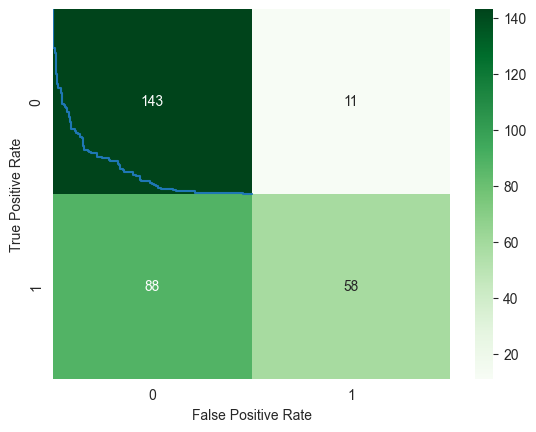

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 750
maxIter: 2000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.94      0.11      0.20       154
        True       0.51      0.99      0.68       146

    accuracy                           0.54       300
   macro avg       0.73      0.55      0.44       300
weighted avg       0.74      0.54      0.43       300



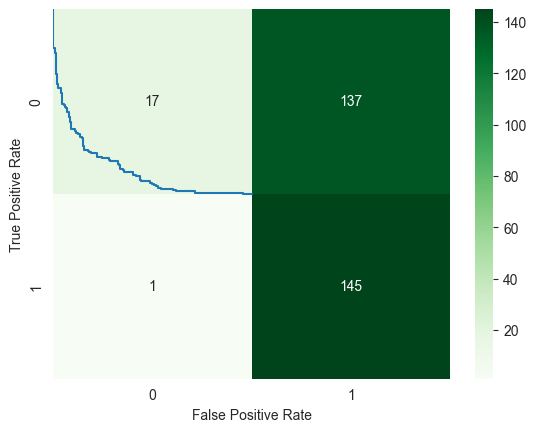

*****************************************************************************************************************************
Num atr: 100
size: 750
maxIter: 2000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.76      0.84      0.80       154
        True       0.81      0.72      0.76       146

    accuracy                           0.78       300
   macro avg       0.79      0.78      0.78       300
weighted avg       0.79      0.78      0.78       300



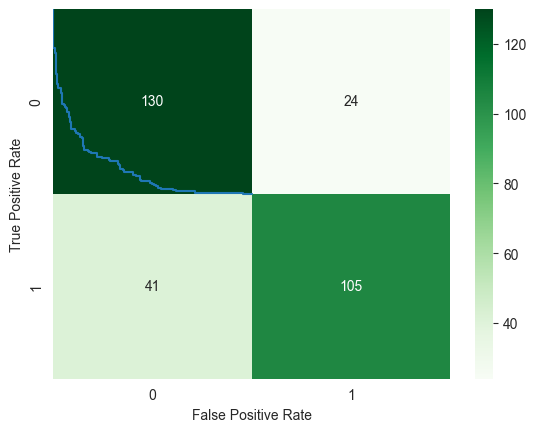

*****************************************************************************************************************************
Num atr: 200
size: 750
maxIter: 2000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.76      0.81      0.78       154
        True       0.79      0.73      0.75       146

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



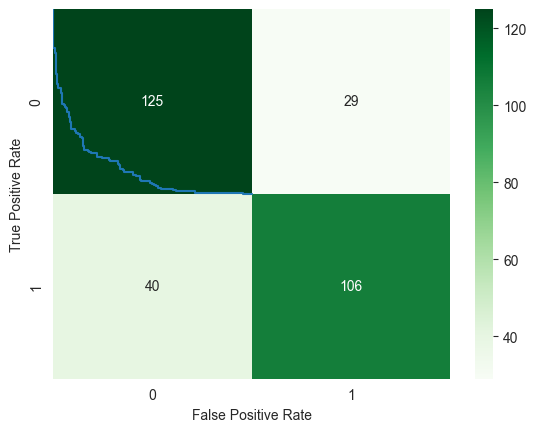

*****************************************************************************************************************************
Num atr: 250
size: 750
maxIter: 2000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.76      0.82      0.79       154
        True       0.80      0.72      0.76       146

    accuracy                           0.77       300
   macro avg       0.78      0.77      0.77       300
weighted avg       0.78      0.77      0.77       300



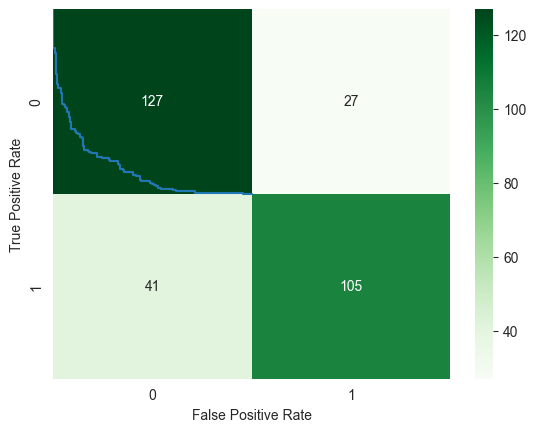

*****************************************************************************************************************************
Num atr: 300
size: 750
maxIter: 2000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.78      0.46      0.58       154
        True       0.60      0.86      0.71       146

    accuracy                           0.66       300
   macro avg       0.69      0.66      0.64       300
weighted avg       0.69      0.66      0.64       300



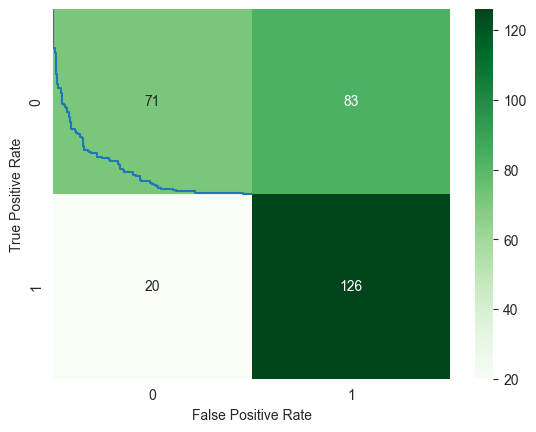

*****************************************************************************************************************************
Num atr: 350
size: 750
maxIter: 2000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.71      0.73      0.72       154
        True       0.71      0.68      0.70       146

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.71      0.71      0.71       300



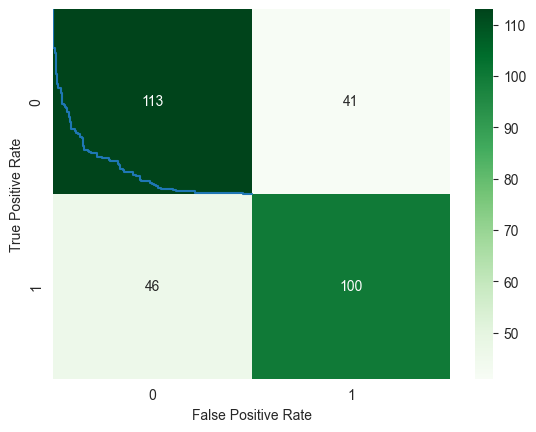

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 1000
maxIter: 100
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.70      0.86      0.77       196
        True       0.82      0.64      0.72       204

    accuracy                           0.75       400
   macro avg       0.76      0.75      0.75       400
weighted avg       0.76      0.75      0.74       400



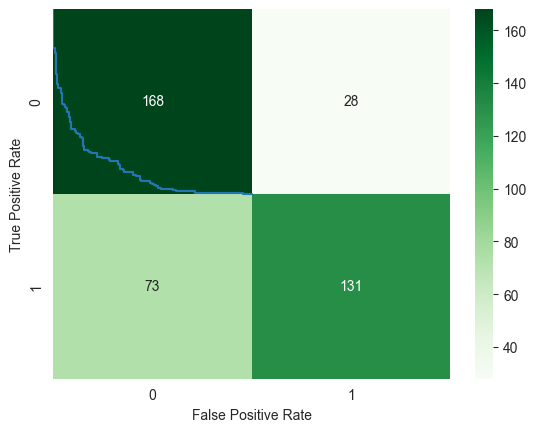

*****************************************************************************************************************************
Num atr: 100
size: 1000
maxIter: 100
*****************************************************************************************************************************
              precision    recall  f1-score   support

       False       0.73      0.89      0.80       196
        True       0.87      0.68      0.76       204

    accuracy                           0.79       400
   macro avg       0.80      0.79      0.78       400
weighted avg       0.80      0.79      0.78       400



C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


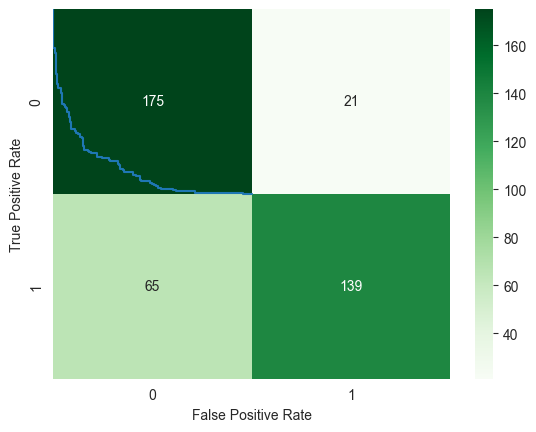

*****************************************************************************************************************************
Num atr: 200
size: 1000
maxIter: 100
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.59      0.99      0.74       196
        True       0.97      0.33      0.49       204

    accuracy                           0.65       400
   macro avg       0.78      0.66      0.61       400
weighted avg       0.78      0.65      0.61       400



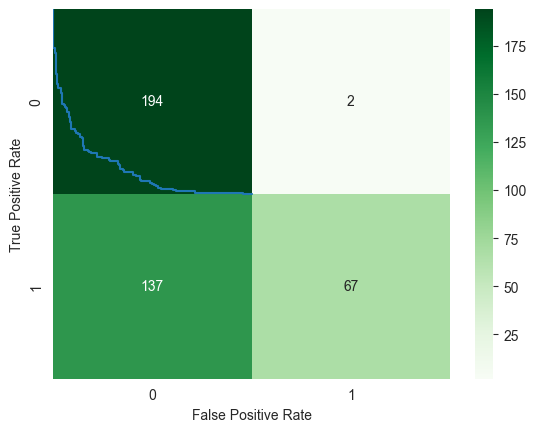

*****************************************************************************************************************************
Num atr: 250
size: 1000
maxIter: 100
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.60      0.99      0.75       196
        True       0.97      0.38      0.54       204

    accuracy                           0.68       400
   macro avg       0.79      0.68      0.65       400
weighted avg       0.79      0.68      0.65       400



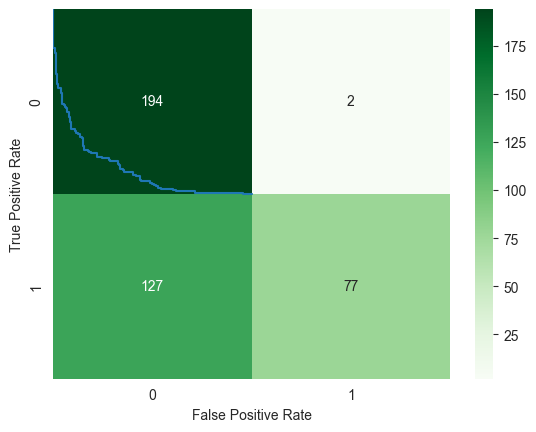

*****************************************************************************************************************************
Num atr: 300
size: 1000
maxIter: 100
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.61      0.98      0.76       196
        True       0.97      0.41      0.57       204

    accuracy                           0.69       400
   macro avg       0.79      0.70      0.66       400
weighted avg       0.79      0.69      0.66       400



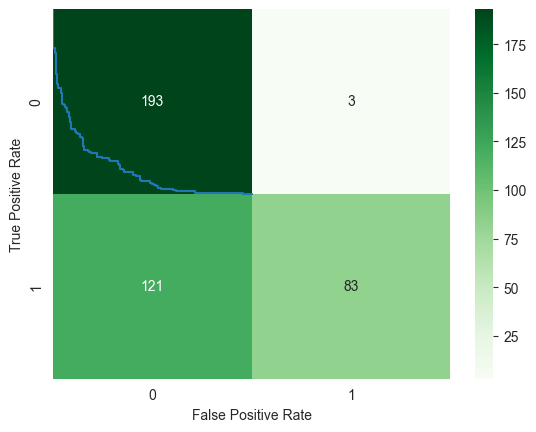

*****************************************************************************************************************************
Num atr: 350
size: 1000
maxIter: 100
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.72      0.81      0.76       196
        True       0.79      0.70      0.74       204

    accuracy                           0.75       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.75      0.75       400



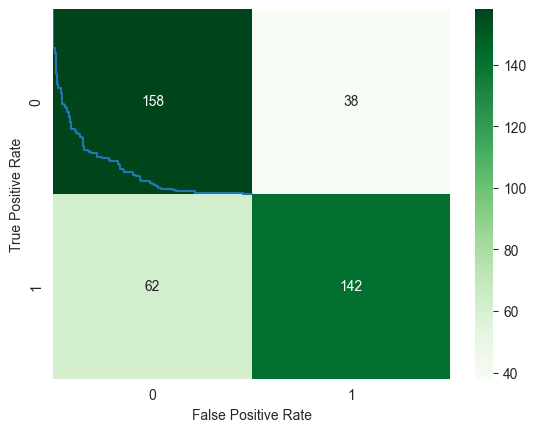

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 1000
maxIter: 250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.67      0.84      0.75       196
        True       0.80      0.61      0.69       204

    accuracy                           0.72       400
   macro avg       0.74      0.72      0.72       400
weighted avg       0.74      0.72      0.72       400



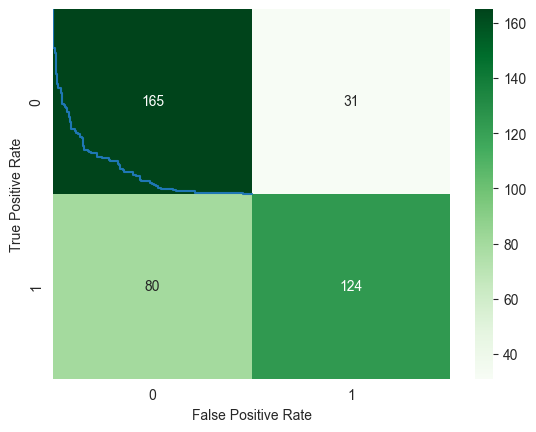

*****************************************************************************************************************************
Num atr: 100
size: 1000
maxIter: 250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.91      0.24      0.39       196
        True       0.57      0.98      0.72       204

    accuracy                           0.62       400
   macro avg       0.74      0.61      0.55       400
weighted avg       0.74      0.62      0.56       400



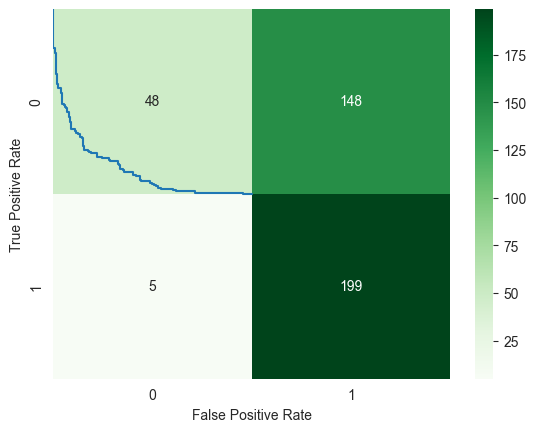

*****************************************************************************************************************************
Num atr: 200
size: 1000
maxIter: 250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.69      0.83      0.76       196
        True       0.80      0.65      0.72       204

    accuracy                           0.74       400
   macro avg       0.75      0.74      0.74       400
weighted avg       0.75      0.74      0.74       400



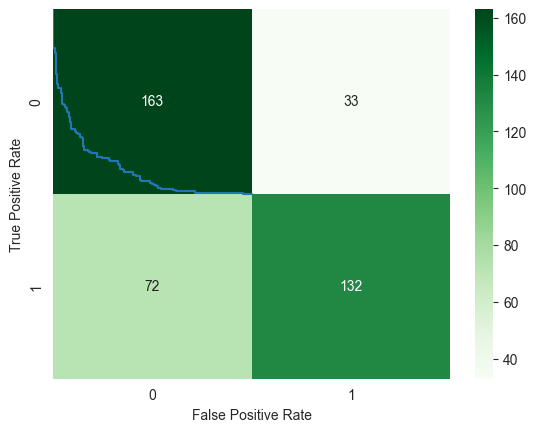

*****************************************************************************************************************************
Num atr: 250
size: 1000
maxIter: 250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.87      0.36      0.51       196
        True       0.61      0.95      0.74       204

    accuracy                           0.66       400
   macro avg       0.74      0.65      0.63       400
weighted avg       0.73      0.66      0.63       400



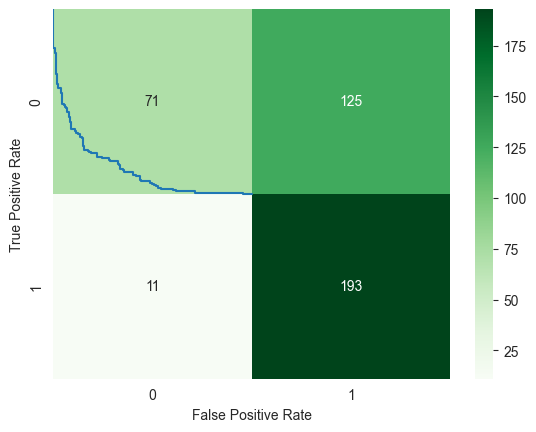

*****************************************************************************************************************************
Num atr: 300
size: 1000
maxIter: 250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.89      0.38      0.54       196
        True       0.62      0.96      0.75       204

    accuracy                           0.68       400
   macro avg       0.75      0.67      0.64       400
weighted avg       0.75      0.68      0.65       400



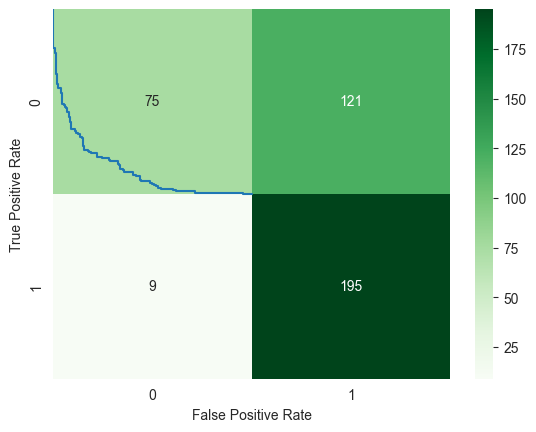

*****************************************************************************************************************************
Num atr: 350
size: 1000
maxIter: 250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.84      0.42      0.56       196
        True       0.62      0.92      0.74       204

    accuracy                           0.68       400
   macro avg       0.73      0.67      0.65       400
weighted avg       0.73      0.68      0.66       400



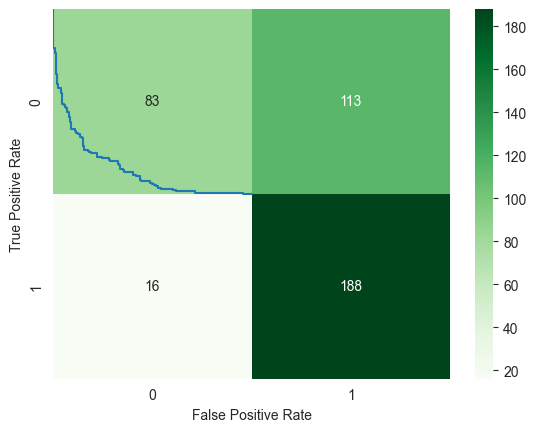

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 1000
maxIter: 500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.97      0.15      0.26       196
        True       0.55      1.00      0.71       204

    accuracy                           0.58       400
   macro avg       0.76      0.57      0.49       400
weighted avg       0.75      0.58      0.49       400



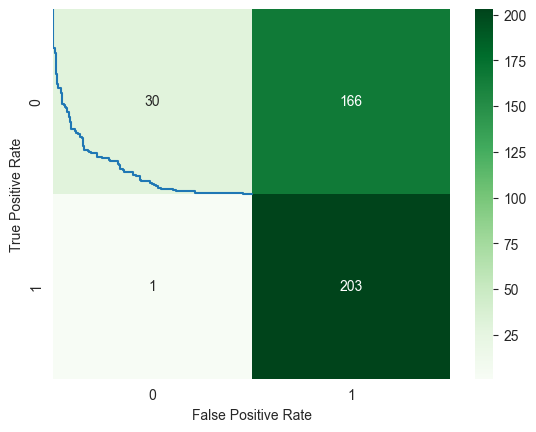

*****************************************************************************************************************************
Num atr: 100
size: 1000
maxIter: 500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.76      0.82      0.79       196
        True       0.81      0.75      0.78       204

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.78       400
weighted avg       0.79      0.79      0.78       400



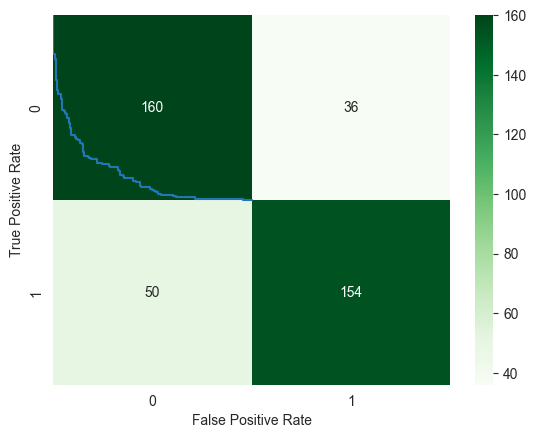

*****************************************************************************************************************************
Num atr: 200
size: 1000
maxIter: 500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.61      0.98      0.75       196
        True       0.95      0.39      0.55       204

    accuracy                           0.68       400
   macro avg       0.78      0.68      0.65       400
weighted avg       0.78      0.68      0.65       400



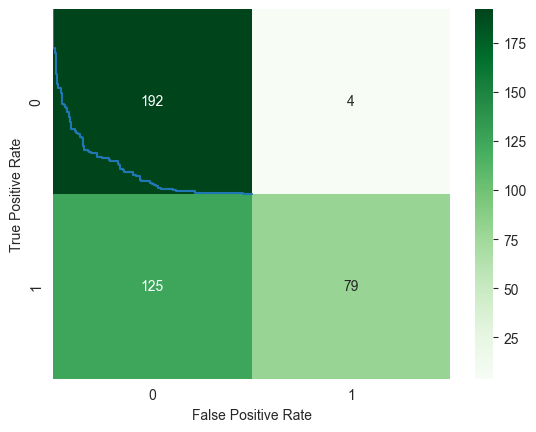

*****************************************************************************************************************************
Num atr: 250
size: 1000
maxIter: 500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.59      0.95      0.73       196
        True       0.88      0.37      0.52       204

    accuracy                           0.66       400
   macro avg       0.74      0.66      0.63       400
weighted avg       0.74      0.66      0.62       400



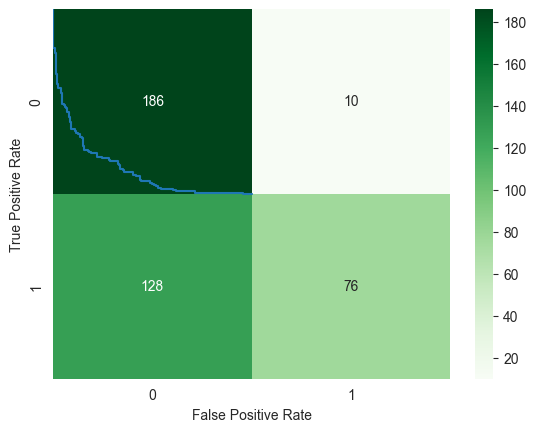

*****************************************************************************************************************************
Num atr: 300
size: 1000
maxIter: 500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.97      0.44      0.61       196
        True       0.65      0.99      0.78       204

    accuracy                           0.72       400
   macro avg       0.81      0.71      0.70       400
weighted avg       0.80      0.72      0.70       400



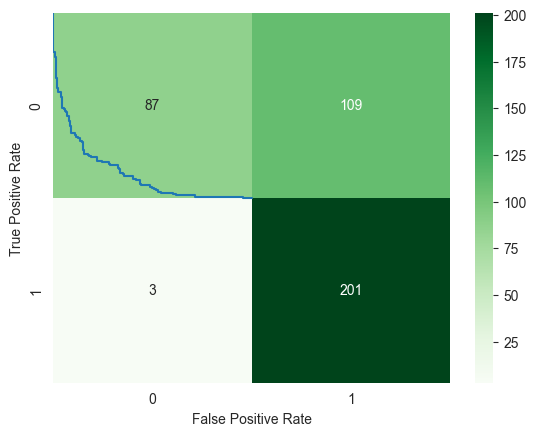

*****************************************************************************************************************************
Num atr: 350
size: 1000
maxIter: 500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.62      0.92      0.74       196
        True       0.86      0.45      0.59       204

    accuracy                           0.68       400
   macro avg       0.74      0.68      0.66       400
weighted avg       0.74      0.68      0.66       400



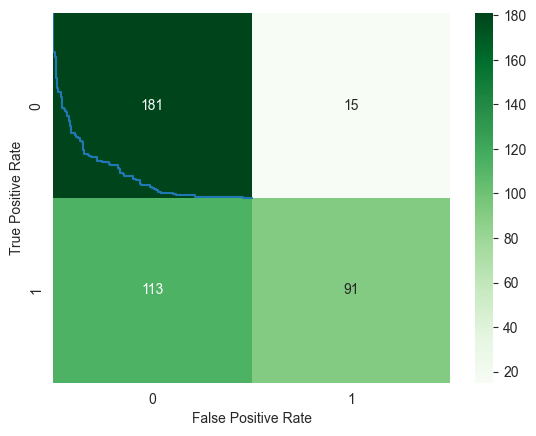

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 1000
maxIter: 1000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.94      0.17      0.29       196
        True       0.55      0.99      0.71       204

    accuracy                           0.59       400
   macro avg       0.75      0.58      0.50       400
weighted avg       0.74      0.59      0.50       400



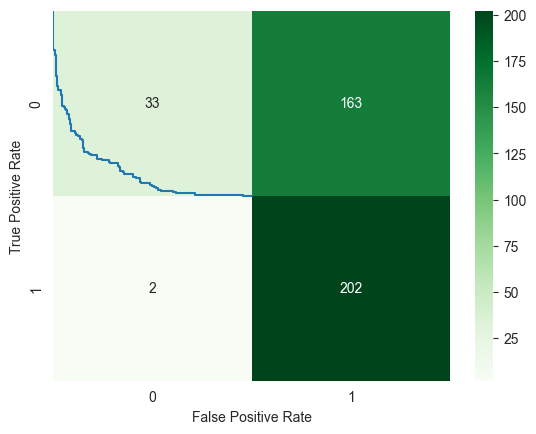

*****************************************************************************************************************************
Num atr: 100
size: 1000
maxIter: 1000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.74      0.83      0.78       196
        True       0.82      0.72      0.77       204

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.77       400
weighted avg       0.78      0.78      0.77       400



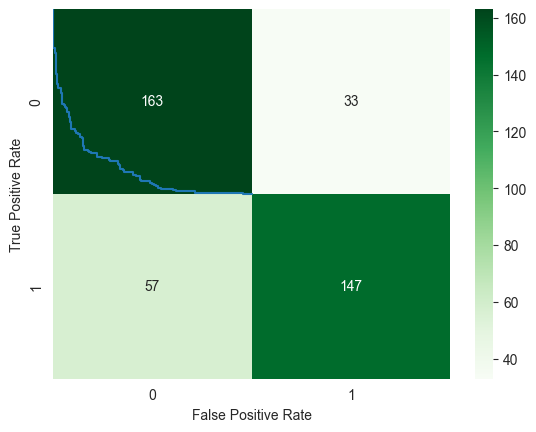

*****************************************************************************************************************************
Num atr: 200
size: 1000
maxIter: 1000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.91      0.38      0.53       196
        True       0.62      0.97      0.75       204

    accuracy                           0.68       400
   macro avg       0.77      0.67      0.64       400
weighted avg       0.76      0.68      0.65       400



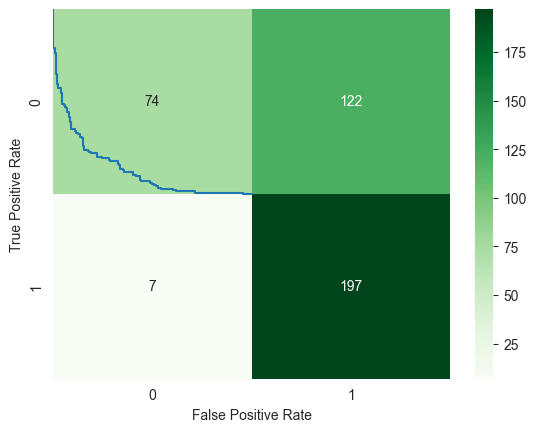

*****************************************************************************************************************************
Num atr: 250
size: 1000
maxIter: 1000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.62      0.98      0.76       196
        True       0.95      0.41      0.58       204

    accuracy                           0.69       400
   macro avg       0.78      0.70      0.67       400
weighted avg       0.79      0.69      0.66       400



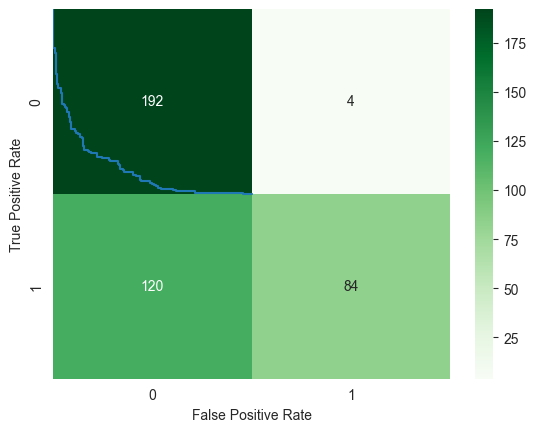

*****************************************************************************************************************************
Num atr: 300
size: 1000
maxIter: 1000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.92      0.45      0.61       196
        True       0.65      0.96      0.77       204

    accuracy                           0.71       400
   macro avg       0.78      0.71      0.69       400
weighted avg       0.78      0.71      0.69       400



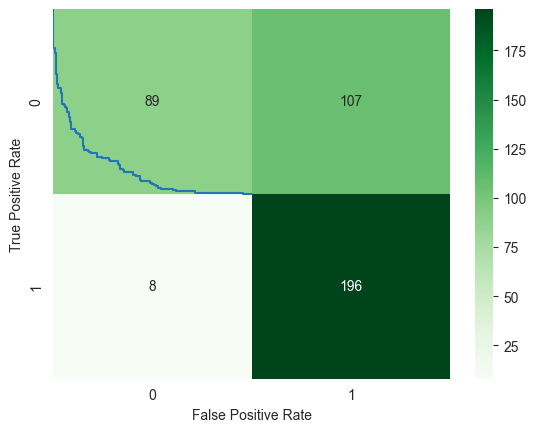

*****************************************************************************************************************************
Num atr: 350
size: 1000
maxIter: 1000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.84      0.46      0.60       196
        True       0.64      0.92      0.75       204

    accuracy                           0.69       400
   macro avg       0.74      0.69      0.68       400
weighted avg       0.74      0.69      0.68       400



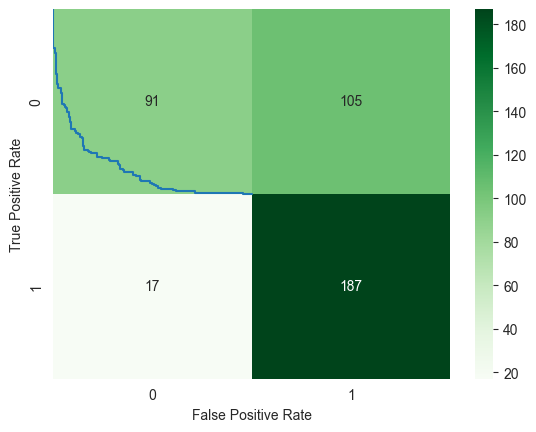

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 1000
maxIter: 1250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.77      0.85      0.81       196
        True       0.84      0.75      0.79       204

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



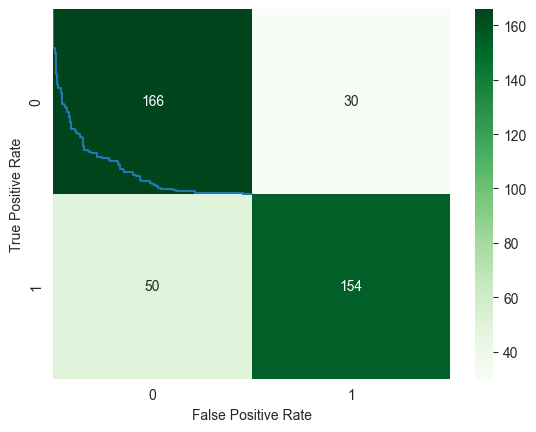

*****************************************************************************************************************************
Num atr: 100
size: 1000
maxIter: 1250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.92      0.30      0.45       196
        True       0.59      0.98      0.74       204

    accuracy                           0.64       400
   macro avg       0.76      0.64      0.59       400
weighted avg       0.75      0.64      0.59       400



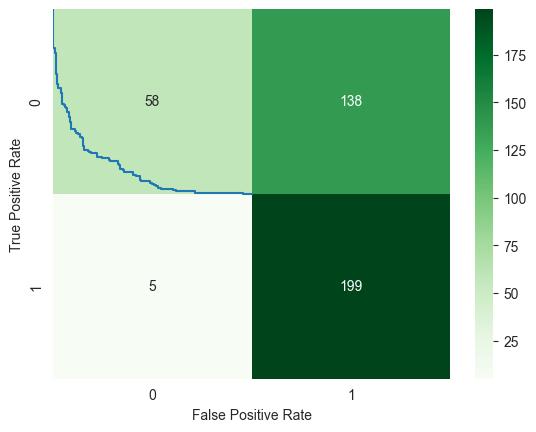

*****************************************************************************************************************************
Num atr: 200
size: 1000
maxIter: 1250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.79      0.82      0.80       196
        True       0.82      0.79      0.81       204

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.80       400
weighted avg       0.81      0.81      0.81       400



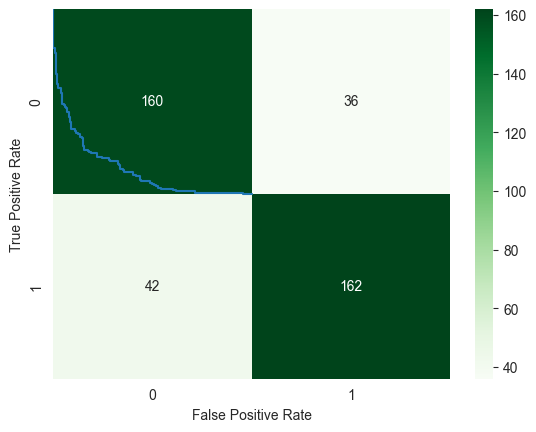

*****************************************************************************************************************************
Num atr: 250
size: 1000
maxIter: 1250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.93      0.42      0.58       196
        True       0.64      0.97      0.77       204

    accuracy                           0.70       400
   macro avg       0.78      0.70      0.68       400
weighted avg       0.78      0.70      0.68       400



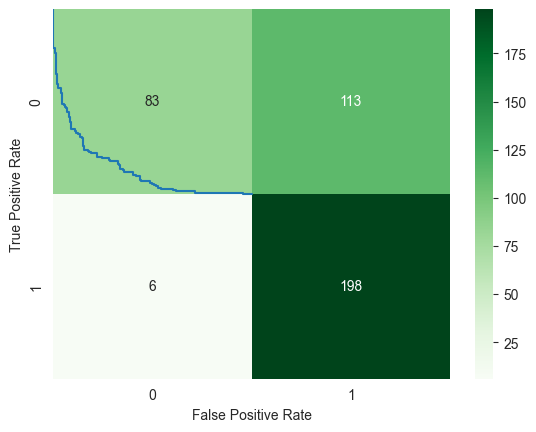

*****************************************************************************************************************************
Num atr: 300
size: 1000
maxIter: 1250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.80      0.79      0.80       196
        True       0.80      0.81      0.81       204

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



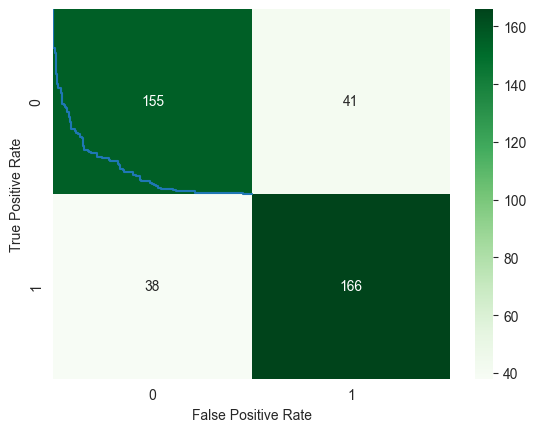

*****************************************************************************************************************************
Num atr: 350
size: 1000
maxIter: 1250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.80      0.81      0.81       196
        True       0.82      0.81      0.81       204

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



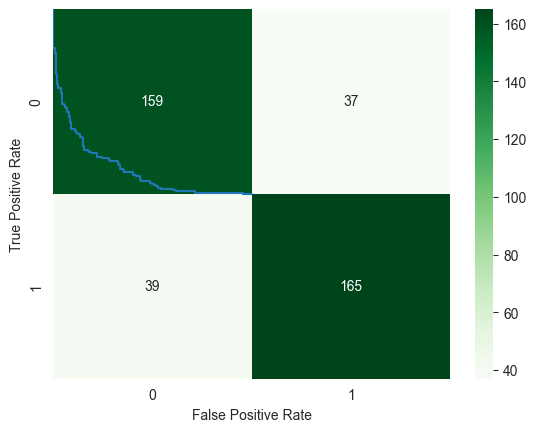

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 1000
maxIter: 1500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.71      0.78      0.75       196
        True       0.77      0.70      0.73       204

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400



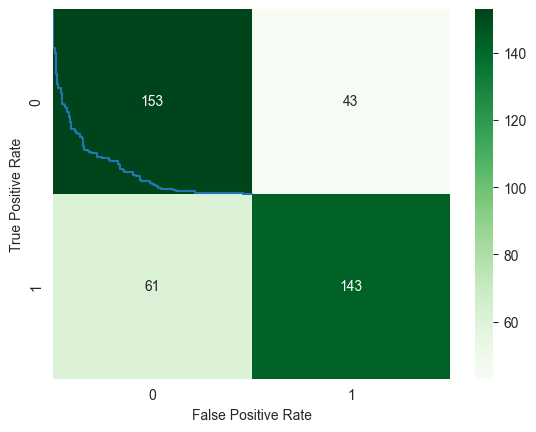

*****************************************************************************************************************************
Num atr: 100
size: 1000
maxIter: 1500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.71      0.77      0.74       196
        True       0.76      0.70      0.73       204

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.73      0.73      0.73       400



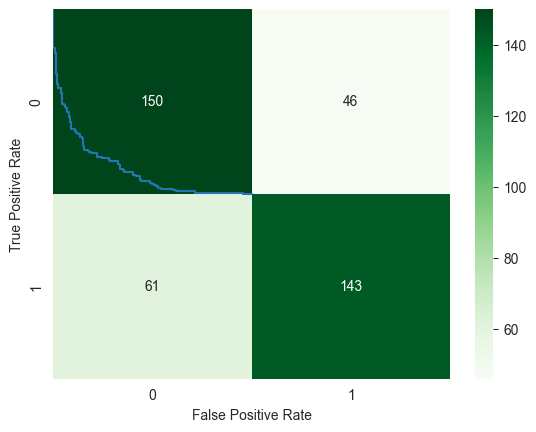

*****************************************************************************************************************************
Num atr: 200
size: 1000
maxIter: 1500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.71      0.71      0.71       196
        True       0.72      0.72      0.72       204

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.72      0.71      0.72       400



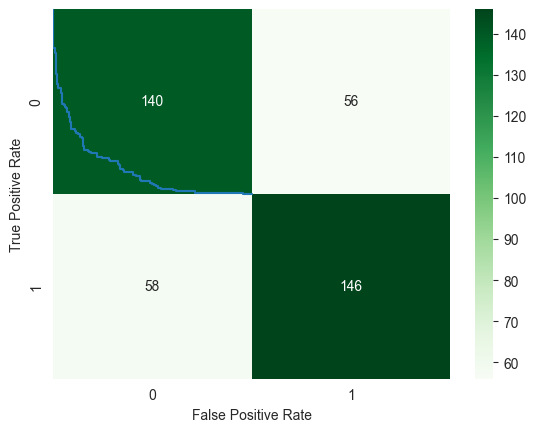

*****************************************************************************************************************************
Num atr: 250
size: 1000
maxIter: 1500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.75      0.72      0.74       196
        True       0.74      0.77      0.76       204

    accuracy                           0.75       400
   macro avg       0.75      0.75      0.75       400
weighted avg       0.75      0.75      0.75       400



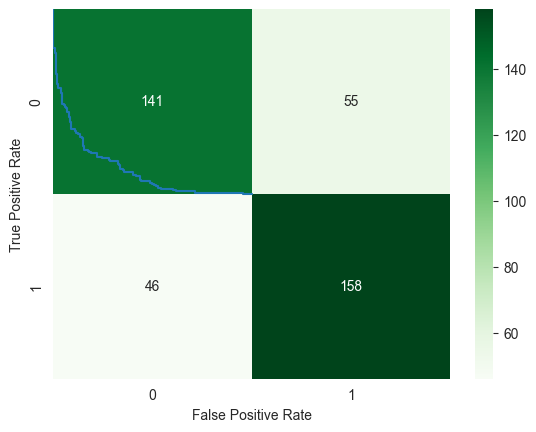

*****************************************************************************************************************************
Num atr: 300
size: 1000
maxIter: 1500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.77      0.72      0.74       196
        True       0.75      0.79      0.77       204

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.76      0.76      0.76       400



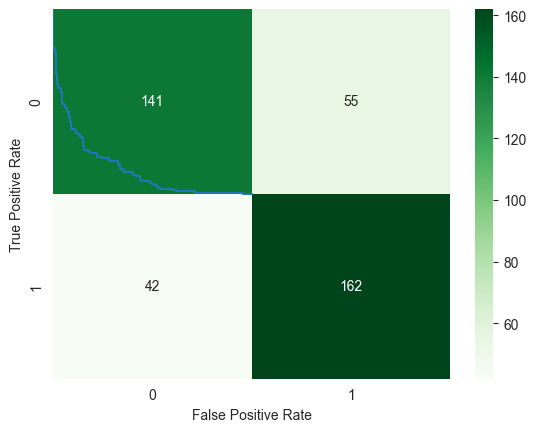

*****************************************************************************************************************************
Num atr: 350
size: 1000
maxIter: 1500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.75      0.69      0.72       196
        True       0.73      0.78      0.75       204

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400



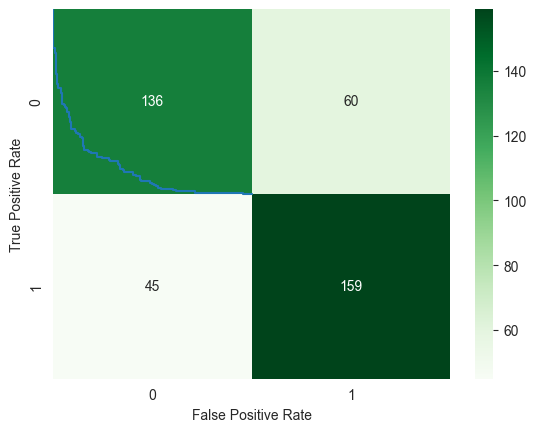

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 1000
maxIter: 2000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.71      0.85      0.78       196
        True       0.83      0.67      0.74       204

    accuracy                           0.76       400
   macro avg       0.77      0.76      0.76       400
weighted avg       0.77      0.76      0.76       400



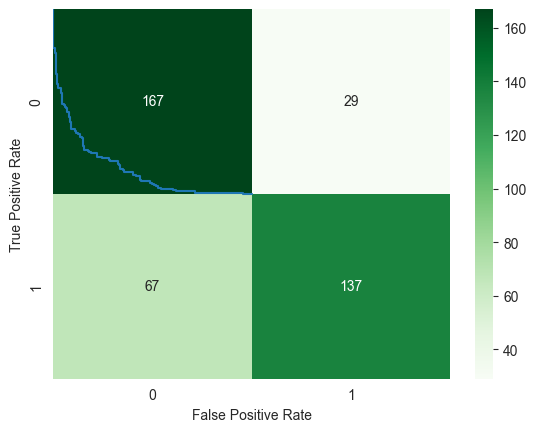

*****************************************************************************************************************************
Num atr: 100
size: 1000
maxIter: 2000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.92      0.23      0.37       196
        True       0.57      0.98      0.72       204

    accuracy                           0.61       400
   macro avg       0.75      0.61      0.55       400
weighted avg       0.74      0.61      0.55       400



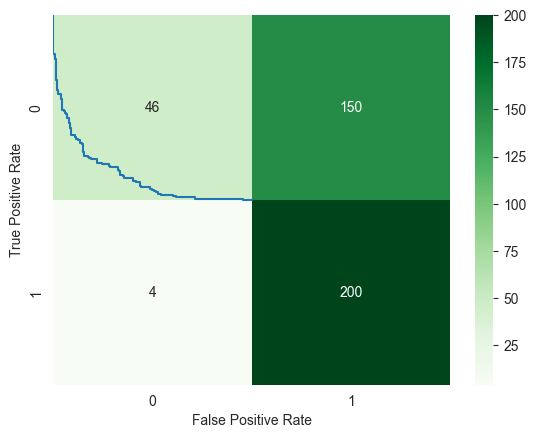

*****************************************************************************************************************************
Num atr: 200
size: 1000
maxIter: 2000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.92      0.29      0.44       196
        True       0.59      0.98      0.73       204

    accuracy                           0.64       400
   macro avg       0.75      0.63      0.59       400
weighted avg       0.75      0.64      0.59       400



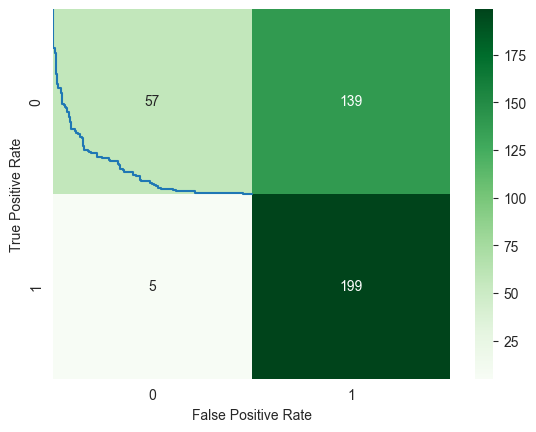

*****************************************************************************************************************************
Num atr: 250
size: 1000
maxIter: 2000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.93      0.33      0.49       196
        True       0.60      0.98      0.75       204

    accuracy                           0.66       400
   macro avg       0.77      0.65      0.62       400
weighted avg       0.76      0.66      0.62       400



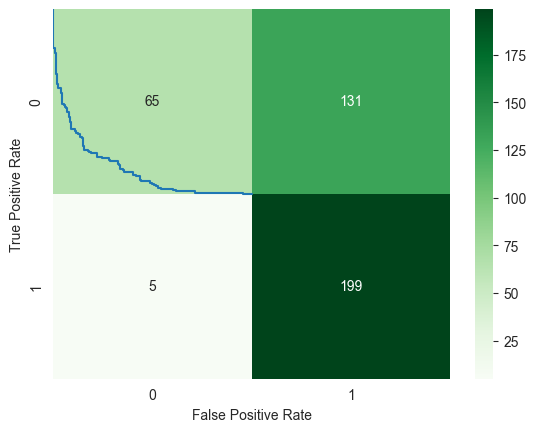

*****************************************************************************************************************************
Num atr: 300
size: 1000
maxIter: 2000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.73      0.77      0.75       196
        True       0.76      0.73      0.74       204

    accuracy                           0.74       400
   macro avg       0.75      0.75      0.74       400
weighted avg       0.75      0.74      0.74       400



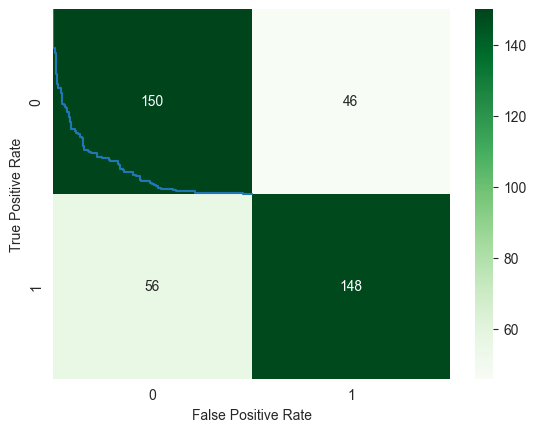

*****************************************************************************************************************************
Num atr: 350
size: 1000
maxIter: 2000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.61      0.91      0.73       196
        True       0.84      0.43      0.57       204

    accuracy                           0.67       400
   macro avg       0.72      0.67      0.65       400
weighted avg       0.72      0.67      0.65       400



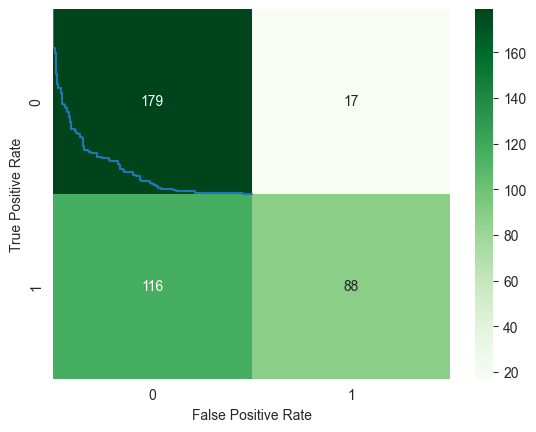

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 2000
maxIter: 100
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.56      0.99      0.71       407
        True       0.95      0.19      0.31       393

    accuracy                           0.59       800
   macro avg       0.75      0.59      0.51       800
weighted avg       0.75      0.59      0.52       800



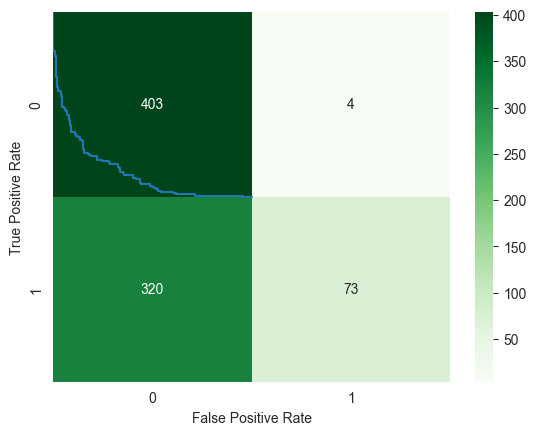

*****************************************************************************************************************************
Num atr: 100
size: 2000
maxIter: 100
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.57      0.98      0.72       407
        True       0.93      0.24      0.38       393

    accuracy                           0.62       800
   macro avg       0.75      0.61      0.55       800
weighted avg       0.75      0.62      0.55       800



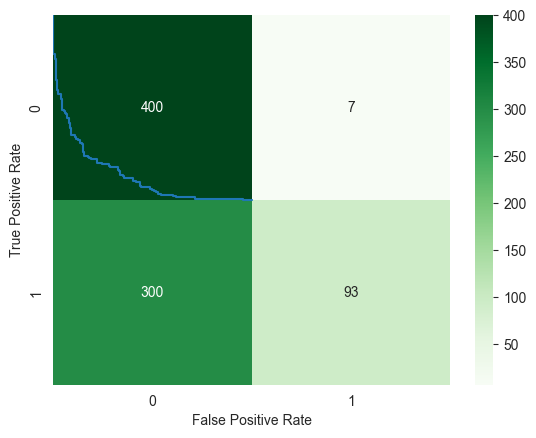

*****************************************************************************************************************************
Num atr: 200
size: 2000
maxIter: 100
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.60      0.98      0.75       407
        True       0.93      0.34      0.50       393

    accuracy                           0.66       800
   macro avg       0.77      0.66      0.62       800
weighted avg       0.76      0.66      0.62       800



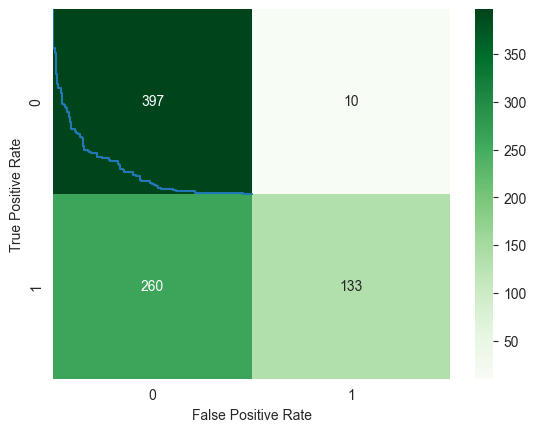

*****************************************************************************************************************************
Num atr: 250
size: 2000
maxIter: 100
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.90      0.37      0.52       407
        True       0.59      0.96      0.73       393

    accuracy                           0.66       800
   macro avg       0.75      0.66      0.63       800
weighted avg       0.75      0.66      0.62       800



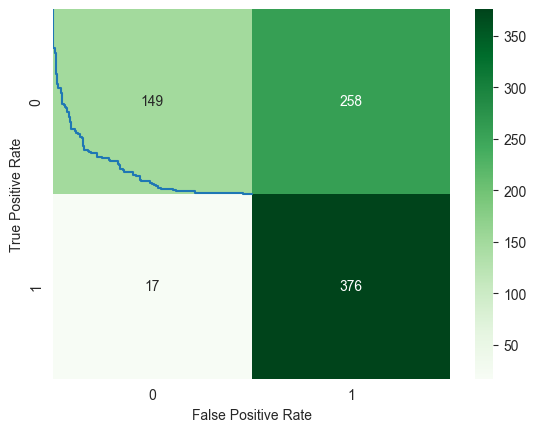

*****************************************************************************************************************************
Num atr: 300
size: 2000
maxIter: 100
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.79      0.80      0.79       407
        True       0.79      0.78      0.79       393

    accuracy                           0.79       800
   macro avg       0.79      0.79      0.79       800
weighted avg       0.79      0.79      0.79       800



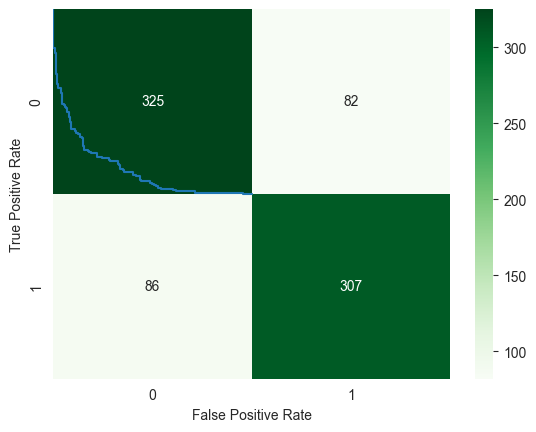

*****************************************************************************************************************************
Num atr: 350
size: 2000
maxIter: 100
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.80      0.80      0.80       407
        True       0.79      0.79      0.79       393

    accuracy                           0.80       800
   macro avg       0.79      0.79      0.79       800
weighted avg       0.80      0.80      0.80       800



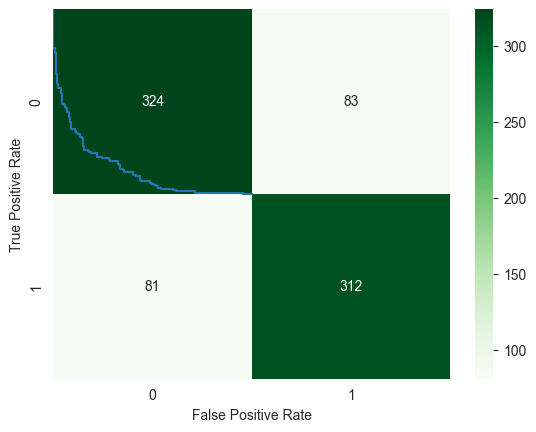

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 2000
maxIter: 250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.93      0.17      0.29       407
        True       0.54      0.99      0.69       393

    accuracy                           0.57       800
   macro avg       0.74      0.58      0.49       800
weighted avg       0.74      0.57      0.49       800



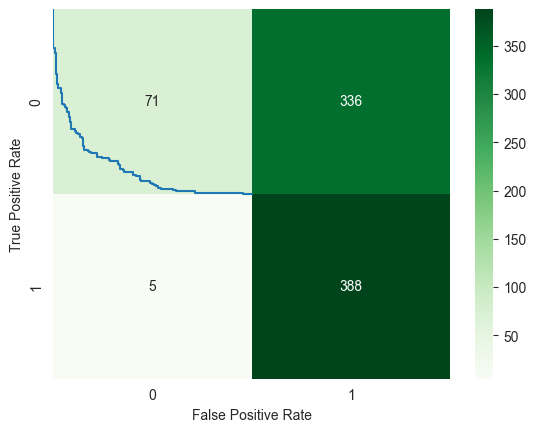

*****************************************************************************************************************************
Num atr: 100
size: 2000
maxIter: 250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.78      0.83      0.80       407
        True       0.81      0.75      0.78       393

    accuracy                           0.79       800
   macro avg       0.79      0.79      0.79       800
weighted avg       0.79      0.79      0.79       800



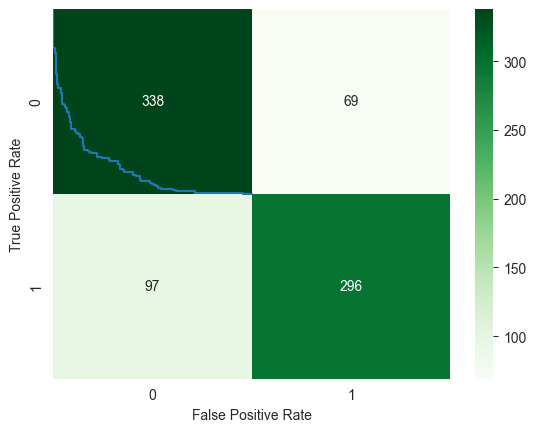

*****************************************************************************************************************************
Num atr: 200
size: 2000
maxIter: 250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.61      0.98      0.75       407
        True       0.95      0.34      0.50       393

    accuracy                           0.67       800
   macro avg       0.78      0.66      0.62       800
weighted avg       0.78      0.67      0.63       800



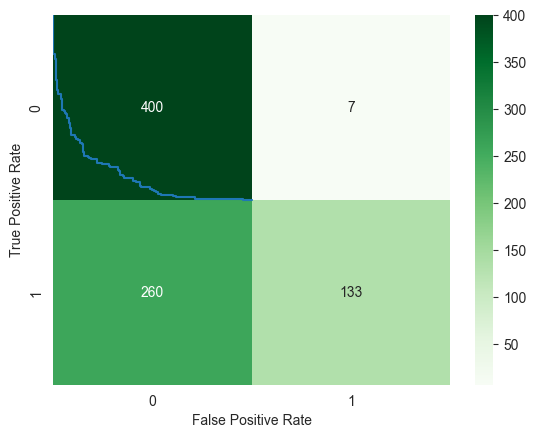

*****************************************************************************************************************************
Num atr: 250
size: 2000
maxIter: 250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.63      0.98      0.77       407
        True       0.95      0.40      0.56       393

    accuracy                           0.69       800
   macro avg       0.79      0.69      0.66       800
weighted avg       0.79      0.69      0.67       800



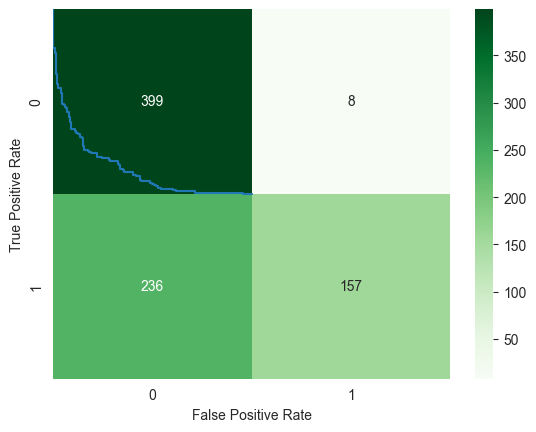

*****************************************************************************************************************************
Num atr: 300
size: 2000
maxIter: 250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.77      0.85      0.81       407
        True       0.82      0.74      0.78       393

    accuracy                           0.79       800
   macro avg       0.80      0.79      0.79       800
weighted avg       0.80      0.79      0.79       800



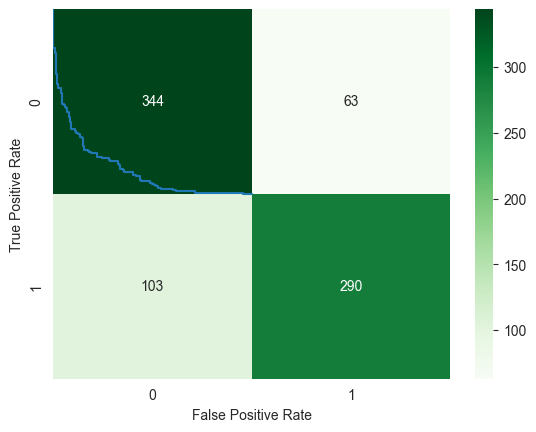

*****************************************************************************************************************************
Num atr: 350
size: 2000
maxIter: 250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.64      0.97      0.77       407
        True       0.93      0.43      0.59       393

    accuracy                           0.70       800
   macro avg       0.78      0.70      0.68       800
weighted avg       0.78      0.70      0.68       800



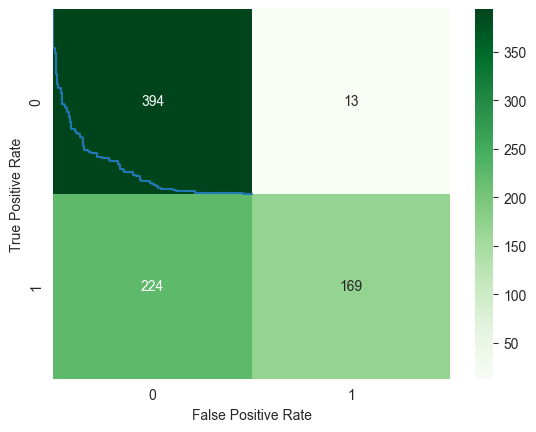

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 2000
maxIter: 500
*****************************************************************************************************************************
              precision    recall  f1-score   support

       False       0.71      0.88      0.79       407
        True       0.84      0.63      0.72       393

    accuracy                           0.76       800
   macro avg       0.78      0.76      0.76       800
weighted avg       0.77      0.76      0.76       800



C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


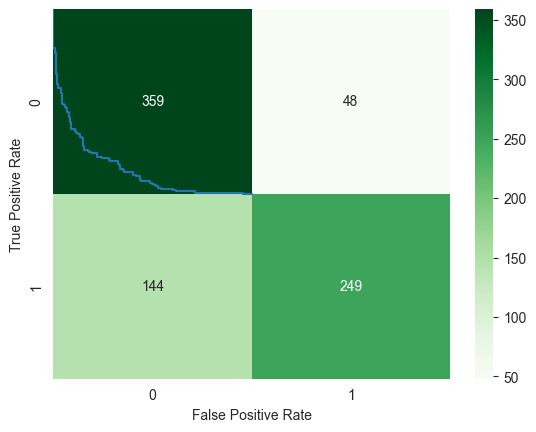

*****************************************************************************************************************************
Num atr: 100
size: 2000
maxIter: 500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.75      0.84      0.79       407
        True       0.81      0.70      0.75       393

    accuracy                           0.77       800
   macro avg       0.78      0.77      0.77       800
weighted avg       0.78      0.77      0.77       800



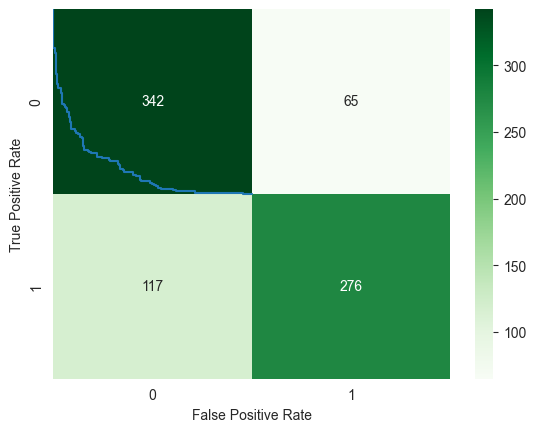

*****************************************************************************************************************************
Num atr: 200
size: 2000
maxIter: 500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.61      0.99      0.75       407
        True       0.96      0.35      0.51       393

    accuracy                           0.67       800
   macro avg       0.78      0.67      0.63       800
weighted avg       0.78      0.67      0.63       800



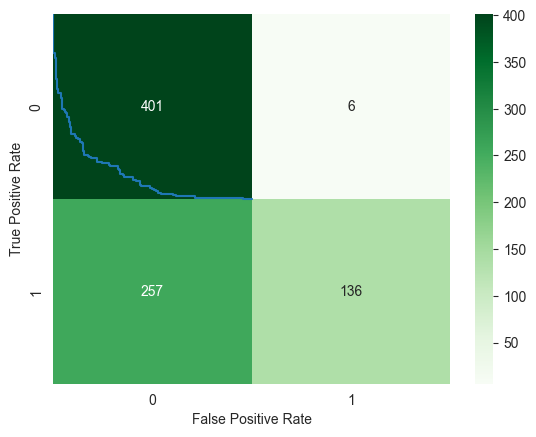

*****************************************************************************************************************************
Num atr: 250
size: 2000
maxIter: 500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.63      0.99      0.77       407
        True       0.97      0.39      0.56       393

    accuracy                           0.69       800
   macro avg       0.80      0.69      0.66       800
weighted avg       0.79      0.69      0.66       800



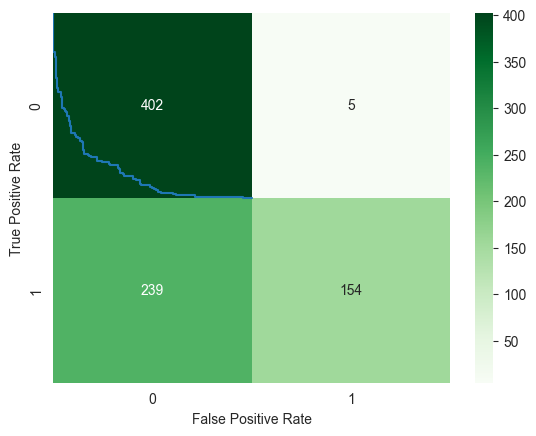

*****************************************************************************************************************************
Num atr: 300
size: 2000
maxIter: 500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.64      0.99      0.77       407
        True       0.98      0.41      0.58       393

    accuracy                           0.71       800
   macro avg       0.81      0.70      0.68       800
weighted avg       0.81      0.71      0.68       800



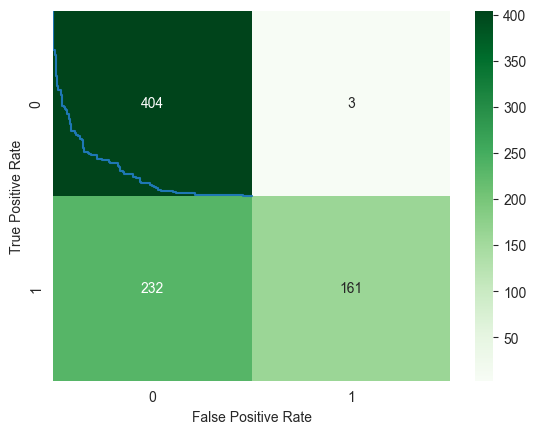

*****************************************************************************************************************************
Num atr: 350
size: 2000
maxIter: 500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.64      0.98      0.77       407
        True       0.95      0.42      0.59       393

    accuracy                           0.71       800
   macro avg       0.79      0.70      0.68       800
weighted avg       0.79      0.71      0.68       800



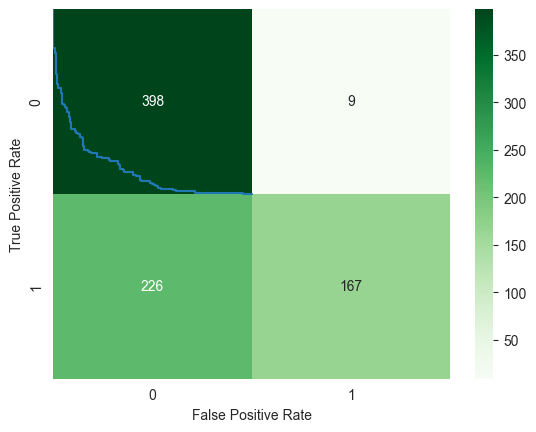

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 2000
maxIter: 1000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.96      0.11      0.20       407
        True       0.52      0.99      0.68       393

    accuracy                           0.55       800
   macro avg       0.74      0.55      0.44       800
weighted avg       0.74      0.55      0.44       800



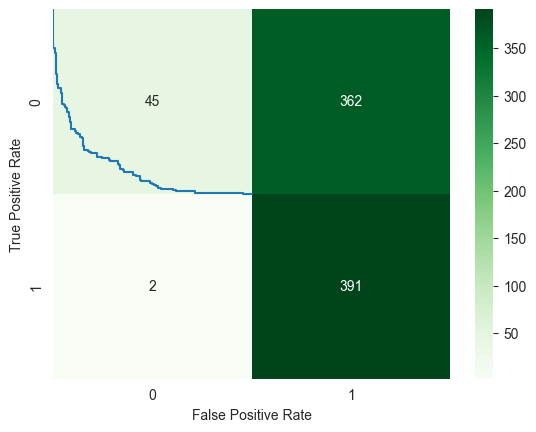

*****************************************************************************************************************************
Num atr: 100
size: 2000
maxIter: 1000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.94      0.18      0.31       407
        True       0.54      0.99      0.70       393

    accuracy                           0.58       800
   macro avg       0.74      0.59      0.50       800
weighted avg       0.74      0.58      0.50       800



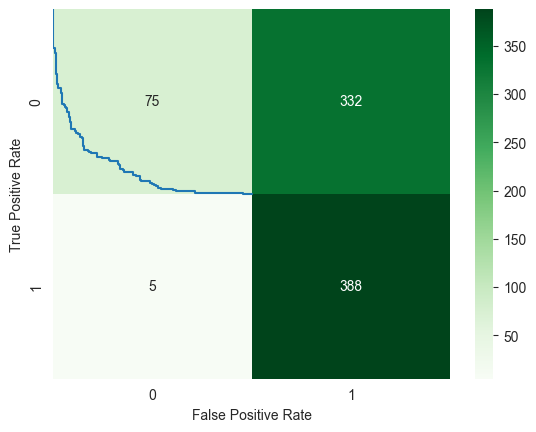

*****************************************************************************************************************************
Num atr: 200
size: 2000
maxIter: 1000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.94      0.30      0.45       407
        True       0.57      0.98      0.72       393

    accuracy                           0.63       800
   macro avg       0.76      0.64      0.59       800
weighted avg       0.76      0.63      0.59       800



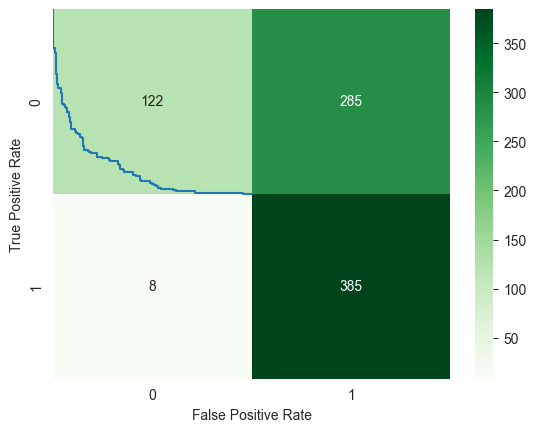

*****************************************************************************************************************************
Num atr: 250
size: 2000
maxIter: 1000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.62      0.98      0.76       407
        True       0.94      0.39      0.55       393

    accuracy                           0.69       800
   macro avg       0.78      0.68      0.66       800
weighted avg       0.78      0.69      0.66       800



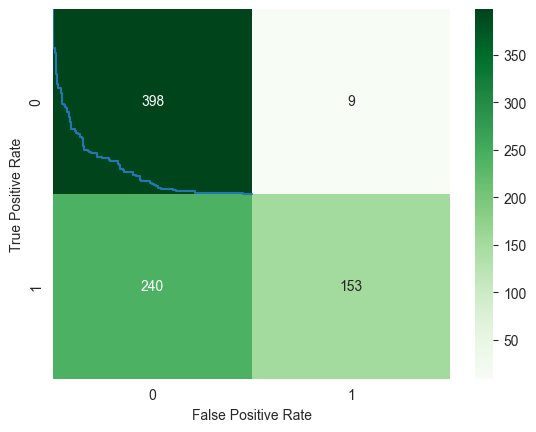

*****************************************************************************************************************************
Num atr: 300
size: 2000
maxIter: 1000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.94      0.33      0.49       407
        True       0.59      0.98      0.73       393

    accuracy                           0.65       800
   macro avg       0.76      0.66      0.61       800
weighted avg       0.77      0.65      0.61       800



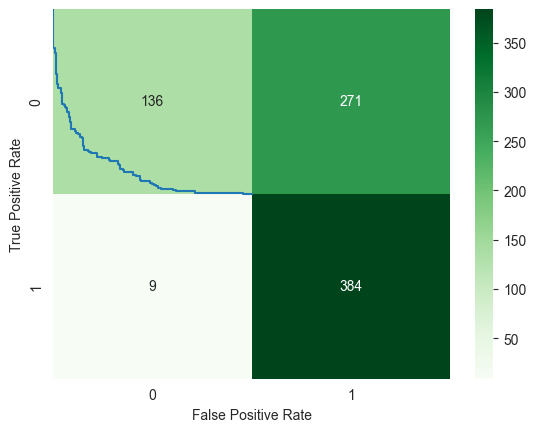

*****************************************************************************************************************************
Num atr: 350
size: 2000
maxIter: 1000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.64      0.98      0.78       407
        True       0.95      0.44      0.60       393

    accuracy                           0.71       800
   macro avg       0.80      0.71      0.69       800
weighted avg       0.79      0.71      0.69       800



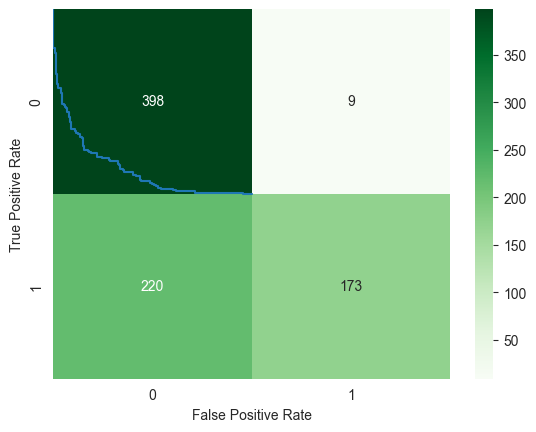

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 2000
maxIter: 1250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.95      0.14      0.25       407
        True       0.53      0.99      0.69       393

    accuracy                           0.56       800
   macro avg       0.74      0.57      0.47       800
weighted avg       0.74      0.56      0.46       800



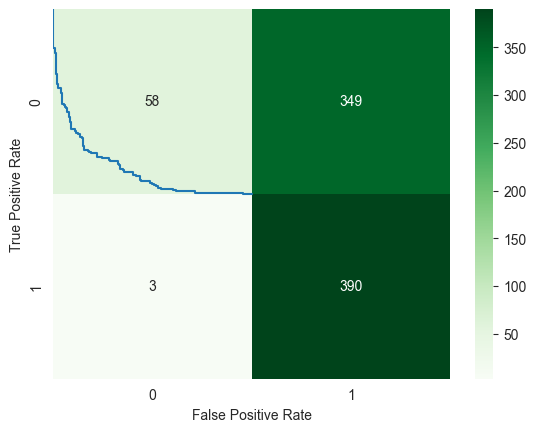

*****************************************************************************************************************************
Num atr: 100
size: 2000
maxIter: 1250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.97      0.23      0.37       407
        True       0.55      0.99      0.71       393

    accuracy                           0.60       800
   macro avg       0.76      0.61      0.54       800
weighted avg       0.76      0.60      0.54       800



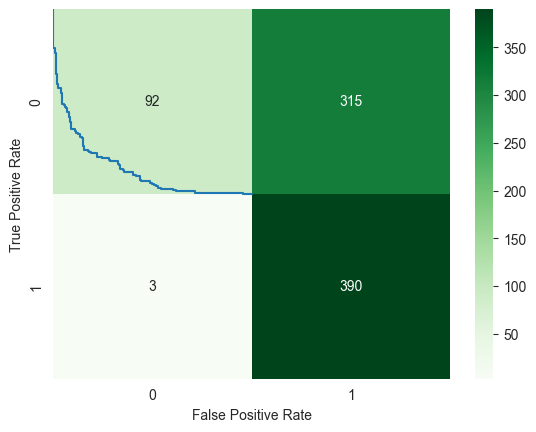

*****************************************************************************************************************************
Num atr: 200
size: 2000
maxIter: 1250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.77      0.84      0.80       407
        True       0.81      0.74      0.77       393

    accuracy                           0.79       800
   macro avg       0.79      0.79      0.79       800
weighted avg       0.79      0.79      0.79       800



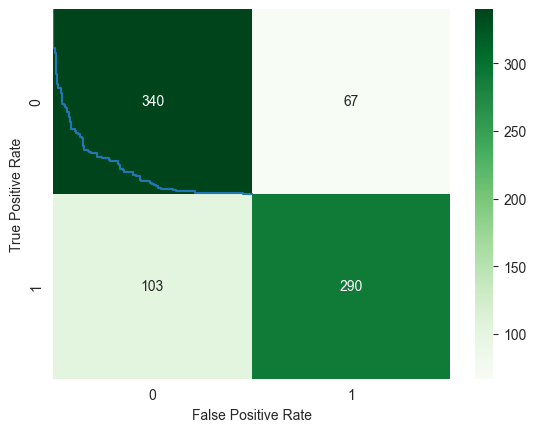

*****************************************************************************************************************************
Num atr: 250
size: 2000
maxIter: 1250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.81      0.83      0.82       407
        True       0.81      0.79      0.80       393

    accuracy                           0.81       800
   macro avg       0.81      0.81      0.81       800
weighted avg       0.81      0.81      0.81       800



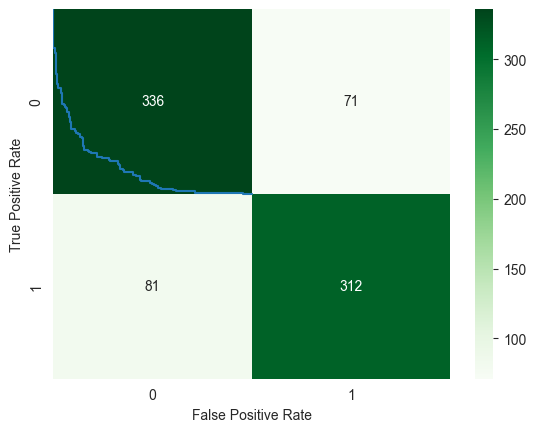

*****************************************************************************************************************************
Num atr: 300
size: 2000
maxIter: 1250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.80      0.81      0.81       407
        True       0.80      0.79      0.80       393

    accuracy                           0.80       800
   macro avg       0.80      0.80      0.80       800
weighted avg       0.80      0.80      0.80       800



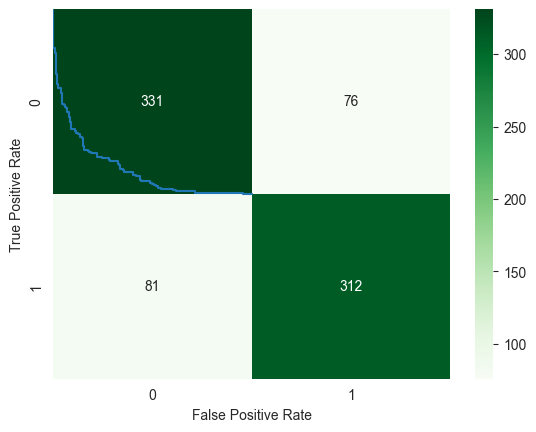

*****************************************************************************************************************************
Num atr: 350
size: 2000
maxIter: 1250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.80      0.83      0.81       407
        True       0.81      0.79      0.80       393

    accuracy                           0.81       800
   macro avg       0.81      0.81      0.81       800
weighted avg       0.81      0.81      0.81       800



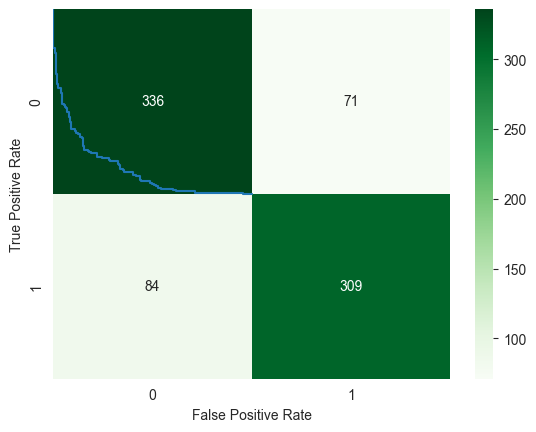

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 2000
maxIter: 1500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.74      0.83      0.78       407
        True       0.80      0.70      0.75       393

    accuracy                           0.77       800
   macro avg       0.77      0.77      0.76       800
weighted avg       0.77      0.77      0.77       800



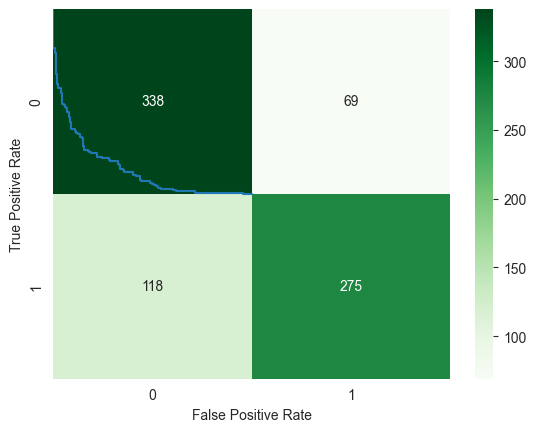

*****************************************************************************************************************************
Num atr: 100
size: 2000
maxIter: 1500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.94      0.25      0.39       407
        True       0.56      0.98      0.71       393

    accuracy                           0.61       800
   macro avg       0.75      0.62      0.55       800
weighted avg       0.75      0.61      0.55       800



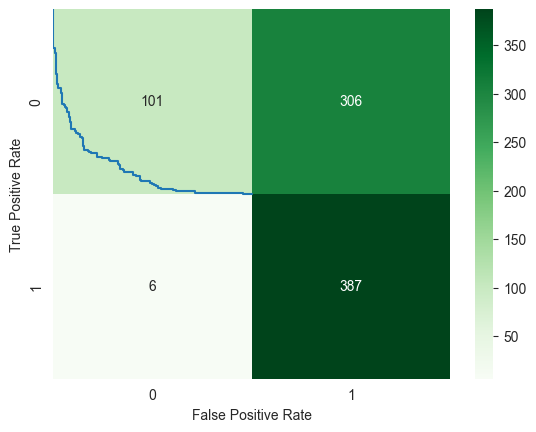

*****************************************************************************************************************************
Num atr: 200
size: 2000
maxIter: 1500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.78      0.84      0.81       407
        True       0.82      0.76      0.79       393

    accuracy                           0.80       800
   macro avg       0.80      0.80      0.80       800
weighted avg       0.80      0.80      0.80       800



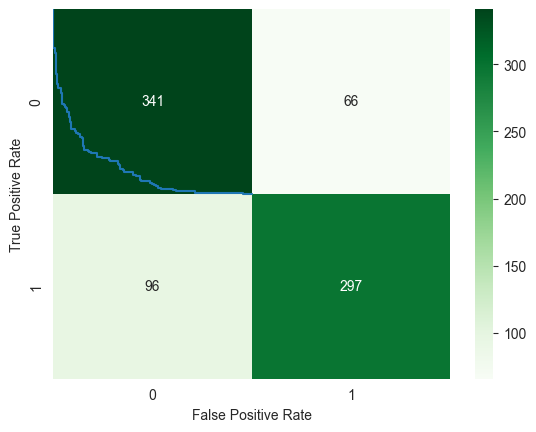

*****************************************************************************************************************************
Num atr: 250
size: 2000
maxIter: 1500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.80      0.85      0.82       407
        True       0.84      0.77      0.80       393

    accuracy                           0.81       800
   macro avg       0.82      0.81      0.81       800
weighted avg       0.82      0.81      0.81       800



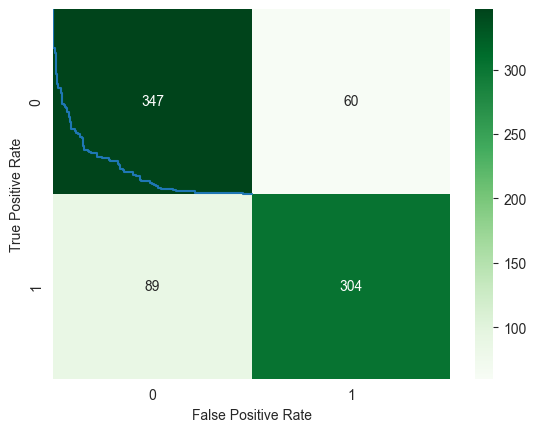

*****************************************************************************************************************************
Num atr: 300
size: 2000
maxIter: 1500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.80      0.82      0.81       407
        True       0.81      0.79      0.80       393

    accuracy                           0.81       800
   macro avg       0.81      0.80      0.80       800
weighted avg       0.81      0.81      0.80       800



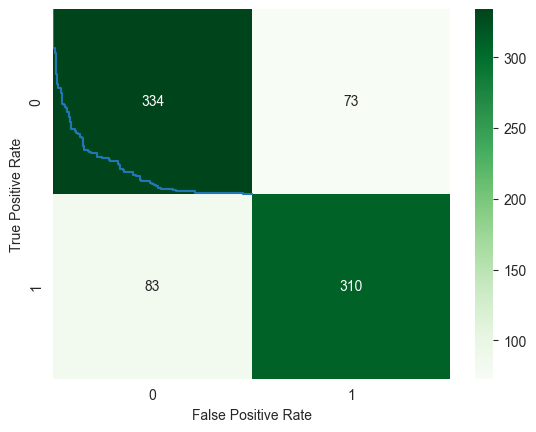

*****************************************************************************************************************************
Num atr: 350
size: 2000
maxIter: 1500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.81      0.84      0.82       407
        True       0.82      0.80      0.81       393

    accuracy                           0.82       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.82      0.82      0.82       800



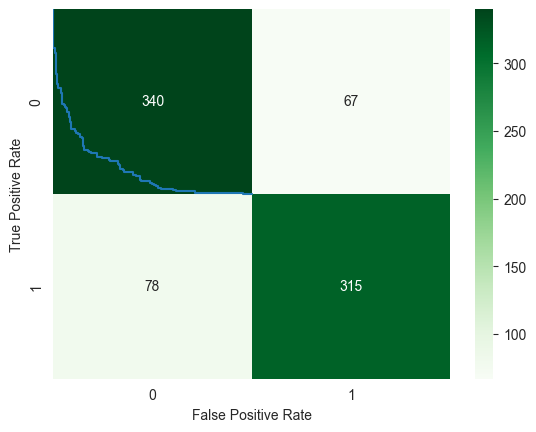

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 2000
maxIter: 2000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.98      0.15      0.26       407
        True       0.53      1.00      0.69       393

    accuracy                           0.56       800
   macro avg       0.76      0.57      0.47       800
weighted avg       0.76      0.56      0.47       800



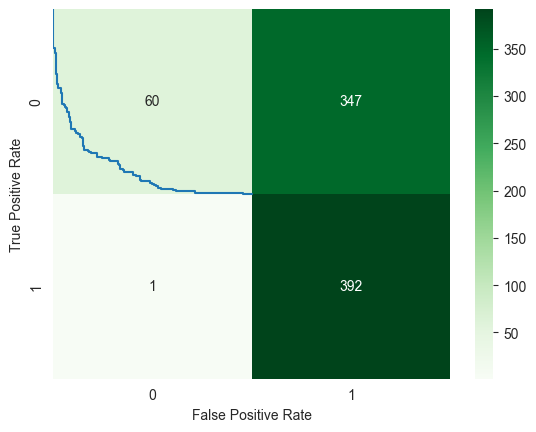

*****************************************************************************************************************************
Num atr: 100
size: 2000
maxIter: 2000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.97      0.24      0.39       407
        True       0.56      0.99      0.71       393

    accuracy                           0.61       800
   macro avg       0.76      0.62      0.55       800
weighted avg       0.77      0.61      0.55       800



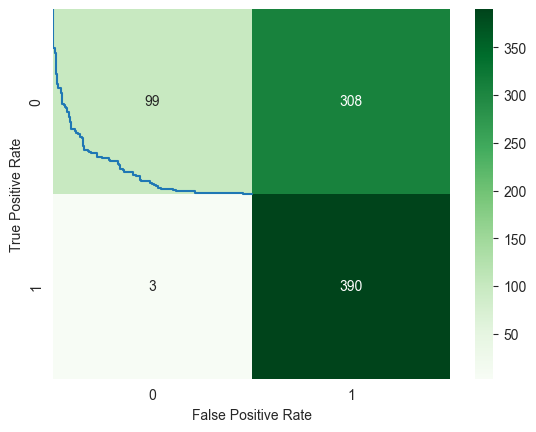

*****************************************************************************************************************************
Num atr: 200
size: 2000
maxIter: 2000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.79      0.84      0.81       407
        True       0.82      0.77      0.79       393

    accuracy                           0.81       800
   macro avg       0.81      0.80      0.80       800
weighted avg       0.81      0.81      0.80       800



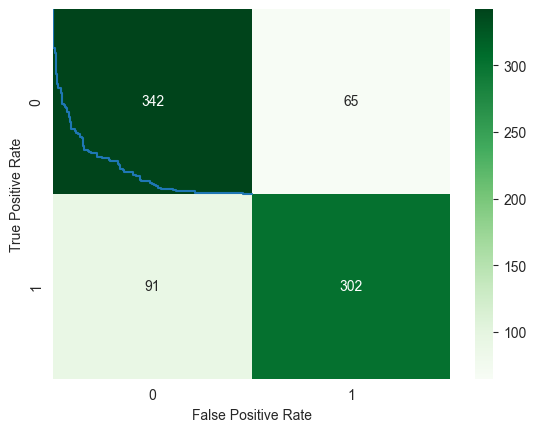

*****************************************************************************************************************************
Num atr: 250
size: 2000
maxIter: 2000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.80      0.84      0.82       407
        True       0.82      0.78      0.80       393

    accuracy                           0.81       800
   macro avg       0.81      0.81      0.81       800
weighted avg       0.81      0.81      0.81       800



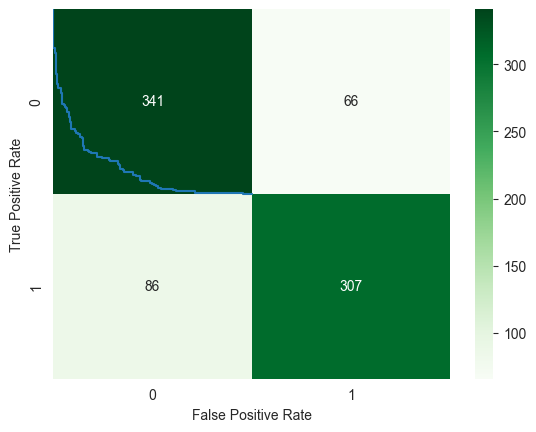

*****************************************************************************************************************************
Num atr: 300
size: 2000
maxIter: 2000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.65      0.98      0.78       407
        True       0.95      0.45      0.61       393

    accuracy                           0.72       800
   macro avg       0.80      0.71      0.70       800
weighted avg       0.80      0.72      0.70       800



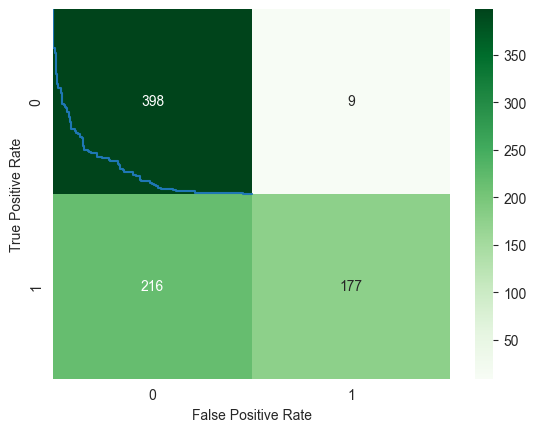

*****************************************************************************************************************************
Num atr: 350
size: 2000
maxIter: 2000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.64      0.98      0.77       407
        True       0.95      0.43      0.59       393

    accuracy                           0.71       800
   macro avg       0.79      0.70      0.68       800
weighted avg       0.79      0.71      0.68       800



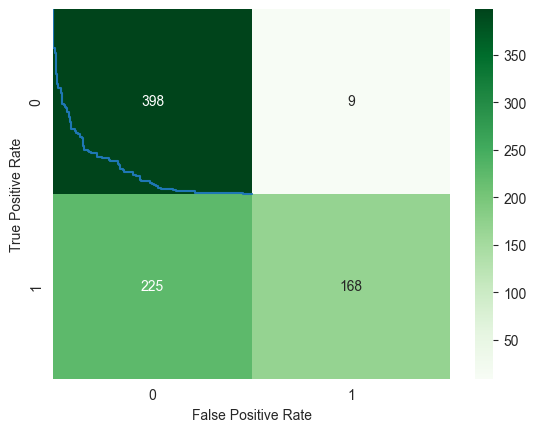

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 3000
maxIter: 100
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.74      0.86      0.79       601
        True       0.83      0.69      0.76       599

    accuracy                           0.78      1200
   macro avg       0.79      0.78      0.78      1200
weighted avg       0.79      0.78      0.78      1200



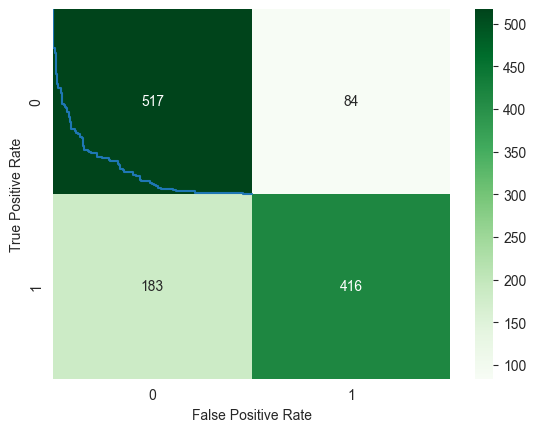

*****************************************************************************************************************************
Num atr: 100
size: 3000
maxIter: 100
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.77      0.84      0.80       601
        True       0.82      0.75      0.78       599

    accuracy                           0.79      1200
   macro avg       0.79      0.79      0.79      1200
weighted avg       0.79      0.79      0.79      1200



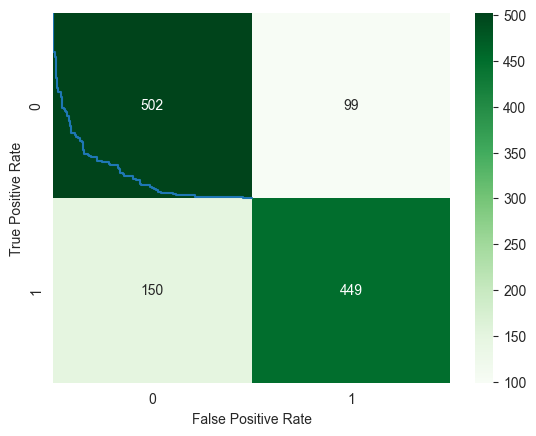

*****************************************************************************************************************************
Num atr: 200
size: 3000
maxIter: 100
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.79      0.85      0.82       601
        True       0.84      0.78      0.81       599

    accuracy                           0.81      1200
   macro avg       0.82      0.81      0.81      1200
weighted avg       0.82      0.81      0.81      1200



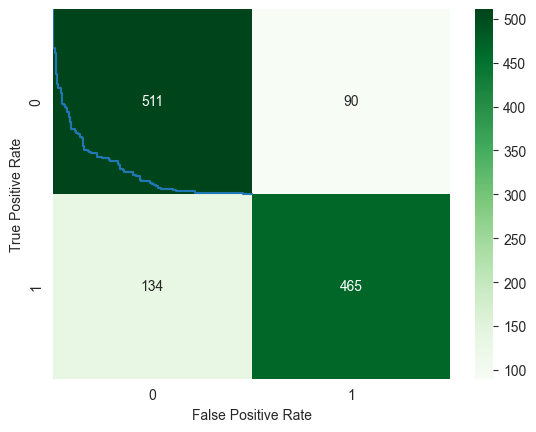

*****************************************************************************************************************************
Num atr: 250
size: 3000
maxIter: 100
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.79      0.85      0.82       601
        True       0.84      0.77      0.81       599

    accuracy                           0.81      1200
   macro avg       0.82      0.81      0.81      1200
weighted avg       0.82      0.81      0.81      1200



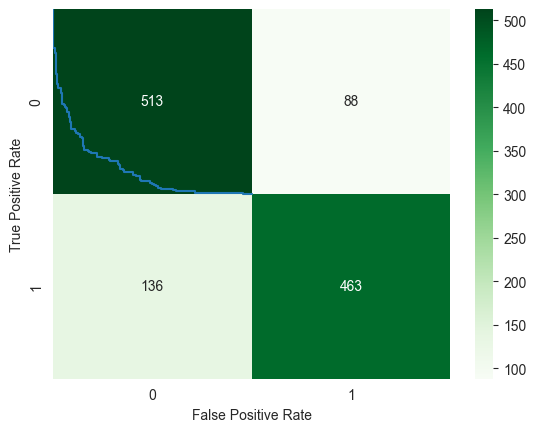

*****************************************************************************************************************************
Num atr: 300
size: 3000
maxIter: 100
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.79      0.84      0.81       601
        True       0.82      0.77      0.80       599

    accuracy                           0.80      1200
   macro avg       0.81      0.80      0.80      1200
weighted avg       0.81      0.80      0.80      1200



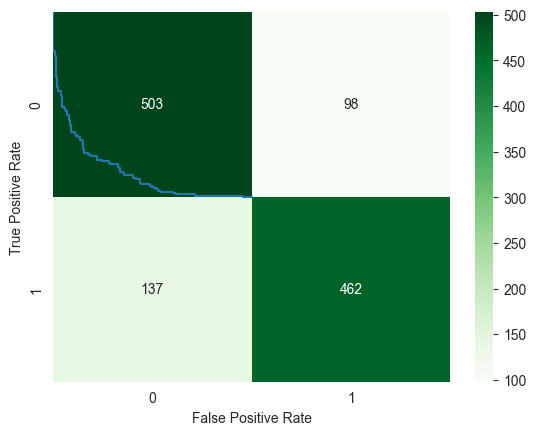

*****************************************************************************************************************************
Num atr: 350
size: 3000
maxIter: 100
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.79      0.85      0.82       601
        True       0.83      0.78      0.80       599

    accuracy                           0.81      1200
   macro avg       0.81      0.81      0.81      1200
weighted avg       0.81      0.81      0.81      1200



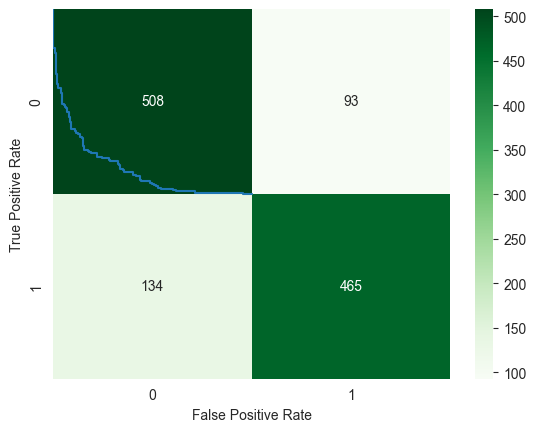

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 3000
maxIter: 250
*****************************************************************************************************************************
              precision    recall  f1-score   support

       False       0.73      0.84      0.78       601
        True       0.81      0.68      0.74       599

    accuracy                           0.76      1200
   macro avg       0.77      0.76      0.76      1200
weighted avg       0.77      0.76      0.76      1200



C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


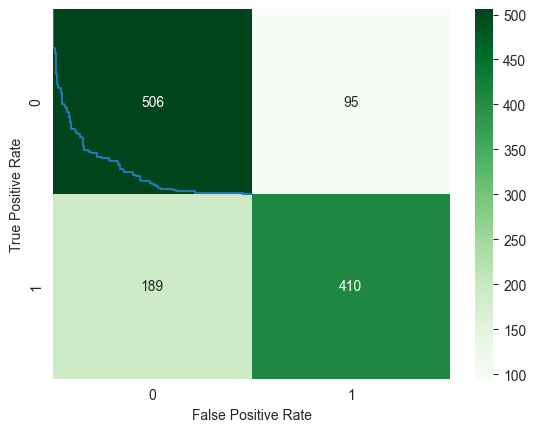

*****************************************************************************************************************************
Num atr: 100
size: 3000
maxIter: 250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.76      0.86      0.81       601
        True       0.84      0.72      0.78       599

    accuracy                           0.79      1200
   macro avg       0.80      0.79      0.79      1200
weighted avg       0.80      0.79      0.79      1200



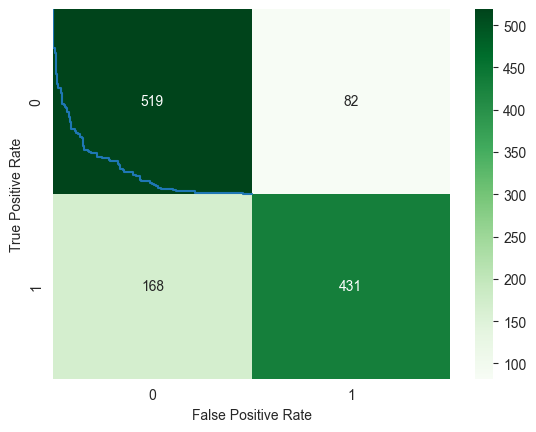

*****************************************************************************************************************************
Num atr: 200
size: 3000
maxIter: 250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.79      0.85      0.82       601
        True       0.84      0.77      0.80       599

    accuracy                           0.81      1200
   macro avg       0.81      0.81      0.81      1200
weighted avg       0.81      0.81      0.81      1200



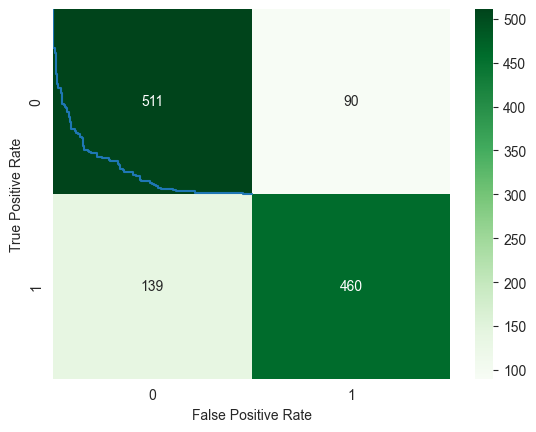

*****************************************************************************************************************************
Num atr: 250
size: 3000
maxIter: 250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.78      0.83      0.81       601
        True       0.82      0.77      0.79       599

    accuracy                           0.80      1200
   macro avg       0.80      0.80      0.80      1200
weighted avg       0.80      0.80      0.80      1200



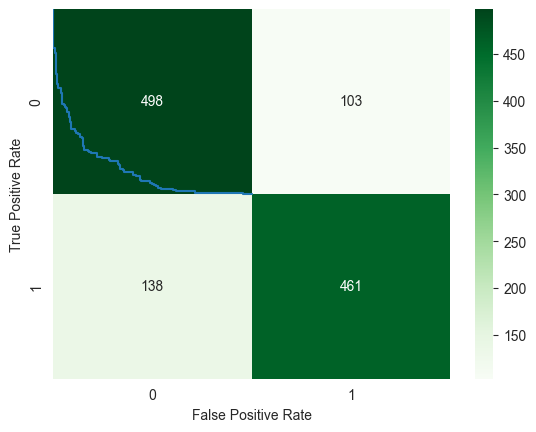

*****************************************************************************************************************************
Num atr: 300
size: 3000
maxIter: 250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.78      0.82      0.80       601
        True       0.81      0.76      0.79       599

    accuracy                           0.79      1200
   macro avg       0.80      0.79      0.79      1200
weighted avg       0.80      0.79      0.79      1200



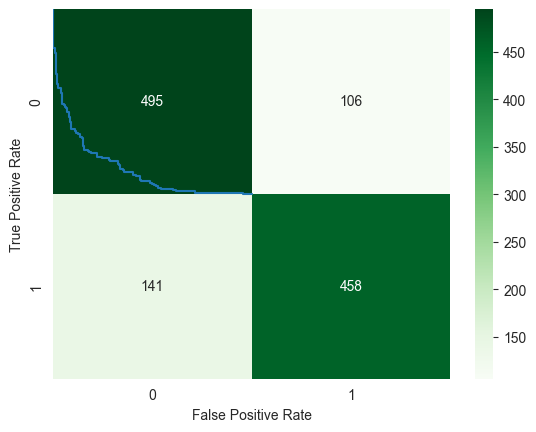

*****************************************************************************************************************************
Num atr: 350
size: 3000
maxIter: 250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.78      0.84      0.81       601
        True       0.82      0.76      0.79       599

    accuracy                           0.80      1200
   macro avg       0.80      0.80      0.80      1200
weighted avg       0.80      0.80      0.80      1200



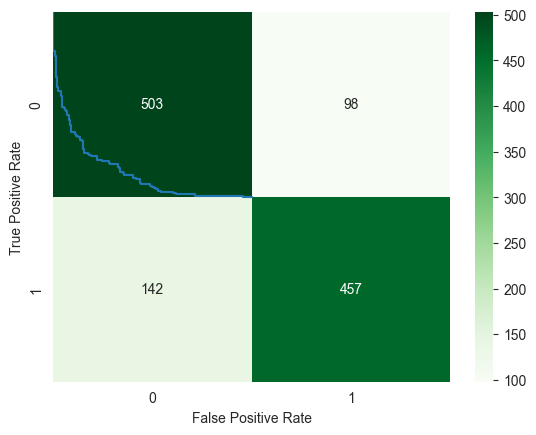

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 3000
maxIter: 500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.72      0.85      0.78       601
        True       0.82      0.67      0.74       599

    accuracy                           0.76      1200
   macro avg       0.77      0.76      0.76      1200
weighted avg       0.77      0.76      0.76      1200



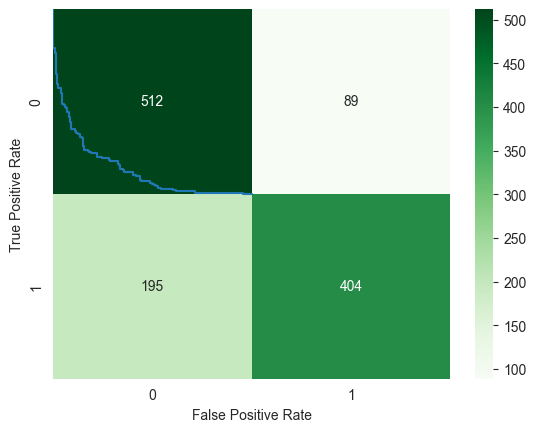

*****************************************************************************************************************************
Num atr: 100
size: 3000
maxIter: 500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.78      0.83      0.80       601
        True       0.81      0.76      0.79       599

    accuracy                           0.79      1200
   macro avg       0.80      0.79      0.79      1200
weighted avg       0.80      0.79      0.79      1200



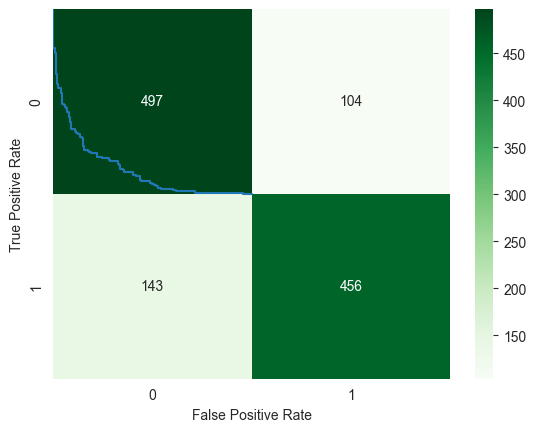

*****************************************************************************************************************************
Num atr: 200
size: 3000
maxIter: 500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.79      0.83      0.81       601
        True       0.82      0.77      0.79       599

    accuracy                           0.80      1200
   macro avg       0.80      0.80      0.80      1200
weighted avg       0.80      0.80      0.80      1200



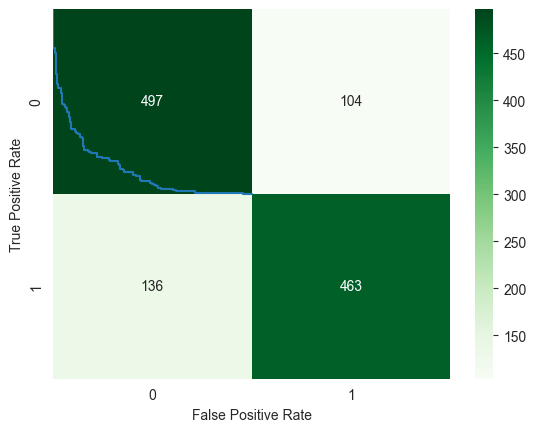

*****************************************************************************************************************************
Num atr: 250
size: 3000
maxIter: 500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.78      0.83      0.80       601
        True       0.82      0.76      0.79       599

    accuracy                           0.79      1200
   macro avg       0.80      0.79      0.79      1200
weighted avg       0.80      0.79      0.79      1200



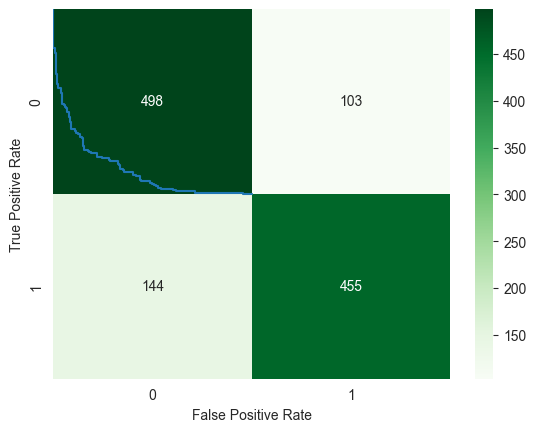

*****************************************************************************************************************************
Num atr: 300
size: 3000
maxIter: 500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.96      0.40      0.56       601
        True       0.62      0.98      0.76       599

    accuracy                           0.69      1200
   macro avg       0.79      0.69      0.66      1200
weighted avg       0.79      0.69      0.66      1200



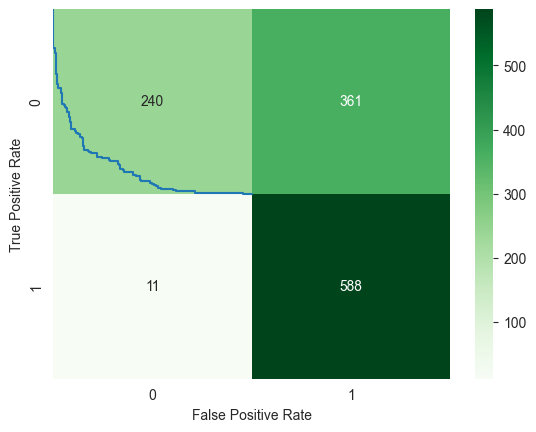

*****************************************************************************************************************************
Num atr: 350
size: 3000
maxIter: 500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.81      0.82      0.82       601
        True       0.82      0.81      0.82       599

    accuracy                           0.82      1200
   macro avg       0.82      0.82      0.82      1200
weighted avg       0.82      0.82      0.82      1200



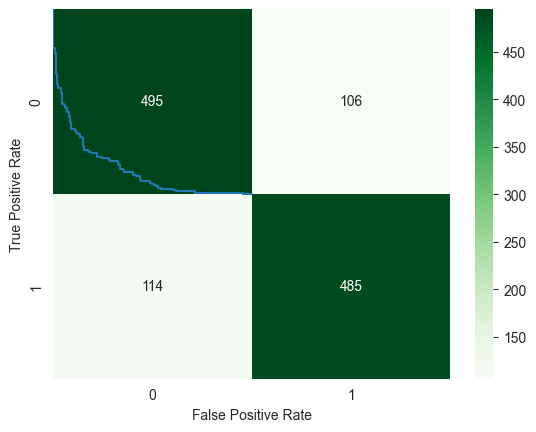

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 3000
maxIter: 1000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.73      0.84      0.78       601
        True       0.81      0.69      0.74       599

    accuracy                           0.76      1200
   macro avg       0.77      0.76      0.76      1200
weighted avg       0.77      0.76      0.76      1200



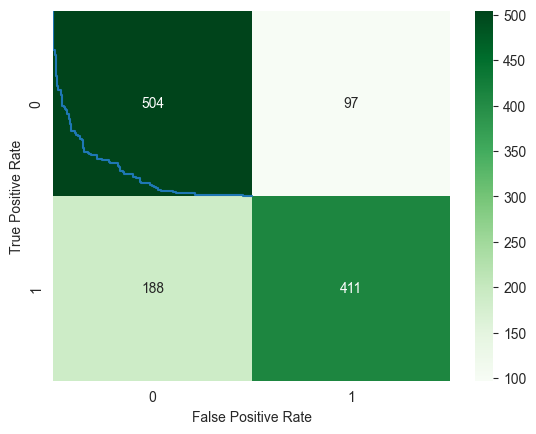

*****************************************************************************************************************************
Num atr: 100
size: 3000
maxIter: 1000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.76      0.81      0.78       601
        True       0.79      0.74      0.77       599

    accuracy                           0.78      1200
   macro avg       0.78      0.77      0.77      1200
weighted avg       0.78      0.78      0.77      1200



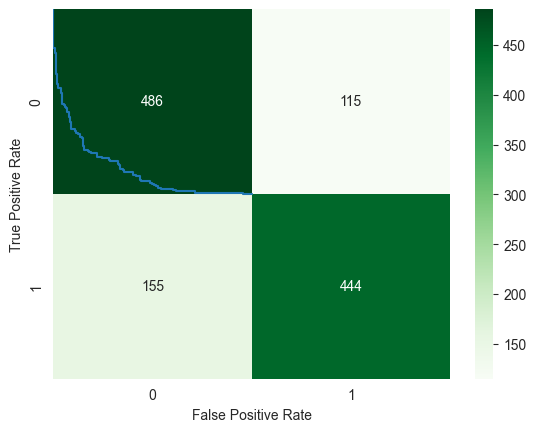

*****************************************************************************************************************************
Num atr: 200
size: 3000
maxIter: 1000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.78      0.80      0.79       601
        True       0.79      0.77      0.78       599

    accuracy                           0.78      1200
   macro avg       0.78      0.78      0.78      1200
weighted avg       0.78      0.78      0.78      1200



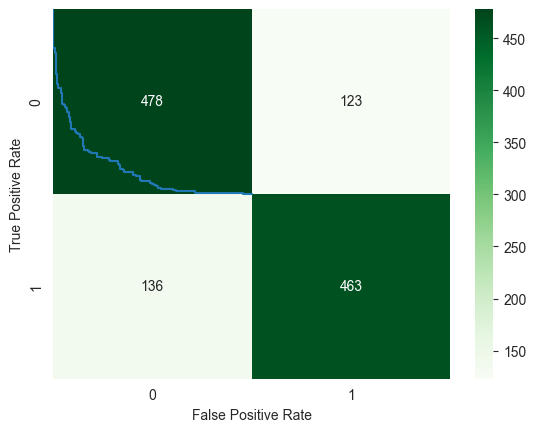

*****************************************************************************************************************************
Num atr: 250
size: 3000
maxIter: 1000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.78      0.82      0.80       601
        True       0.81      0.76      0.79       599

    accuracy                           0.79      1200
   macro avg       0.79      0.79      0.79      1200
weighted avg       0.79      0.79      0.79      1200



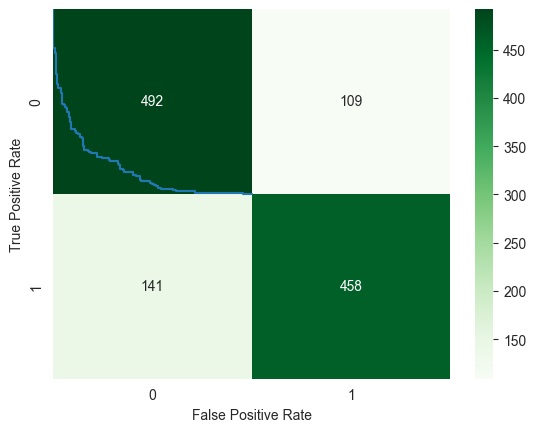

*****************************************************************************************************************************
Num atr: 300
size: 3000
maxIter: 1000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.78      0.81      0.80       601
        True       0.80      0.77      0.79       599

    accuracy                           0.79      1200
   macro avg       0.79      0.79      0.79      1200
weighted avg       0.79      0.79      0.79      1200



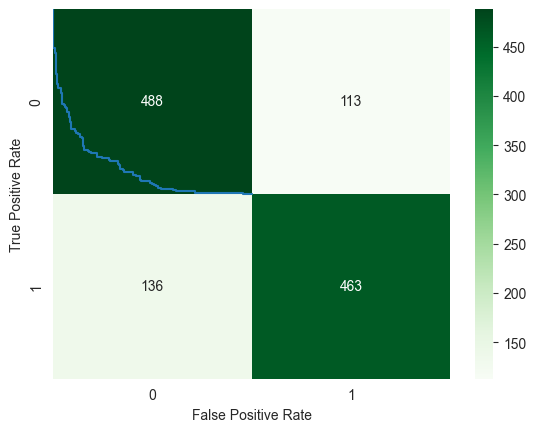

*****************************************************************************************************************************
Num atr: 350
size: 3000
maxIter: 1000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.79      0.81      0.80       601
        True       0.81      0.78      0.79       599

    accuracy                           0.80      1200
   macro avg       0.80      0.80      0.80      1200
weighted avg       0.80      0.80      0.80      1200



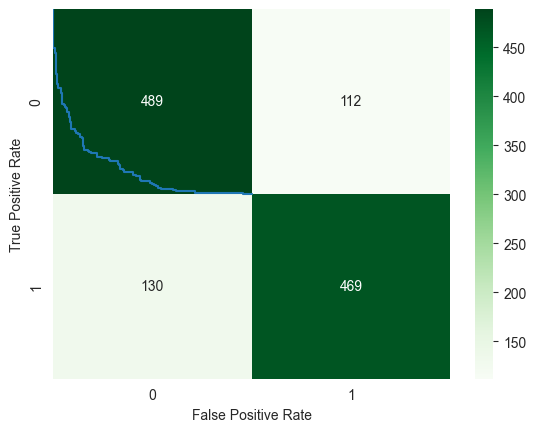

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 3000
maxIter: 1250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.71      0.84      0.77       601
        True       0.80      0.66      0.73       599

    accuracy                           0.75      1200
   macro avg       0.76      0.75      0.75      1200
weighted avg       0.76      0.75      0.75      1200



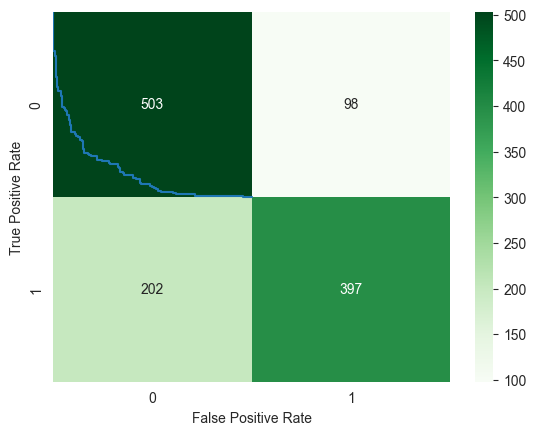

*****************************************************************************************************************************
Num atr: 100
size: 3000
maxIter: 1250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.74      0.84      0.79       601
        True       0.81      0.71      0.76       599

    accuracy                           0.77      1200
   macro avg       0.78      0.77      0.77      1200
weighted avg       0.78      0.77      0.77      1200



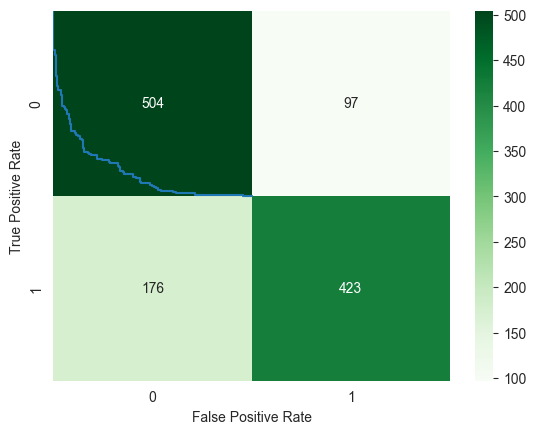

*****************************************************************************************************************************
Num atr: 200
size: 3000
maxIter: 1250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.76      0.84      0.79       601
        True       0.82      0.73      0.77       599

    accuracy                           0.78      1200
   macro avg       0.79      0.78      0.78      1200
weighted avg       0.79      0.78      0.78      1200



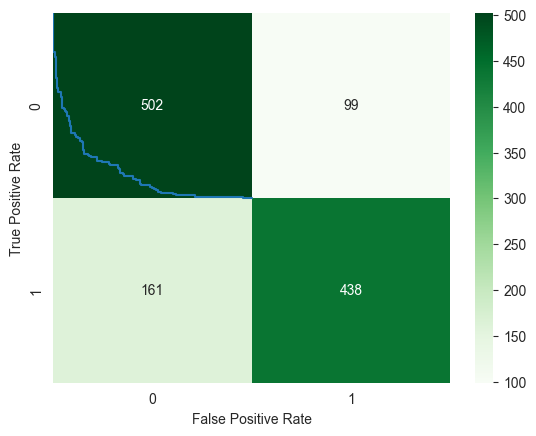

*****************************************************************************************************************************
Num atr: 250
size: 3000
maxIter: 1250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.76      0.82      0.79       601
        True       0.80      0.73      0.77       599

    accuracy                           0.78      1200
   macro avg       0.78      0.78      0.78      1200
weighted avg       0.78      0.78      0.78      1200



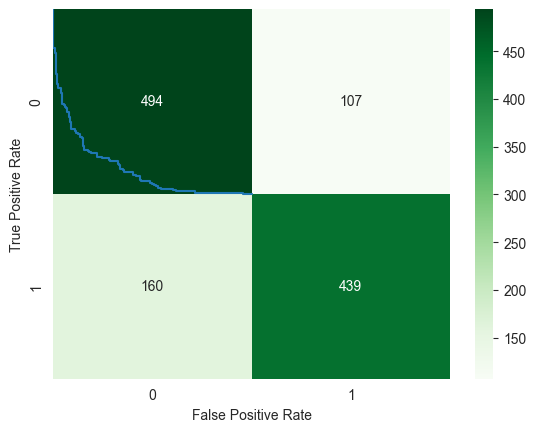

*****************************************************************************************************************************
Num atr: 300
size: 3000
maxIter: 1250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.61      0.98      0.75       601
        True       0.94      0.39      0.55       599

    accuracy                           0.68      1200
   macro avg       0.78      0.68      0.65      1200
weighted avg       0.78      0.68      0.65      1200



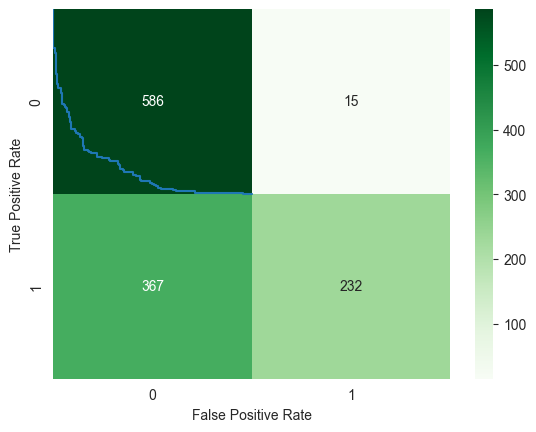

*****************************************************************************************************************************
Num atr: 350
size: 3000
maxIter: 1250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.63      0.98      0.77       601
        True       0.95      0.43      0.59       599

    accuracy                           0.70      1200
   macro avg       0.79      0.70      0.68      1200
weighted avg       0.79      0.70      0.68      1200



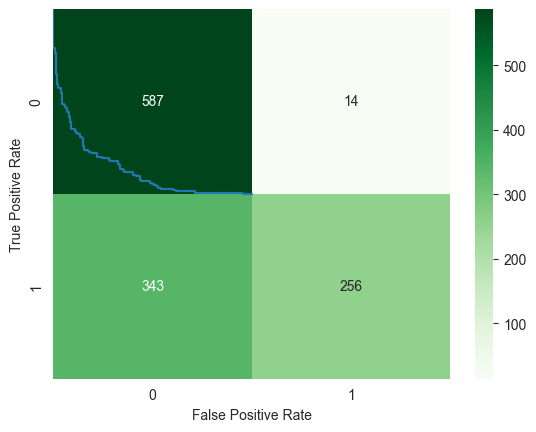

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 3000
maxIter: 1500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.75      0.84      0.79       601
        True       0.82      0.72      0.76       599

    accuracy                           0.78      1200
   macro avg       0.78      0.78      0.78      1200
weighted avg       0.78      0.78      0.78      1200



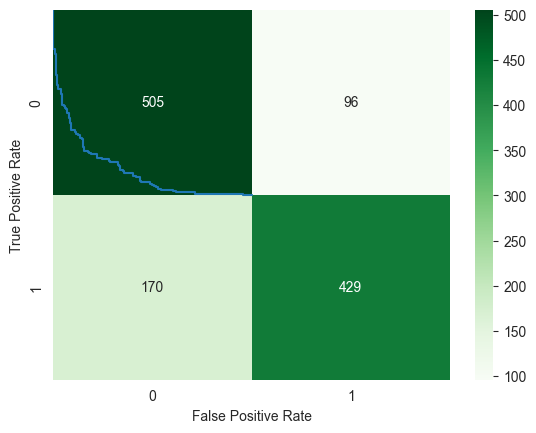

*****************************************************************************************************************************
Num atr: 100
size: 3000
maxIter: 1500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.77      0.86      0.81       601
        True       0.84      0.74      0.79       599

    accuracy                           0.80      1200
   macro avg       0.81      0.80      0.80      1200
weighted avg       0.81      0.80      0.80      1200



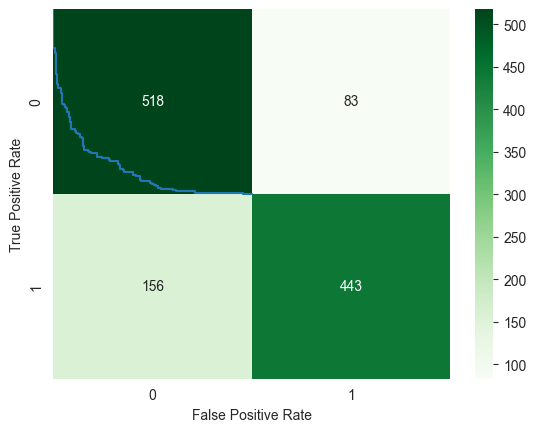

*****************************************************************************************************************************
Num atr: 200
size: 3000
maxIter: 1500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.79      0.84      0.82       601
        True       0.83      0.78      0.81       599

    accuracy                           0.81      1200
   macro avg       0.81      0.81      0.81      1200
weighted avg       0.81      0.81      0.81      1200



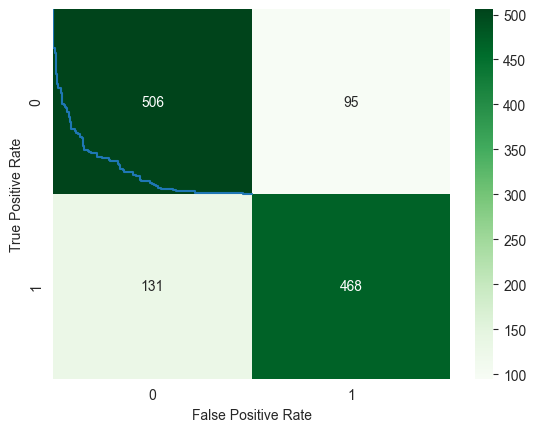

*****************************************************************************************************************************
Num atr: 250
size: 3000
maxIter: 1500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.81      0.83      0.82       601
        True       0.83      0.80      0.81       599

    accuracy                           0.82      1200
   macro avg       0.82      0.82      0.82      1200
weighted avg       0.82      0.82      0.82      1200



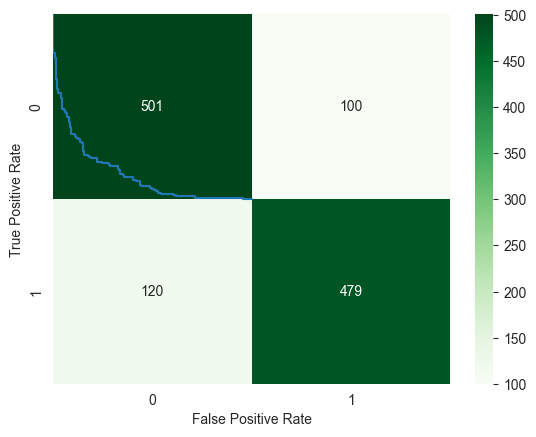

*****************************************************************************************************************************
Num atr: 300
size: 3000
maxIter: 1500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.80      0.85      0.83       601
        True       0.84      0.79      0.82       599

    accuracy                           0.82      1200
   macro avg       0.82      0.82      0.82      1200
weighted avg       0.82      0.82      0.82      1200



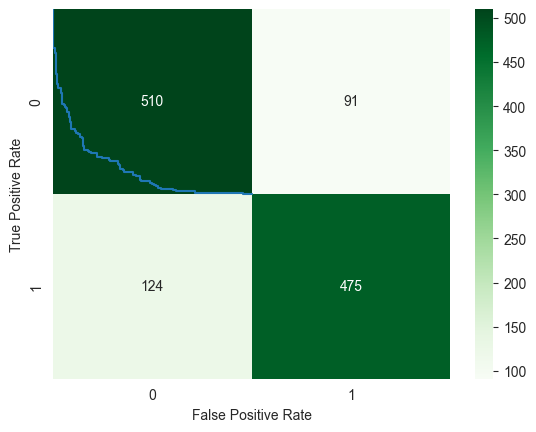

*****************************************************************************************************************************
Num atr: 350
size: 3000
maxIter: 1500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.81      0.84      0.82       601
        True       0.83      0.80      0.81       599

    accuracy                           0.82      1200
   macro avg       0.82      0.82      0.82      1200
weighted avg       0.82      0.82      0.82      1200



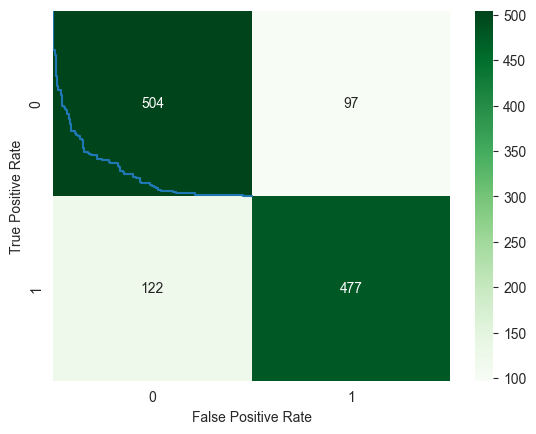

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 3000
maxIter: 2000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.54      0.99      0.70       601
        True       0.91      0.16      0.27       599

    accuracy                           0.57      1200
   macro avg       0.73      0.57      0.48      1200
weighted avg       0.73      0.57      0.48      1200



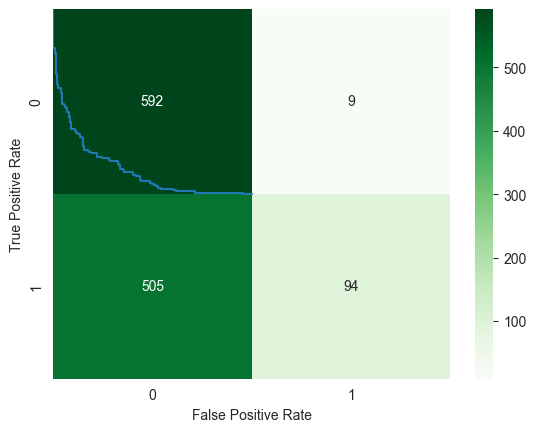

*****************************************************************************************************************************
Num atr: 100
size: 3000
maxIter: 2000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.97      0.17      0.29       601
        True       0.54      0.99      0.70       599

    accuracy                           0.58      1200
   macro avg       0.76      0.58      0.49      1200
weighted avg       0.76      0.58      0.49      1200



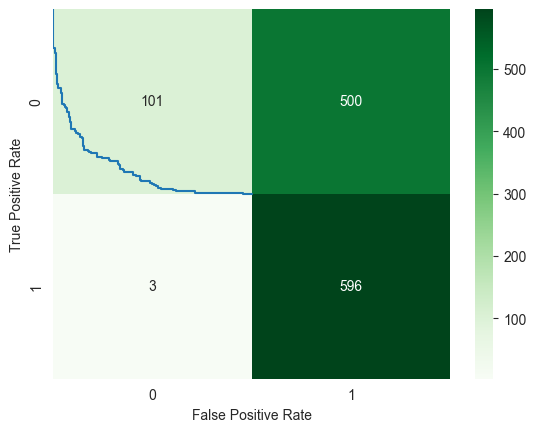

*****************************************************************************************************************************
Num atr: 200
size: 3000
maxIter: 2000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.59      0.98      0.74       601
        True       0.94      0.32      0.48       599

    accuracy                           0.65      1200
   macro avg       0.76      0.65      0.61      1200
weighted avg       0.76      0.65      0.61      1200



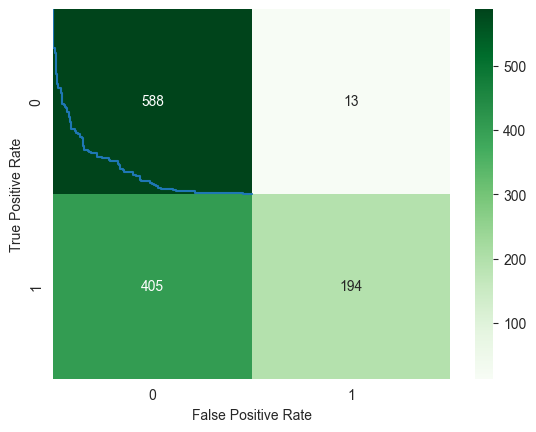

*****************************************************************************************************************************
Num atr: 250
size: 3000
maxIter: 2000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.79      0.85      0.82       601
        True       0.84      0.77      0.80       599

    accuracy                           0.81      1200
   macro avg       0.81      0.81      0.81      1200
weighted avg       0.81      0.81      0.81      1200



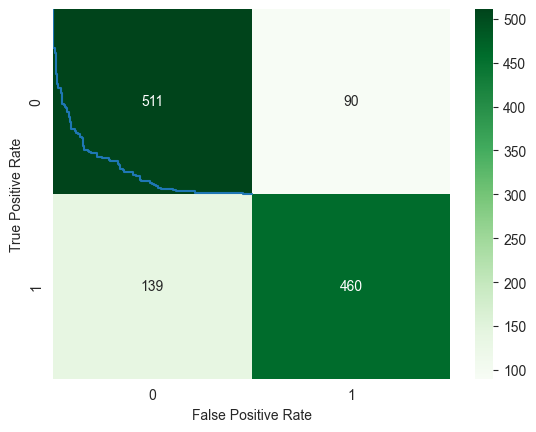

*****************************************************************************************************************************
Num atr: 300
size: 3000
maxIter: 2000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.80      0.83      0.81       601
        True       0.82      0.79      0.81       599

    accuracy                           0.81      1200
   macro avg       0.81      0.81      0.81      1200
weighted avg       0.81      0.81      0.81      1200



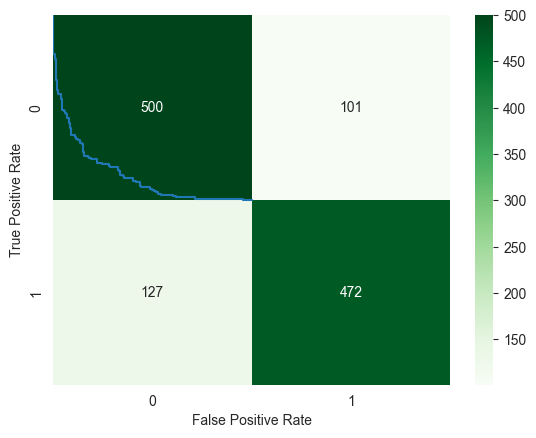

*****************************************************************************************************************************
Num atr: 350
size: 3000
maxIter: 2000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.81      0.83      0.82       601
        True       0.83      0.80      0.81       599

    accuracy                           0.82      1200
   macro avg       0.82      0.82      0.82      1200
weighted avg       0.82      0.82      0.82      1200



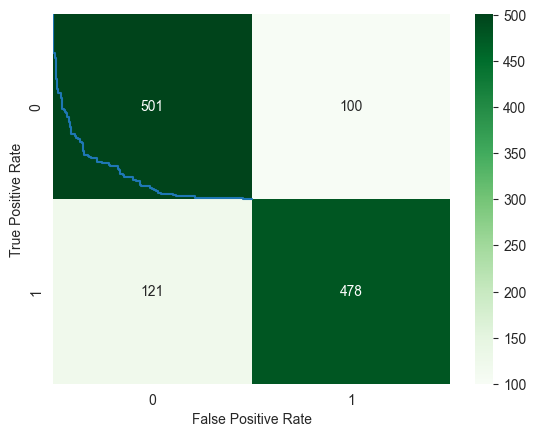

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 4000
maxIter: 100
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.73      0.86      0.79       793
        True       0.83      0.68      0.75       807

    accuracy                           0.77      1600
   macro avg       0.78      0.77      0.77      1600
weighted avg       0.78      0.77      0.77      1600



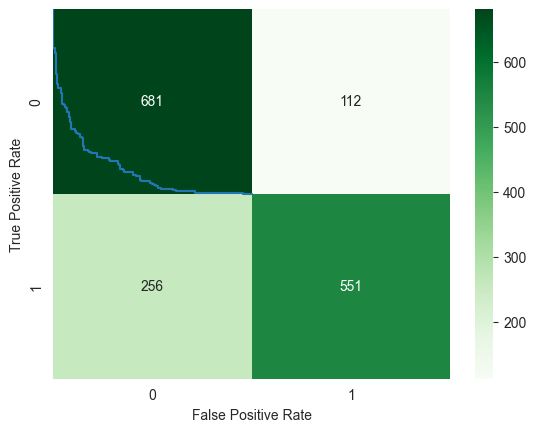

*****************************************************************************************************************************
Num atr: 100
size: 4000
maxIter: 100
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.76      0.85      0.81       793
        True       0.84      0.74      0.79       807

    accuracy                           0.80      1600
   macro avg       0.80      0.80      0.80      1600
weighted avg       0.80      0.80      0.80      1600



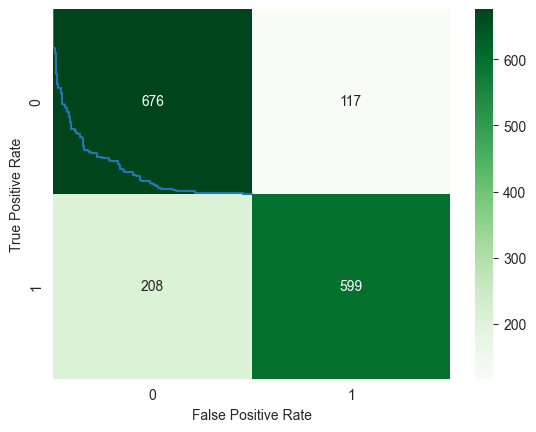

*****************************************************************************************************************************
Num atr: 200
size: 4000
maxIter: 100
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.77      0.85      0.81       793
        True       0.84      0.76      0.80       807

    accuracy                           0.80      1600
   macro avg       0.81      0.80      0.80      1600
weighted avg       0.81      0.80      0.80      1600



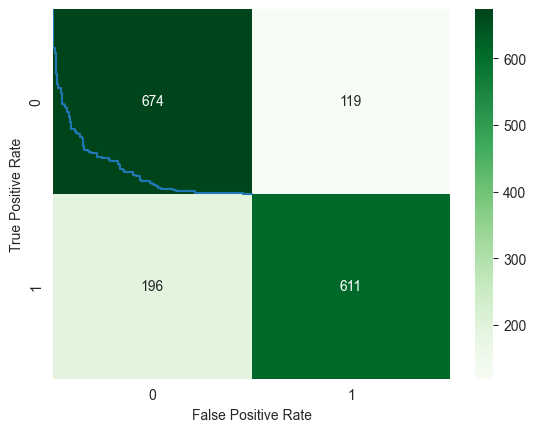

*****************************************************************************************************************************
Num atr: 250
size: 4000
maxIter: 100
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.78      0.84      0.81       793
        True       0.83      0.76      0.79       807

    accuracy                           0.80      1600
   macro avg       0.80      0.80      0.80      1600
weighted avg       0.80      0.80      0.80      1600



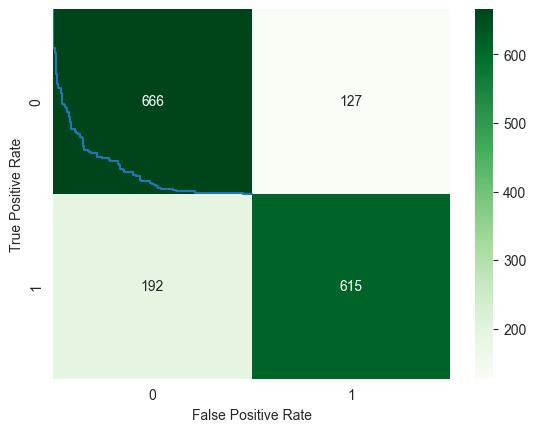

*****************************************************************************************************************************
Num atr: 300
size: 4000
maxIter: 100
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.77      0.85      0.81       793
        True       0.83      0.75      0.79       807

    accuracy                           0.80      1600
   macro avg       0.80      0.80      0.80      1600
weighted avg       0.80      0.80      0.80      1600



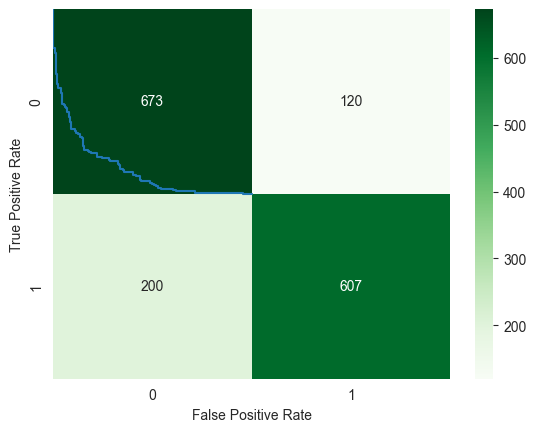

*****************************************************************************************************************************
Num atr: 350
size: 4000
maxIter: 100
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.79      0.84      0.82       793
        True       0.83      0.78      0.81       807

    accuracy                           0.81      1600
   macro avg       0.81      0.81      0.81      1600
weighted avg       0.81      0.81      0.81      1600



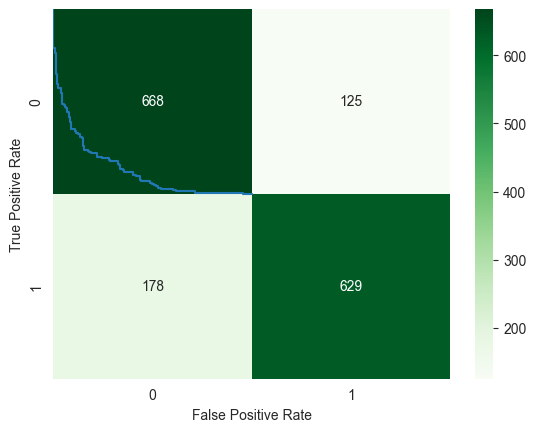

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 4000
maxIter: 250
*****************************************************************************************************************************
              precision    recall  f1-score   support

       False       0.55      0.99      0.70       793
        True       0.96      0.19      0.32       807

    accuracy                           0.59      1600
   macro avg       0.75      0.59      0.51      1600
weighted avg       0.75      0.59      0.51      1600



C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


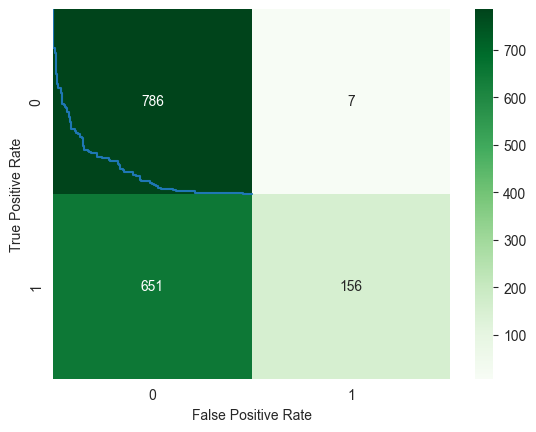

*****************************************************************************************************************************
Num atr: 100
size: 4000
maxIter: 250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.75      0.80      0.77       793
        True       0.79      0.73      0.76       807

    accuracy                           0.77      1600
   macro avg       0.77      0.77      0.76      1600
weighted avg       0.77      0.77      0.76      1600



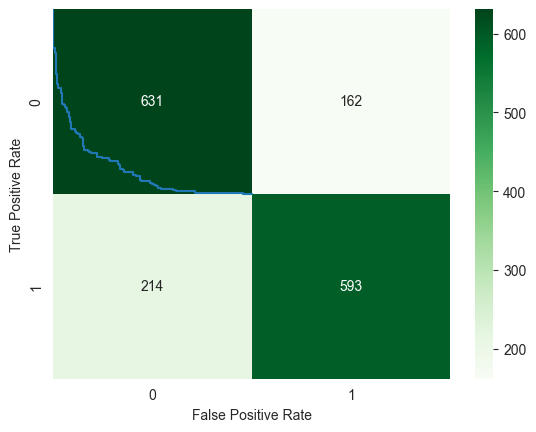

*****************************************************************************************************************************
Num atr: 200
size: 4000
maxIter: 250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.59      0.98      0.73       793
        True       0.95      0.32      0.48       807

    accuracy                           0.65      1600
   macro avg       0.77      0.65      0.61      1600
weighted avg       0.77      0.65      0.61      1600



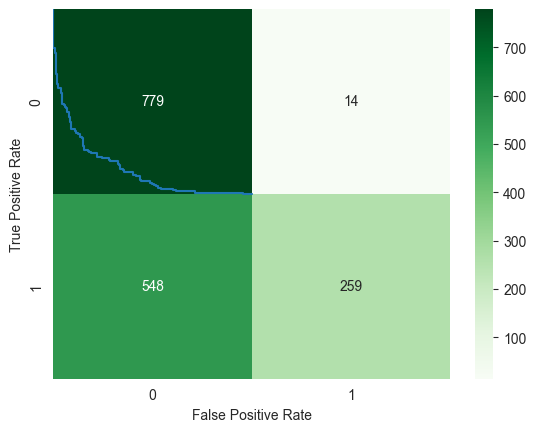

*****************************************************************************************************************************
Num atr: 250
size: 4000
maxIter: 250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.77      0.80      0.78       793
        True       0.79      0.76      0.78       807

    accuracy                           0.78      1600
   macro avg       0.78      0.78      0.78      1600
weighted avg       0.78      0.78      0.78      1600



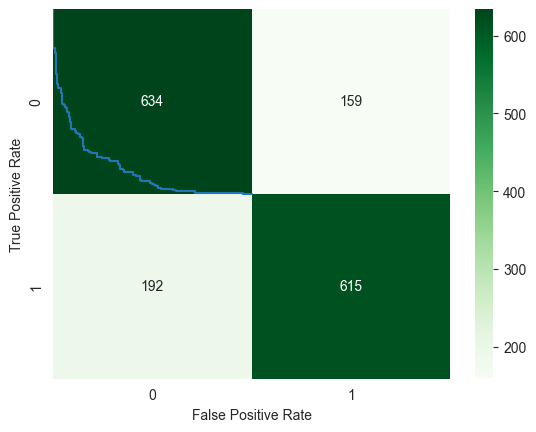

*****************************************************************************************************************************
Num atr: 300
size: 4000
maxIter: 250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.78      0.80      0.79       793
        True       0.80      0.78      0.79       807

    accuracy                           0.79      1600
   macro avg       0.79      0.79      0.79      1600
weighted avg       0.79      0.79      0.79      1600



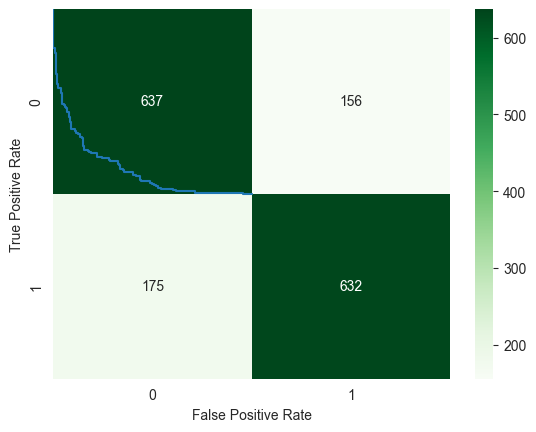

*****************************************************************************************************************************
Num atr: 350
size: 4000
maxIter: 250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.61      0.98      0.75       793
        True       0.94      0.39      0.55       807

    accuracy                           0.68      1600
   macro avg       0.78      0.68      0.65      1600
weighted avg       0.78      0.68      0.65      1600



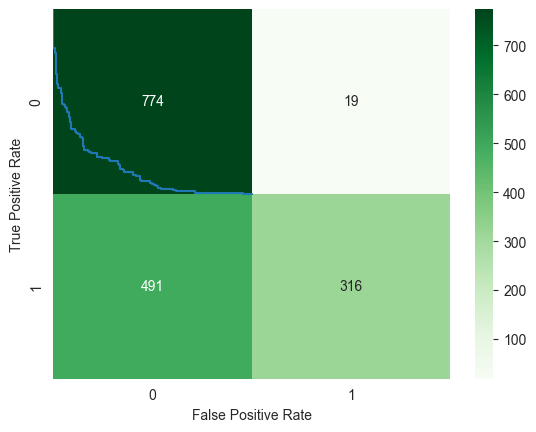

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 4000
maxIter: 500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.96      0.13      0.22       793
        True       0.54      1.00      0.70       807

    accuracy                           0.56      1600
   macro avg       0.75      0.56      0.46      1600
weighted avg       0.75      0.56      0.46      1600



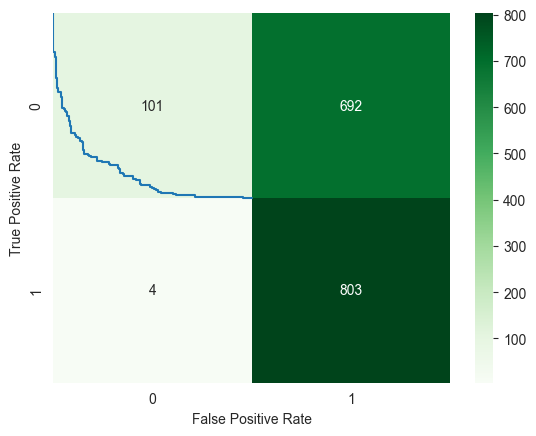

*****************************************************************************************************************************
Num atr: 100
size: 4000
maxIter: 500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.75      0.83      0.79       793
        True       0.81      0.73      0.77       807

    accuracy                           0.78      1600
   macro avg       0.78      0.78      0.78      1600
weighted avg       0.78      0.78      0.78      1600



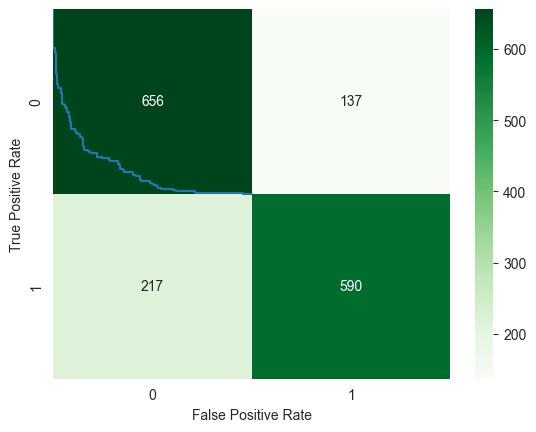

*****************************************************************************************************************************
Num atr: 200
size: 4000
maxIter: 500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.76      0.83      0.79       793
        True       0.82      0.75      0.78       807

    accuracy                           0.79      1600
   macro avg       0.79      0.79      0.79      1600
weighted avg       0.79      0.79      0.79      1600



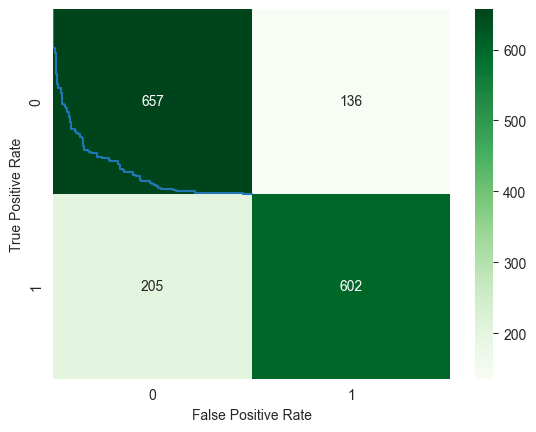

*****************************************************************************************************************************
Num atr: 250
size: 4000
maxIter: 500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.59      0.98      0.74       793
        True       0.94      0.33      0.48       807

    accuracy                           0.65      1600
   macro avg       0.77      0.65      0.61      1600
weighted avg       0.77      0.65      0.61      1600



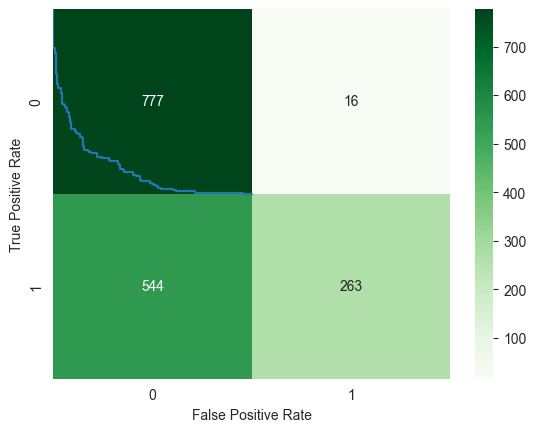

*****************************************************************************************************************************
Num atr: 300
size: 4000
maxIter: 500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.61      0.98      0.75       793
        True       0.95      0.38      0.54       807

    accuracy                           0.68      1600
   macro avg       0.78      0.68      0.65      1600
weighted avg       0.78      0.68      0.65      1600



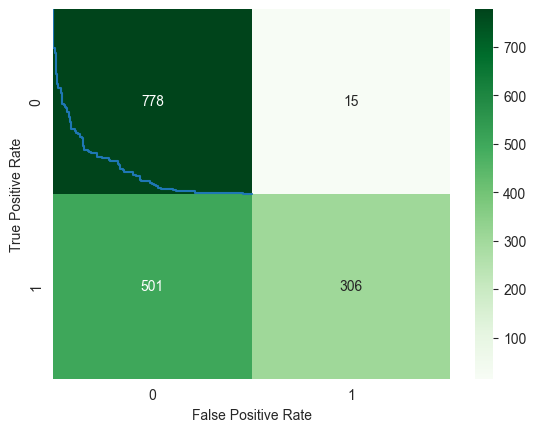

*****************************************************************************************************************************
Num atr: 350
size: 4000
maxIter: 500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.61      0.97      0.75       793
        True       0.94      0.39      0.55       807

    accuracy                           0.68      1600
   macro avg       0.77      0.68      0.65      1600
weighted avg       0.77      0.68      0.65      1600



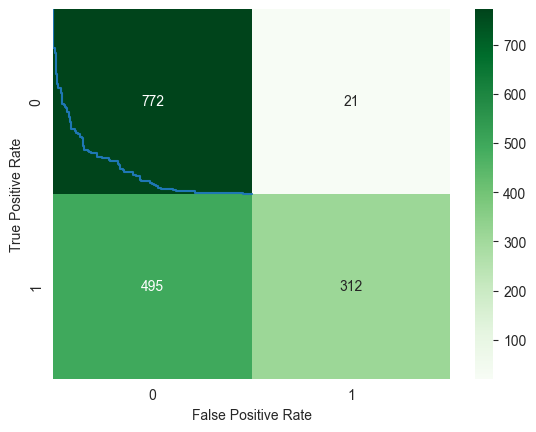

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 4000
maxIter: 1000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.77      0.80      0.78       793
        True       0.79      0.76      0.78       807

    accuracy                           0.78      1600
   macro avg       0.78      0.78      0.78      1600
weighted avg       0.78      0.78      0.78      1600



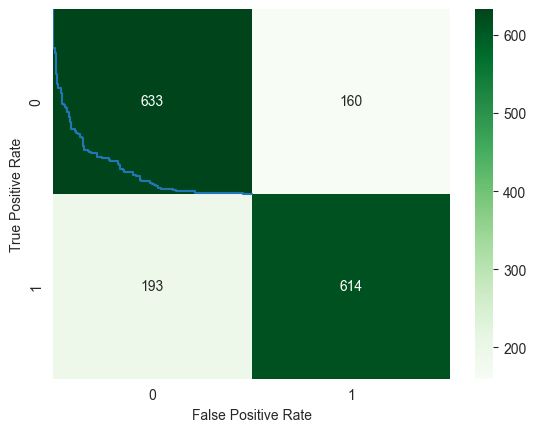

*****************************************************************************************************************************
Num atr: 100
size: 4000
maxIter: 1000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.76      0.80      0.78       793
        True       0.79      0.75      0.77       807

    accuracy                           0.78      1600
   macro avg       0.78      0.78      0.77      1600
weighted avg       0.78      0.78      0.77      1600



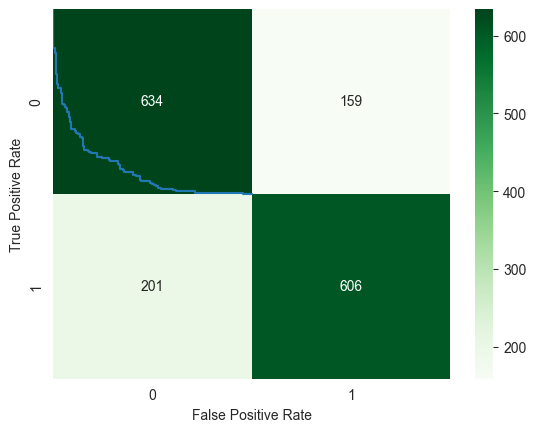

*****************************************************************************************************************************
Num atr: 200
size: 4000
maxIter: 1000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.80      0.80      0.80       793
        True       0.80      0.80      0.80       807

    accuracy                           0.80      1600
   macro avg       0.80      0.80      0.80      1600
weighted avg       0.80      0.80      0.80      1600



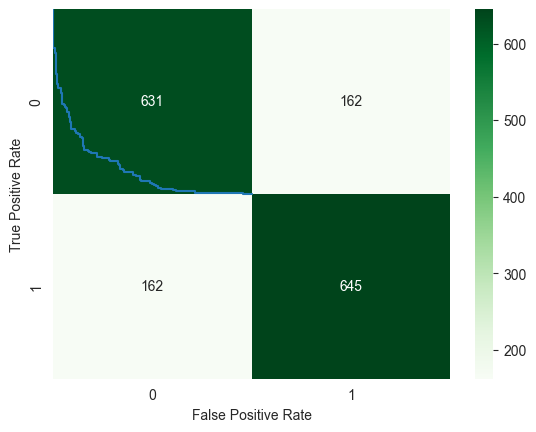

*****************************************************************************************************************************
Num atr: 250
size: 4000
maxIter: 1000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.80      0.82      0.81       793
        True       0.82      0.80      0.81       807

    accuracy                           0.81      1600
   macro avg       0.81      0.81      0.81      1600
weighted avg       0.81      0.81      0.81      1600



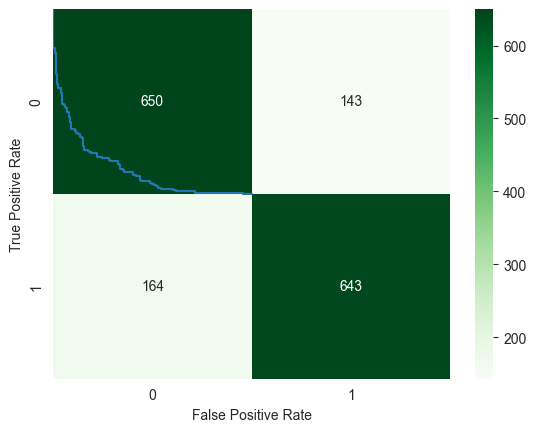

*****************************************************************************************************************************
Num atr: 300
size: 4000
maxIter: 1000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.78      0.81      0.80       793
        True       0.81      0.78      0.79       807

    accuracy                           0.79      1600
   macro avg       0.79      0.79      0.79      1600
weighted avg       0.79      0.79      0.79      1600



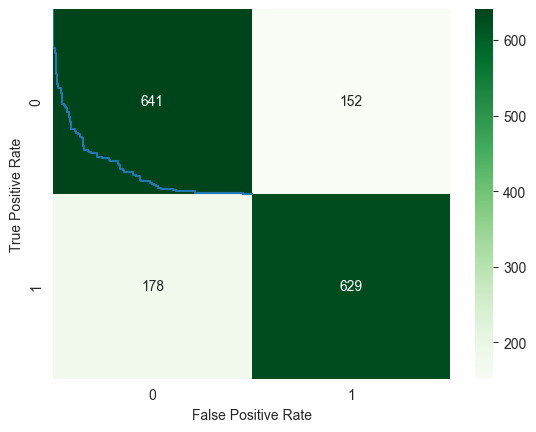

*****************************************************************************************************************************
Num atr: 350
size: 4000
maxIter: 1000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.77      0.83      0.80       793
        True       0.82      0.76      0.79       807

    accuracy                           0.79      1600
   macro avg       0.79      0.79      0.79      1600
weighted avg       0.79      0.79      0.79      1600



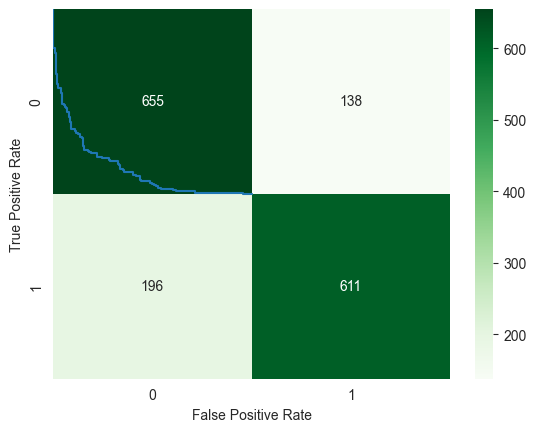

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 4000
maxIter: 1250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.53      1.00      0.69       793
        True       0.99      0.13      0.23       807

    accuracy                           0.56      1600
   macro avg       0.76      0.56      0.46      1600
weighted avg       0.76      0.56      0.46      1600



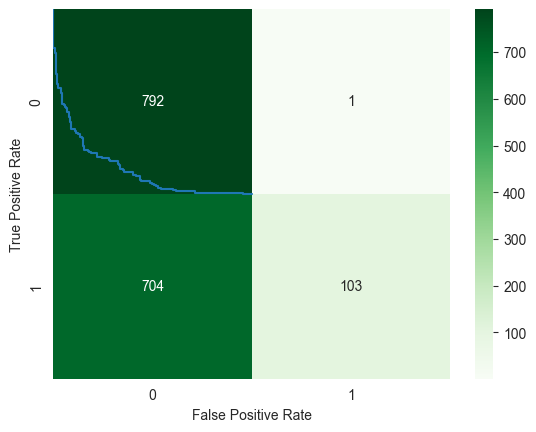

*****************************************************************************************************************************
Num atr: 100
size: 4000
maxIter: 1250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.75      0.84      0.79       793
        True       0.82      0.73      0.77       807

    accuracy                           0.78      1600
   macro avg       0.79      0.78      0.78      1600
weighted avg       0.79      0.78      0.78      1600



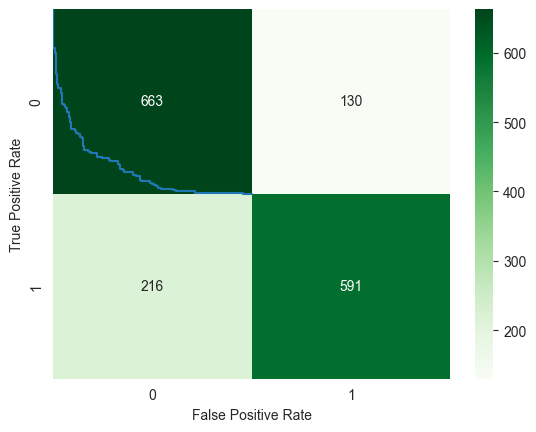

*****************************************************************************************************************************
Num atr: 200
size: 4000
maxIter: 1250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.92      0.31      0.46       793
        True       0.59      0.98      0.73       807

    accuracy                           0.64      1600
   macro avg       0.76      0.64      0.60      1600
weighted avg       0.75      0.64      0.60      1600



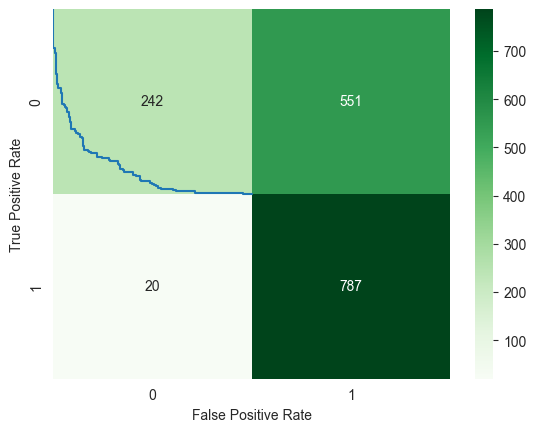

*****************************************************************************************************************************
Num atr: 250
size: 4000
maxIter: 1250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.77      0.85      0.81       793
        True       0.83      0.75      0.79       807

    accuracy                           0.80      1600
   macro avg       0.80      0.80      0.80      1600
weighted avg       0.80      0.80      0.80      1600



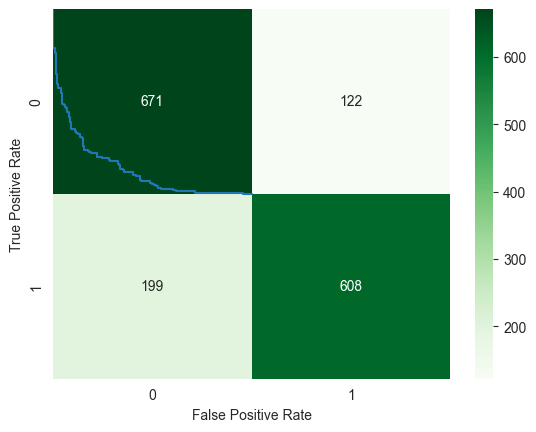

*****************************************************************************************************************************
Num atr: 300
size: 4000
maxIter: 1250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.78      0.85      0.82       793
        True       0.84      0.77      0.80       807

    accuracy                           0.81      1600
   macro avg       0.81      0.81      0.81      1600
weighted avg       0.81      0.81      0.81      1600



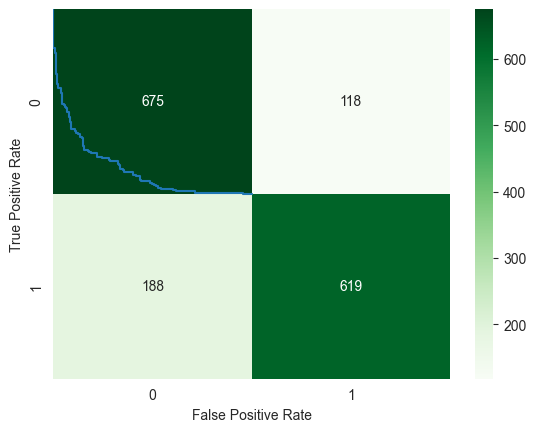

*****************************************************************************************************************************
Num atr: 350
size: 4000
maxIter: 1250
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.78      0.83      0.80       793
        True       0.82      0.77      0.79       807

    accuracy                           0.80      1600
   macro avg       0.80      0.80      0.80      1600
weighted avg       0.80      0.80      0.80      1600



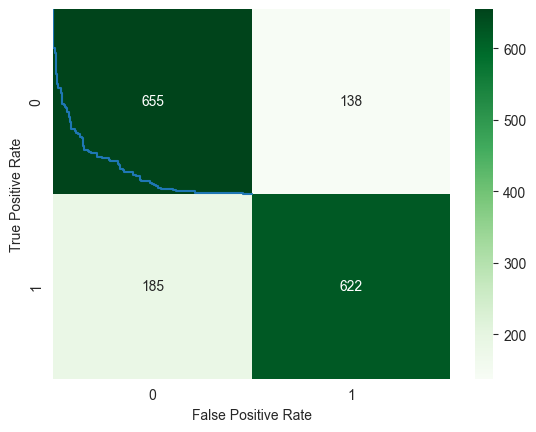

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 4000
maxIter: 1500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.95      0.15      0.25       793
        True       0.54      0.99      0.70       807

    accuracy                           0.57      1600
   macro avg       0.75      0.57      0.48      1600
weighted avg       0.74      0.57      0.48      1600



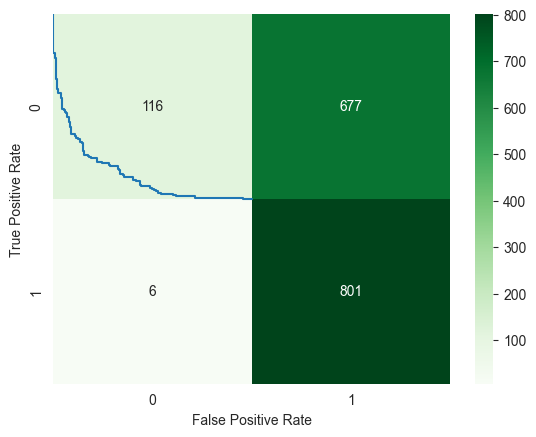

*****************************************************************************************************************************
Num atr: 100
size: 4000
maxIter: 1500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.95      0.23      0.37       793
        True       0.57      0.99      0.72       807

    accuracy                           0.61      1600
   macro avg       0.76      0.61      0.54      1600
weighted avg       0.75      0.61      0.54      1600



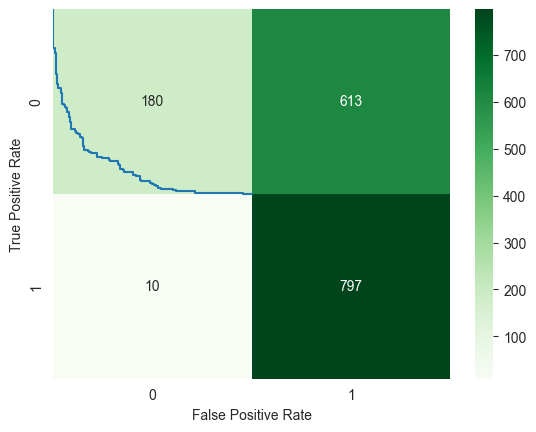

*****************************************************************************************************************************
Num atr: 200
size: 4000
maxIter: 1500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.77      0.83      0.80       793
        True       0.82      0.75      0.79       807

    accuracy                           0.79      1600
   macro avg       0.79      0.79      0.79      1600
weighted avg       0.79      0.79      0.79      1600



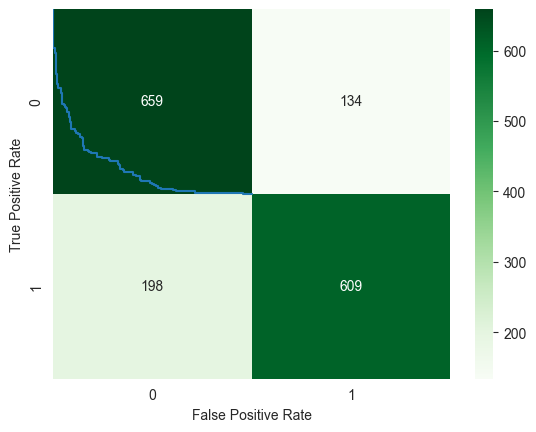

*****************************************************************************************************************************
Num atr: 250
size: 4000
maxIter: 1500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.76      0.82      0.79       793
        True       0.81      0.75      0.78       807

    accuracy                           0.78      1600
   macro avg       0.78      0.78      0.78      1600
weighted avg       0.79      0.78      0.78      1600



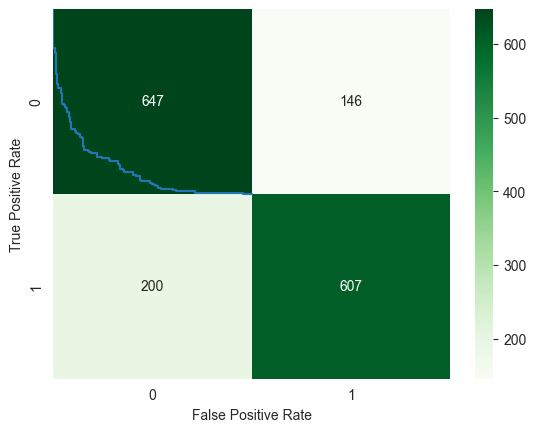

*****************************************************************************************************************************
Num atr: 300
size: 4000
maxIter: 1500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.79      0.82      0.80       793
        True       0.82      0.78      0.80       807

    accuracy                           0.80      1600
   macro avg       0.80      0.80      0.80      1600
weighted avg       0.80      0.80      0.80      1600



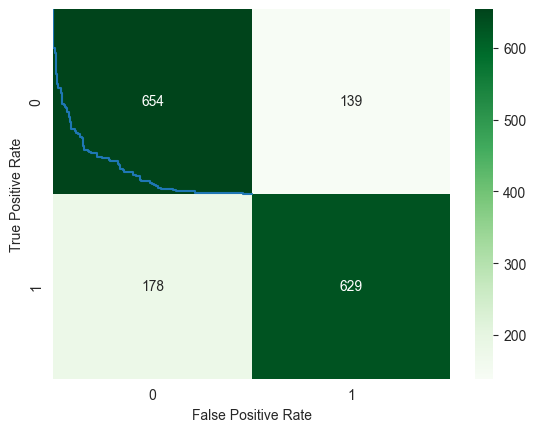

*****************************************************************************************************************************
Num atr: 350
size: 4000
maxIter: 1500
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.78      0.83      0.81       793
        True       0.82      0.77      0.80       807

    accuracy                           0.80      1600
   macro avg       0.80      0.80      0.80      1600
weighted avg       0.80      0.80      0.80      1600



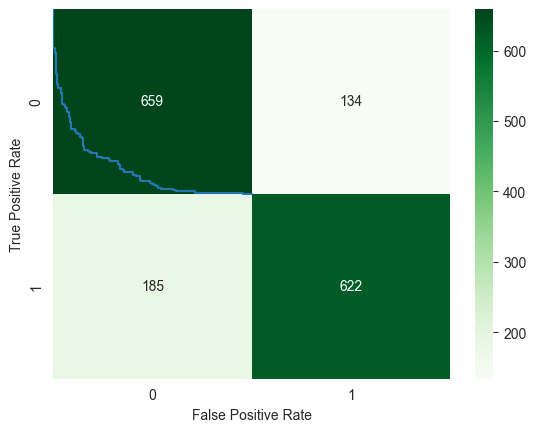

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Num atr: 50
size: 4000
maxIter: 2000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.93      0.16      0.27       793
        True       0.55      0.99      0.70       807

    accuracy                           0.58      1600
   macro avg       0.74      0.57      0.49      1600
weighted avg       0.74      0.58      0.49      1600



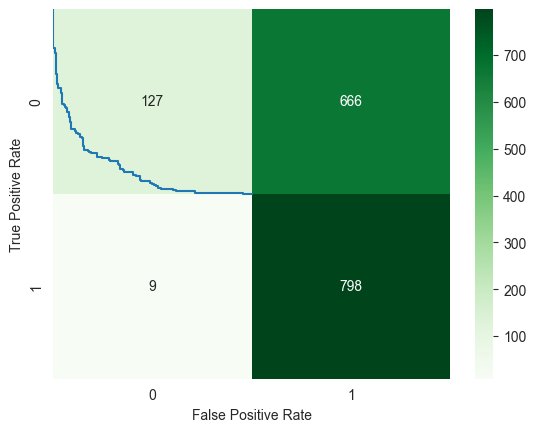

*****************************************************************************************************************************
Num atr: 100
size: 4000
maxIter: 2000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.75      0.83      0.79       793
        True       0.82      0.73      0.77       807

    accuracy                           0.78      1600
   macro avg       0.78      0.78      0.78      1600
weighted avg       0.78      0.78      0.78      1600



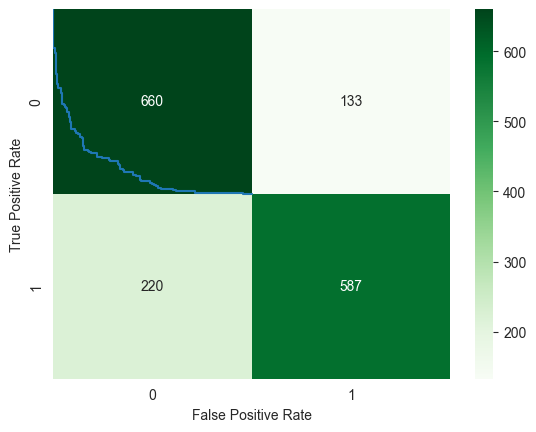

*****************************************************************************************************************************
Num atr: 200
size: 4000
maxIter: 2000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.77      0.83      0.80       793
        True       0.82      0.76      0.79       807

    accuracy                           0.80      1600
   macro avg       0.80      0.80      0.80      1600
weighted avg       0.80      0.80      0.80      1600



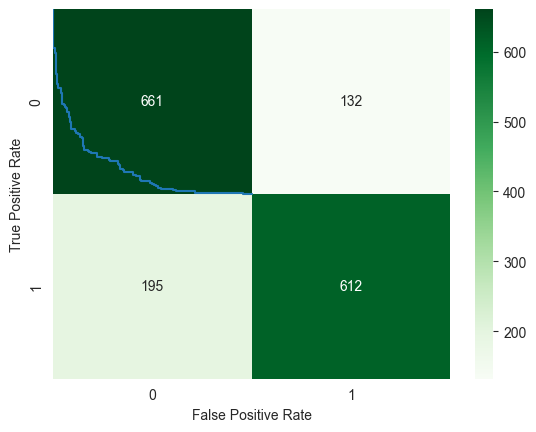

*****************************************************************************************************************************
Num atr: 250
size: 4000
maxIter: 2000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.78      0.84      0.81       793
        True       0.83      0.77      0.80       807

    accuracy                           0.81      1600
   macro avg       0.81      0.81      0.81      1600
weighted avg       0.81      0.81      0.81      1600



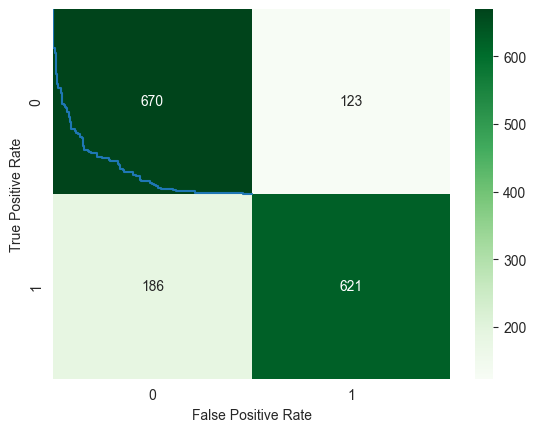

*****************************************************************************************************************************
Num atr: 300
size: 4000
maxIter: 2000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.78      0.84      0.81       793
        True       0.83      0.77      0.80       807

    accuracy                           0.81      1600
   macro avg       0.81      0.81      0.80      1600
weighted avg       0.81      0.81      0.80      1600



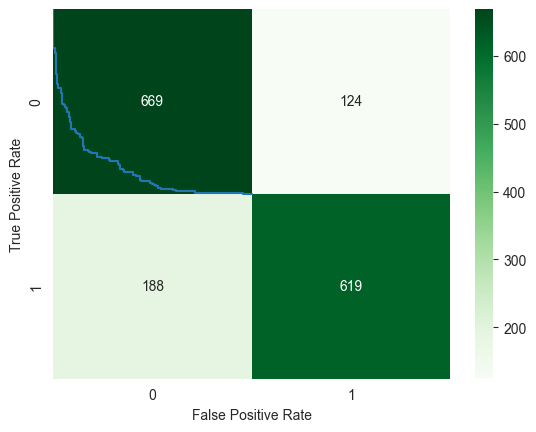

*****************************************************************************************************************************
Num atr: 350
size: 4000
maxIter: 2000
*****************************************************************************************************************************


C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=False
C:\Users\julia\AppData\Local\Temp\ipykernel_8396\2933849620.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['humor'].iloc[index]=True


              precision    recall  f1-score   support

       False       0.79      0.83      0.81       793
        True       0.82      0.78      0.80       807

    accuracy                           0.80      1600
   macro avg       0.81      0.80      0.80      1600
weighted avg       0.81      0.80      0.80      1600



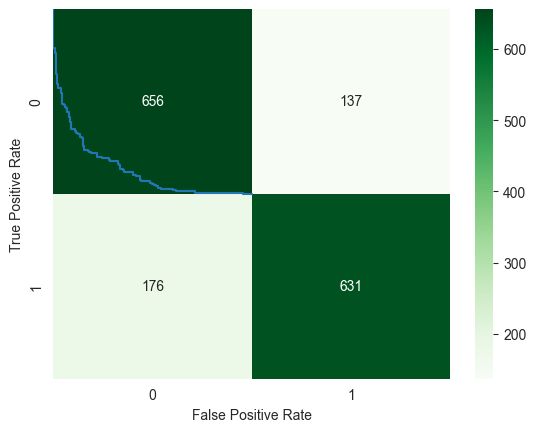

*****************************************************************************************************************************
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
------------------------------------------------------------------------------------------------------------------------------------


In [73]:
#Algoritmo que aplica combinaciones de parámetros al algoritmo clasifcador, en este caso perceptrón simple
dataset = pd.read_csv('dataset.csv')
sizes=[750, 1000, 2000, 3000, 4000]
maxIter = [100, 250, 500, 1000, 1250, 1500, 2000]
numA = [50 , 100 ,200, 250, 300, 350]
for i in range(len(sizes)):
    print('------------------------------------------------------------------------------------------------------------------------------------')
    for j in range(len(maxIter)):
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

        dataset = pd.read_csv('dataset.csv')
        serious_text = dataset[dataset['humor'] == False].sample(sizes[i])
        humor_text = dataset[dataset['humor'] == True].sample(sizes[i])
        dataframe = pd.concat([serious_text, humor_text])
        for k in range(len(numA)):
            print('Num atr:', numA[k])
            print('size:', sizes[i])
            print('maxIter:', maxIter[j])
            print('*****************************************************************************************************************************')
            df_tfidf = tfidf(dataframe)
            instances = reducctionPCA(df_tfidf, numA[k])
            instances = pd.DataFrame(instances)

            instances = assignLabels(instances)

            x_train , x_test , y_train , y_test = testAndTrain(instances)

            p = Perceptron(random_state=42, max_iter=maxIter[k])
            p.fit(x_train, y_train)
            preds = p.predict(x_test)

            cm = confusion_matrix(y_test, preds)
            ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
            print(classification_report(y_test,preds,zero_division=1))
            print('*****************************************************************************************************************************')
        print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print('------------------------------------------------------------------------------------------------------------------------------------')